#CNN
温度データから内部欠陥の位置と大きさを推定するプログラム

In [2]:
## 必要なライブラリのimport
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dense, Flatten
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [3]:
## データについて

### データファイルのpath
no_hole_path = './../tmp_simulation/tmp_data/no_hole_data.csv'
one_hole_size_path = './../tmp_simulation/tmp_data/one_hole_size_data.csv'
one_hole_position_path = './../tmp_simulation/tmp_data/one_hole_position_data.csv'
four_holes_size_path = './../tmp_simulation/tmp_data/four_holes_size_data.csv'
four_holes_position_path = './../tmp_simulation/tmp_data/four_holes_position_data.csv'
nine_holes_size_path = './../tmp_simulation/tmp_data/nine_holes_size_data.csv'
nine_holes_position_path = './../tmp_simulation/tmp_data/nine_holes_position_data.csv'
sixteen_holes_size_path = './../tmp_simulation/tmp_data/sixteen_holes_size_data.csv'
sixteen_holes_position_path = './../tmp_simulation/tmp_data/sixteen_holes_position_data.csv'
twentyfive_holes_size_path = './../tmp_simulation/tmp_data/twentyfive_holes_size_data.csv'
twentyfive_holes_position_path = './../tmp_simulation/tmp_data/twentyfive_holes_position_data.csv'

### 入力データと正解データ
no_hole_data = []
size_x_data = []
size_y_data = []
position_x_data = []
position_y_data = []

### ファイル読み込み

#### 欠陥がない場合の温度データ
with open(no_hole_path) as f:
    for line in f:
        no_hole_data = line.split(',')[:-1]

#### 大きさに関するデータ
with open(one_hole_size_path) as fs1:
  for line in fs1:
    data_array = line.split(',')
    size_x_data.append(data_array[1:-1])
    size_y_data.append(data_array[0])
with open(four_holes_size_path) as fs2:
  for line in fs2:
    data_array = line.split(',')
    size_x_data.append(data_array[1:-1])
    size_y_data.append(data_array[0])
with open(nine_holes_size_path) as fs3:
  for line in fs3:
    data_array = line.split(',')
    size_x_data.append(data_array[1:-1])
    size_y_data.append(data_array[0])
with open(sixteen_holes_size_path) as fs4:
  for line in fs4:
    data_array = line.split(',')
    size_x_data.append(data_array[1:-1])
    size_y_data.append(data_array[0])
with open(twentyfive_holes_size_path) as fs5:
  for line in fs5:
    data_array = line.split(',')
    size_x_data.append(data_array[1:-1])
    size_y_data.append(data_array[0])

#### 位置に関するデータ
with open(one_hole_position_path) as fp1:
  for line in fp1:
    data_array = line.split(',')
    position_x_data.append(data_array[1:-1])
    position_y_data.append(data_array[0])
with open(four_holes_position_path) as fp2:
  for line in fp2:
    data_array = line.split(',')
    position_x_data.append(data_array[1:-1])
    position_y_data.append(data_array[0])
with open(nine_holes_position_path) as fp3:
  for line in fp3:
    data_array = line.split(',')
    position_x_data.append(data_array[1:-1])
    position_y_data.append(data_array[0])
with open(sixteen_holes_position_path) as fp4:
  for line in fp4:
    data_array = line.split(',')
    position_x_data.append(data_array[1:-1])
    position_y_data.append(data_array[0])
with open(twentyfive_holes_position_path) as fp5:
  for line in fp5:
    data_array = line.split(',')
    position_x_data.append(data_array[1:-1])
    position_y_data.append(data_array[0])

### 各配列をnp.array型にして各要素を型変換
no_hole_data = np.array(no_hole_data, dtype=float)
size_x_data = np.array(size_x_data, dtype=float)
size_y_data = np.array(size_y_data, dtype=int)
position_x_data = np.array(position_x_data, dtype=float)
position_y_data = np.array(position_y_data, dtype=int)

### データの加工
size_x_data = (size_x_data-no_hole_data)
position_x_data = (position_x_data-no_hole_data)
size_y_data = keras.utils.to_categorical(size_y_data, 6)
position_y_data = (position_y_data-1)
position_y_data = keras.utils.to_categorical(position_y_data, 25)

### train用とtest用に分割(4:1)
size_x_train, size_x_test, size_y_train, size_y_test = train_test_split(size_x_data, size_y_data, test_size=0.20)
position_x_train, position_x_test, position_y_train, position_y_test = train_test_split(position_x_data, position_y_data, test_size=0.20)


### reshape
size_x_train = size_x_train.reshape(8108, 50, 1)
size_x_test = size_x_test.reshape(2027, 50, 1)
position_x_train = position_x_train.reshape(8108, 50, 1)
position_x_test = position_x_test.reshape(2027, 50, 1)

In [4]:
## CNN(大きさ)

### modelの作成
size_model = Sequential()
### 畳み込み層
size_model.add(Conv1D(32, 3, padding='same', activation='relu', input_shape=(50, 1)))
### プーリング層
size_model.add(MaxPooling1D(2, padding='same'))
### Flatten層
size_model.add(Flatten())
### 全結合層
size_model.add(Dense(6, activation='softmax'))

### optimizer
adam = keras.optimizers.Adam()

###modelのコンパイル
size_model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [5]:
# 学習(大きさ)
epochs = 4000
batch_size = 128
size_history = size_model.fit(size_x_train, size_y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(size_x_test, size_y_test))

Train on 8108 samples, validate on 2027 samples
Epoch 1/4000
8108/8108 [==============================] - 1s 107us/step - loss: 1.6156 - accuracy: 0.2699 - val_loss: 1.5480 - val_accuracy: 0.4396
Epoch 2/4000
8108/8108 [==============================] - 0s 26us/step - loss: 1.5190 - accuracy: 0.4027 - val_loss: 1.4943 - val_accuracy: 0.3981
Epoch 3/4000
8108/8108 [==============================] - 0s 26us/step - loss: 1.4624 - accuracy: 0.4200 - val_loss: 1.4319 - val_accuracy: 0.5895
Epoch 4/4000
8108/8108 [==============================] - 0s 25us/step - loss: 1.4135 - accuracy: 0.4422 - val_loss: 1.3950 - val_accuracy: 0.4998
Epoch 5/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3659 - accuracy: 0.4640 - val_loss: 1.3528 - val_accuracy: 0.4036
Epoch 6/4000
8108/8108 [==============================] - 0s 31us/step - loss: 1.3399 - accuracy: 0.4547 - val_loss: 1.3219 - val_accuracy: 0.5659
Epoch 7/4000
8108/8108 [==============================] - 0s 30us/ste

Epoch 56/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.8022 - accuracy: 0.7183 - val_loss: 0.8177 - val_accuracy: 0.6813
Epoch 57/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.8005 - accuracy: 0.7114 - val_loss: 0.8038 - val_accuracy: 0.7449
Epoch 58/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.7873 - accuracy: 0.7240 - val_loss: 0.8117 - val_accuracy: 0.6843
Epoch 59/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.7843 - accuracy: 0.7242 - val_loss: 0.8006 - val_accuracy: 0.7035
Epoch 60/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.7802 - accuracy: 0.7195 - val_loss: 0.7788 - val_accuracy: 0.7306
Epoch 61/4000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7760 - accuracy: 0.7177 - val_loss: 0.7840 - val_accuracy: 0.7321
Epoch 62/4000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7703 - accuracy: 0.7263 - val_

8108/8108 [==============================] - 0s 26us/step - loss: 0.5421 - accuracy: 0.7613 - val_loss: 0.5714 - val_accuracy: 0.7617
Epoch 167/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.5540 - accuracy: 0.7584 - val_loss: 0.5535 - val_accuracy: 0.7573
Epoch 168/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.5569 - accuracy: 0.7575 - val_loss: 0.5875 - val_accuracy: 0.7578
Epoch 169/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.5414 - accuracy: 0.7659 - val_loss: 0.5567 - val_accuracy: 0.7533
Epoch 170/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.5375 - accuracy: 0.7595 - val_loss: 0.5666 - val_accuracy: 0.7543
Epoch 171/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.5416 - accuracy: 0.7628 - val_loss: 0.5523 - val_accuracy: 0.7607
Epoch 172/4000
8108/8108 [==============================] - 0s 27us/step - loss: 0.5322 - accuracy: 0.7667 - val_loss: 0.

8108/8108 [==============================] - 0s 25us/step - loss: 0.5035 - accuracy: 0.7663 - val_loss: 0.5384 - val_accuracy: 0.7533
Epoch 222/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.5023 - accuracy: 0.7648 - val_loss: 0.5246 - val_accuracy: 0.7647
Epoch 223/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.5161 - accuracy: 0.7641 - val_loss: 0.5224 - val_accuracy: 0.7588
Epoch 224/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.4957 - accuracy: 0.7695 - val_loss: 0.5413 - val_accuracy: 0.7691
Epoch 225/4000
8108/8108 [==============================] - 0s 27us/step - loss: 0.5020 - accuracy: 0.7685 - val_loss: 0.5156 - val_accuracy: 0.7602
Epoch 226/4000
8108/8108 [==============================] - 0s 32us/step - loss: 0.4905 - accuracy: 0.7749 - val_loss: 0.5162 - val_accuracy: 0.7563
Epoch 227/4000
8108/8108 [==============================] - 0s 38us/step - loss: 0.4970 - accuracy: 0.7727 - val_loss: 0.

8108/8108 [==============================] - 0s 26us/step - loss: 0.4734 - accuracy: 0.7755 - val_loss: 0.4937 - val_accuracy: 0.7681
Epoch 277/4000
8108/8108 [==============================] - 0s 27us/step - loss: 0.4713 - accuracy: 0.7722 - val_loss: 0.5096 - val_accuracy: 0.7686
Epoch 278/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.4782 - accuracy: 0.7671 - val_loss: 0.5218 - val_accuracy: 0.7671
Epoch 279/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.4691 - accuracy: 0.7718 - val_loss: 0.4906 - val_accuracy: 0.7681
Epoch 280/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.4704 - accuracy: 0.7673 - val_loss: 0.4942 - val_accuracy: 0.7706
Epoch 281/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.4810 - accuracy: 0.7655 - val_loss: 0.5095 - val_accuracy: 0.7667
Epoch 282/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.4723 - accuracy: 0.7704 - val_loss: 0.

8108/8108 [==============================] - 0s 26us/step - loss: 0.4461 - accuracy: 0.7789 - val_loss: 0.4949 - val_accuracy: 0.7642
Epoch 332/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.4444 - accuracy: 0.7732 - val_loss: 0.4740 - val_accuracy: 0.7701
Epoch 333/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.4480 - accuracy: 0.7738 - val_loss: 0.4687 - val_accuracy: 0.7667
Epoch 334/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.4468 - accuracy: 0.7738 - val_loss: 0.4984 - val_accuracy: 0.7597
Epoch 335/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.4633 - accuracy: 0.7736 - val_loss: 0.4686 - val_accuracy: 0.7716
Epoch 336/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.4458 - accuracy: 0.7805 - val_loss: 0.4783 - val_accuracy: 0.7602
Epoch 337/4000
8108/8108 [==============================] - 0s 28us/step - loss: 0.4410 - accuracy: 0.7785 - val_loss: 0.

8108/8108 [==============================] - 0s 25us/step - loss: 0.4344 - accuracy: 0.7732 - val_loss: 0.4648 - val_accuracy: 0.7681
Epoch 387/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.4307 - accuracy: 0.7757 - val_loss: 0.4833 - val_accuracy: 0.7568
Epoch 388/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.4410 - accuracy: 0.7750 - val_loss: 0.5122 - val_accuracy: 0.7711
Epoch 389/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.4480 - accuracy: 0.7752 - val_loss: 0.4546 - val_accuracy: 0.7667
Epoch 390/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.4387 - accuracy: 0.7711 - val_loss: 0.4685 - val_accuracy: 0.7711
Epoch 391/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.4252 - accuracy: 0.7786 - val_loss: 0.4600 - val_accuracy: 0.7642
Epoch 392/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.4273 - accuracy: 0.7757 - val_loss: 0.

8108/8108 [==============================] - 0s 25us/step - loss: 0.4164 - accuracy: 0.7850 - val_loss: 0.4632 - val_accuracy: 0.7795
Epoch 442/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.4197 - accuracy: 0.7792 - val_loss: 0.4537 - val_accuracy: 0.7721
Epoch 443/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.4107 - accuracy: 0.7840 - val_loss: 0.4558 - val_accuracy: 0.7755
Epoch 444/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.4143 - accuracy: 0.7844 - val_loss: 0.4810 - val_accuracy: 0.7632
Epoch 445/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.4199 - accuracy: 0.7813 - val_loss: 0.5017 - val_accuracy: 0.7745
Epoch 446/4000
8108/8108 [==============================] - 0s 28us/step - loss: 0.4251 - accuracy: 0.7759 - val_loss: 0.4699 - val_accuracy: 0.7805
Epoch 447/4000
8108/8108 [==============================] - 0s 35us/step - loss: 0.4155 - accuracy: 0.7866 - val_loss: 0.

8108/8108 [==============================] - 0s 25us/step - loss: 0.4157 - accuracy: 0.7763 - val_loss: 0.4793 - val_accuracy: 0.7810
Epoch 497/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.4131 - accuracy: 0.7728 - val_loss: 0.4497 - val_accuracy: 0.7750
Epoch 498/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.4049 - accuracy: 0.7807 - val_loss: 0.4361 - val_accuracy: 0.7760
Epoch 499/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.4069 - accuracy: 0.7768 - val_loss: 0.4314 - val_accuracy: 0.7780
Epoch 500/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.4077 - accuracy: 0.7827 - val_loss: 0.4577 - val_accuracy: 0.7741
Epoch 501/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.4094 - accuracy: 0.7792 - val_loss: 0.4416 - val_accuracy: 0.7780
Epoch 502/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.4028 - accuracy: 0.7781 - val_loss: 0.

Epoch 551/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3936 - accuracy: 0.7849 - val_loss: 0.4367 - val_accuracy: 0.7770
Epoch 552/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3884 - accuracy: 0.7887 - val_loss: 0.4343 - val_accuracy: 0.7819
Epoch 553/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3945 - accuracy: 0.7805 - val_loss: 0.4223 - val_accuracy: 0.7741
Epoch 554/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3979 - accuracy: 0.7806 - val_loss: 0.4579 - val_accuracy: 0.7829
Epoch 555/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.4007 - accuracy: 0.7816 - val_loss: 0.4167 - val_accuracy: 0.7731
Epoch 556/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.4012 - accuracy: 0.7852 - val_loss: 0.4438 - val_accuracy: 0.7736
Epoch 557/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3957 - accuracy: 0.7847

Epoch 606/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3882 - accuracy: 0.7906 - val_loss: 0.4280 - val_accuracy: 0.7765
Epoch 607/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3848 - accuracy: 0.7859 - val_loss: 0.4171 - val_accuracy: 0.7731
Epoch 608/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3880 - accuracy: 0.7860 - val_loss: 0.4247 - val_accuracy: 0.7741
Epoch 609/4000
8108/8108 [==============================] - 0s 27us/step - loss: 0.3960 - accuracy: 0.7880 - val_loss: 0.4184 - val_accuracy: 0.7765
Epoch 610/4000
8108/8108 [==============================] - 0s 27us/step - loss: 0.3832 - accuracy: 0.7848 - val_loss: 0.4172 - val_accuracy: 0.7721
Epoch 611/4000
8108/8108 [==============================] - 0s 32us/step - loss: 0.3924 - accuracy: 0.7839 - val_loss: 0.4165 - val_accuracy: 0.7765
Epoch 612/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3996 - accuracy: 0.7827

Epoch 661/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3771 - accuracy: 0.7860 - val_loss: 0.4708 - val_accuracy: 0.7879
Epoch 662/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3927 - accuracy: 0.7840 - val_loss: 0.4387 - val_accuracy: 0.7731
Epoch 663/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3798 - accuracy: 0.7848 - val_loss: 0.4073 - val_accuracy: 0.7775
Epoch 664/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3824 - accuracy: 0.7832 - val_loss: 0.4121 - val_accuracy: 0.7824
Epoch 665/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3731 - accuracy: 0.7918 - val_loss: 0.4151 - val_accuracy: 0.7819
Epoch 666/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3735 - accuracy: 0.7944 - val_loss: 0.4458 - val_accuracy: 0.7869
Epoch 667/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3807 - accuracy: 0.7912

Epoch 716/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3723 - accuracy: 0.7860 - val_loss: 0.4075 - val_accuracy: 0.7760
Epoch 717/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3743 - accuracy: 0.7875 - val_loss: 0.4172 - val_accuracy: 0.7736
Epoch 718/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3772 - accuracy: 0.7879 - val_loss: 0.3995 - val_accuracy: 0.7760
Epoch 719/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3769 - accuracy: 0.7860 - val_loss: 0.4078 - val_accuracy: 0.7844
Epoch 720/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3785 - accuracy: 0.7881 - val_loss: 0.4102 - val_accuracy: 0.7854
Epoch 721/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3647 - accuracy: 0.7913 - val_loss: 0.4059 - val_accuracy: 0.7805
Epoch 722/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3742 - accuracy: 0.7887

Epoch 771/4000
8108/8108 [==============================] - 0s 31us/step - loss: 0.3747 - accuracy: 0.7829 - val_loss: 0.4590 - val_accuracy: 0.7750
Epoch 772/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.3810 - accuracy: 0.7773 - val_loss: 0.4009 - val_accuracy: 0.7800
Epoch 773/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3616 - accuracy: 0.7921 - val_loss: 0.4177 - val_accuracy: 0.7839
Epoch 774/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3629 - accuracy: 0.7926 - val_loss: 0.3996 - val_accuracy: 0.7864
Epoch 775/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.3732 - accuracy: 0.7909 - val_loss: 0.4093 - val_accuracy: 0.7834
Epoch 776/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3609 - accuracy: 0.7876 - val_loss: 0.3966 - val_accuracy: 0.7810
Epoch 777/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3641 - accuracy: 0.7939

Epoch 826/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3660 - accuracy: 0.7905 - val_loss: 0.4111 - val_accuracy: 0.7844
Epoch 827/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3596 - accuracy: 0.7880 - val_loss: 0.4095 - val_accuracy: 0.7864
Epoch 828/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3569 - accuracy: 0.7974 - val_loss: 0.3967 - val_accuracy: 0.7829
Epoch 829/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.3631 - accuracy: 0.7885 - val_loss: 0.3980 - val_accuracy: 0.7819
Epoch 830/4000
8108/8108 [==============================] - 0s 31us/step - loss: 0.3712 - accuracy: 0.7916 - val_loss: 0.4057 - val_accuracy: 0.7824
Epoch 831/4000
8108/8108 [==============================] - 0s 32us/step - loss: 0.3621 - accuracy: 0.7854 - val_loss: 0.3993 - val_accuracy: 0.7859
Epoch 832/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3646 - accuracy: 0.7900

Epoch 881/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3562 - accuracy: 0.7956 - val_loss: 0.3942 - val_accuracy: 0.7893
Epoch 882/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3639 - accuracy: 0.7843 - val_loss: 0.4047 - val_accuracy: 0.7839
Epoch 883/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3519 - accuracy: 0.7950 - val_loss: 0.3990 - val_accuracy: 0.7908
Epoch 884/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3671 - accuracy: 0.7892 - val_loss: 0.4012 - val_accuracy: 0.7829
Epoch 885/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3551 - accuracy: 0.7938 - val_loss: 0.4079 - val_accuracy: 0.7889
Epoch 886/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3518 - accuracy: 0.7985 - val_loss: 0.3948 - val_accuracy: 0.7839
Epoch 887/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3494 - accuracy: 0.7926

Epoch 936/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.3576 - accuracy: 0.7927 - val_loss: 0.4056 - val_accuracy: 0.7893
Epoch 937/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3571 - accuracy: 0.7922 - val_loss: 0.4065 - val_accuracy: 0.7893
Epoch 938/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3584 - accuracy: 0.7932 - val_loss: 0.3992 - val_accuracy: 0.7864
Epoch 939/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3467 - accuracy: 0.8013 - val_loss: 0.4103 - val_accuracy: 0.7839
Epoch 940/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3564 - accuracy: 0.7919 - val_loss: 0.4015 - val_accuracy: 0.7854
Epoch 941/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3471 - accuracy: 0.7983 - val_loss: 0.4006 - val_accuracy: 0.7903
Epoch 942/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3449 - accuracy: 0.7980

Epoch 991/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3432 - accuracy: 0.8025 - val_loss: 0.4272 - val_accuracy: 0.7898
Epoch 992/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3462 - accuracy: 0.8011 - val_loss: 0.4081 - val_accuracy: 0.7829
Epoch 993/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3552 - accuracy: 0.7975 - val_loss: 0.3903 - val_accuracy: 0.7903
Epoch 994/4000
8108/8108 [==============================] - 0s 29us/step - loss: 0.3460 - accuracy: 0.7946 - val_loss: 0.3946 - val_accuracy: 0.7889
Epoch 995/4000
8108/8108 [==============================] - 0s 32us/step - loss: 0.3410 - accuracy: 0.8027 - val_loss: 0.4052 - val_accuracy: 0.7844
Epoch 996/4000
8108/8108 [==============================] - 0s 30us/step - loss: 0.3419 - accuracy: 0.7976 - val_loss: 0.3955 - val_accuracy: 0.7938
Epoch 997/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3430 - accuracy: 0.7958

Epoch 1100/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3470 - accuracy: 0.7948 - val_loss: 0.4271 - val_accuracy: 0.7839
Epoch 1101/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3385 - accuracy: 0.7969 - val_loss: 0.4109 - val_accuracy: 0.7923
Epoch 1102/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3354 - accuracy: 0.8006 - val_loss: 0.4167 - val_accuracy: 0.7810
Epoch 1103/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3431 - accuracy: 0.7946 - val_loss: 0.4024 - val_accuracy: 0.7819
Epoch 1104/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3350 - accuracy: 0.7948 - val_loss: 0.4061 - val_accuracy: 0.7824
Epoch 1105/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3629 - accuracy: 0.7963 - val_loss: 0.3949 - val_accuracy: 0.7908
Epoch 1106/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3398 - accuracy:

8108/8108 [==============================] - 0s 24us/step - loss: 0.3436 - accuracy: 0.7954 - val_loss: 0.4082 - val_accuracy: 0.7859
Epoch 1209/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3411 - accuracy: 0.7961 - val_loss: 0.3973 - val_accuracy: 0.7889
Epoch 1210/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3288 - accuracy: 0.8011 - val_loss: 0.3979 - val_accuracy: 0.7913
Epoch 1211/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3311 - accuracy: 0.8050 - val_loss: 0.3986 - val_accuracy: 0.7859
Epoch 1212/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.3295 - accuracy: 0.8006 - val_loss: 0.3966 - val_accuracy: 0.7874
Epoch 1213/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.3334 - accuracy: 0.7998 - val_loss: 0.3983 - val_accuracy: 0.7958
Epoch 1214/4000
8108/8108 [==============================] - 0s 27us/step - loss: 0.3338 - accuracy: 0.7955 - val_lo

Epoch 1263/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3256 - accuracy: 0.8069 - val_loss: 0.4029 - val_accuracy: 0.7844
Epoch 1264/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3357 - accuracy: 0.7986 - val_loss: 0.4436 - val_accuracy: 0.7977
Epoch 1265/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3371 - accuracy: 0.7960 - val_loss: 0.4250 - val_accuracy: 0.7898
Epoch 1266/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3269 - accuracy: 0.7988 - val_loss: 0.4243 - val_accuracy: 0.7844
Epoch 1267/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3333 - accuracy: 0.7949 - val_loss: 0.4346 - val_accuracy: 0.7923
Epoch 1268/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3343 - accuracy: 0.7971 - val_loss: 0.4084 - val_accuracy: 0.7839
Epoch 1269/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3391 - accuracy:

8108/8108 [==============================] - 0s 25us/step - loss: 0.3313 - accuracy: 0.7991 - val_loss: 0.4076 - val_accuracy: 0.7903
Epoch 1372/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.3191 - accuracy: 0.8075 - val_loss: 0.4155 - val_accuracy: 0.7893
Epoch 1373/4000
8108/8108 [==============================] - 0s 29us/step - loss: 0.3435 - accuracy: 0.7971 - val_loss: 0.4391 - val_accuracy: 0.7849
Epoch 1374/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3287 - accuracy: 0.7997 - val_loss: 0.4220 - val_accuracy: 0.7854
Epoch 1375/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3461 - accuracy: 0.7991 - val_loss: 0.3972 - val_accuracy: 0.7903
Epoch 1376/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3209 - accuracy: 0.8034 - val_loss: 0.4189 - val_accuracy: 0.7849
Epoch 1377/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3326 - accuracy: 0.8001 - val_lo

Epoch 1426/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3219 - accuracy: 0.8013 - val_loss: 0.4342 - val_accuracy: 0.7953
Epoch 1427/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3234 - accuracy: 0.8049 - val_loss: 0.4092 - val_accuracy: 0.7893
Epoch 1428/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3244 - accuracy: 0.8001 - val_loss: 0.4472 - val_accuracy: 0.8007
Epoch 1429/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3377 - accuracy: 0.7983 - val_loss: 0.3990 - val_accuracy: 0.7933
Epoch 1430/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3428 - accuracy: 0.7982 - val_loss: 0.4208 - val_accuracy: 0.7805
Epoch 1431/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3314 - accuracy: 0.7935 - val_loss: 0.4008 - val_accuracy: 0.7913
Epoch 1432/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3360 - accuracy:

Epoch 1535/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3176 - accuracy: 0.8041 - val_loss: 0.3968 - val_accuracy: 0.7849
Epoch 1536/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3211 - accuracy: 0.8022 - val_loss: 0.4042 - val_accuracy: 0.7948
Epoch 1537/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3197 - accuracy: 0.8030 - val_loss: 0.4028 - val_accuracy: 0.7977
Epoch 1538/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3152 - accuracy: 0.8039 - val_loss: 0.4051 - val_accuracy: 0.7967
Epoch 1539/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3160 - accuracy: 0.8002 - val_loss: 0.4070 - val_accuracy: 0.7854
Epoch 1540/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3245 - accuracy: 0.8009 - val_loss: 0.4000 - val_accuracy: 0.7982
Epoch 1541/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3298 - accuracy:

8108/8108 [==============================] - 0s 25us/step - loss: 0.3221 - accuracy: 0.8013 - val_loss: 0.4273 - val_accuracy: 0.7864
Epoch 1590/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.3164 - accuracy: 0.8065 - val_loss: 0.4025 - val_accuracy: 0.7918
Epoch 1591/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3216 - accuracy: 0.8007 - val_loss: 0.4213 - val_accuracy: 0.7982
Epoch 1592/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3257 - accuracy: 0.7979 - val_loss: 0.3971 - val_accuracy: 0.7913
Epoch 1593/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3161 - accuracy: 0.8053 - val_loss: 0.4032 - val_accuracy: 0.7967
Epoch 1594/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3223 - accuracy: 0.8053 - val_loss: 0.4235 - val_accuracy: 0.7913
Epoch 1595/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3185 - accuracy: 0.8034 - val_lo

Epoch 1644/4000
8108/8108 [==============================] - 0s 27us/step - loss: 0.3133 - accuracy: 0.8093 - val_loss: 0.3931 - val_accuracy: 0.7933
Epoch 1645/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.3192 - accuracy: 0.8040 - val_loss: 0.4192 - val_accuracy: 0.7879
Epoch 1646/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3157 - accuracy: 0.7982 - val_loss: 0.4066 - val_accuracy: 0.7963
Epoch 1647/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3140 - accuracy: 0.8040 - val_loss: 0.3980 - val_accuracy: 0.7948
Epoch 1648/4000
8108/8108 [==============================] - 0s 28us/step - loss: 0.3128 - accuracy: 0.8109 - val_loss: 0.4104 - val_accuracy: 0.7982
Epoch 1649/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3212 - accuracy: 0.8022 - val_loss: 0.3986 - val_accuracy: 0.7953
Epoch 1650/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3161 - accuracy:

Epoch 1753/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3092 - accuracy: 0.8118 - val_loss: 0.3944 - val_accuracy: 0.7923
Epoch 1754/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3239 - accuracy: 0.8022 - val_loss: 0.3975 - val_accuracy: 0.7889
Epoch 1755/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3174 - accuracy: 0.8046 - val_loss: 0.4085 - val_accuracy: 0.7854
Epoch 1756/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3160 - accuracy: 0.8012 - val_loss: 0.3966 - val_accuracy: 0.7908
Epoch 1757/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3227 - accuracy: 0.7970 - val_loss: 0.4003 - val_accuracy: 0.7903
Epoch 1758/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3124 - accuracy: 0.8048 - val_loss: 0.4008 - val_accuracy: 0.7893
Epoch 1759/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3089 - accuracy:

Epoch 1861/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3162 - accuracy: 0.8062 - val_loss: 0.3976 - val_accuracy: 0.7889
Epoch 1862/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3149 - accuracy: 0.8080 - val_loss: 0.4227 - val_accuracy: 0.7992
Epoch 1863/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3170 - accuracy: 0.8011 - val_loss: 0.4189 - val_accuracy: 0.7987
Epoch 1864/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3125 - accuracy: 0.8096 - val_loss: 0.4002 - val_accuracy: 0.7997
Epoch 1865/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3111 - accuracy: 0.8014 - val_loss: 0.4323 - val_accuracy: 0.7972
Epoch 1866/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3179 - accuracy: 0.7985 - val_loss: 0.4050 - val_accuracy: 0.7967
Epoch 1867/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3083 - accuracy:

8108/8108 [==============================] - 0s 25us/step - loss: 0.3097 - accuracy: 0.8069 - val_loss: 0.3988 - val_accuracy: 0.7918
Epoch 1970/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.3080 - accuracy: 0.8087 - val_loss: 0.3942 - val_accuracy: 0.7898
Epoch 1971/4000
8108/8108 [==============================] - 0s 33us/step - loss: 0.3030 - accuracy: 0.8176 - val_loss: 0.3939 - val_accuracy: 0.7972
Epoch 1972/4000
8108/8108 [==============================] - 0s 31us/step - loss: 0.3101 - accuracy: 0.8090 - val_loss: 0.4059 - val_accuracy: 0.7992
Epoch 1973/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.3146 - accuracy: 0.8060 - val_loss: 0.4085 - val_accuracy: 0.7972
Epoch 1974/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3211 - accuracy: 0.8041 - val_loss: 0.4163 - val_accuracy: 0.7997
Epoch 1975/4000
8108/8108 [==============================] - ETA: 0s - loss: 0.3086 - accuracy: 0.80 - 0s 25us/step 

Epoch 2078/4000
8108/8108 [==============================] - 0s 30us/step - loss: 0.3053 - accuracy: 0.8078 - val_loss: 0.3947 - val_accuracy: 0.7933
Epoch 2079/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3063 - accuracy: 0.8099 - val_loss: 0.4094 - val_accuracy: 0.7987
Epoch 2080/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3011 - accuracy: 0.8128 - val_loss: 0.4029 - val_accuracy: 0.7977
Epoch 2081/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3249 - accuracy: 0.8016 - val_loss: 0.4036 - val_accuracy: 0.7997
Epoch 2082/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3055 - accuracy: 0.8106 - val_loss: 0.3984 - val_accuracy: 0.7903
Epoch 2083/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3077 - accuracy: 0.8066 - val_loss: 0.4437 - val_accuracy: 0.7948
Epoch 2084/4000
8108/8108 [==============================] - ETA: 0s - loss: 0.3081 - accuracy: 0.81

8108/8108 [==============================] - 0s 25us/step - loss: 0.3241 - accuracy: 0.8017 - val_loss: 0.4164 - val_accuracy: 0.7854
Epoch 2187/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3047 - accuracy: 0.8090 - val_loss: 0.4066 - val_accuracy: 0.7997
Epoch 2188/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3065 - accuracy: 0.8045 - val_loss: 0.3944 - val_accuracy: 0.7933
Epoch 2189/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3038 - accuracy: 0.8120 - val_loss: 0.3961 - val_accuracy: 0.7884
Epoch 2190/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3123 - accuracy: 0.8024 - val_loss: 0.4013 - val_accuracy: 0.7908
Epoch 2191/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3146 - accuracy: 0.8051 - val_loss: 0.3971 - val_accuracy: 0.7977
Epoch 2192/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3055 - accuracy: 0.8077 - val_lo

Epoch 2241/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3081 - accuracy: 0.8033 - val_loss: 0.3924 - val_accuracy: 0.7953
Epoch 2242/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3114 - accuracy: 0.8008 - val_loss: 0.4189 - val_accuracy: 0.7997
Epoch 2243/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3114 - accuracy: 0.8029 - val_loss: 0.4042 - val_accuracy: 0.7982
Epoch 2244/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3011 - accuracy: 0.8094 - val_loss: 0.4162 - val_accuracy: 0.7992
Epoch 2245/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3065 - accuracy: 0.8070 - val_loss: 0.3981 - val_accuracy: 0.7987
Epoch 2246/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3062 - accuracy: 0.8074 - val_loss: 0.3958 - val_accuracy: 0.7889
Epoch 2247/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3120 - accuracy:

8108/8108 [==============================] - 0s 25us/step - loss: 0.3013 - accuracy: 0.8082 - val_loss: 0.3971 - val_accuracy: 0.7953
Epoch 2350/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2988 - accuracy: 0.8120 - val_loss: 0.3978 - val_accuracy: 0.7898
Epoch 2351/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3023 - accuracy: 0.8083 - val_loss: 0.4105 - val_accuracy: 0.7997
Epoch 2352/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3059 - accuracy: 0.8051 - val_loss: 0.4374 - val_accuracy: 0.7903
Epoch 2353/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3166 - accuracy: 0.8098 - val_loss: 0.4247 - val_accuracy: 0.7948
Epoch 2354/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3056 - accuracy: 0.8093 - val_loss: 0.4231 - val_accuracy: 0.7918
Epoch 2355/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3122 - accuracy: 0.8048 - val_lo

Epoch 2404/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3069 - accuracy: 0.8062 - val_loss: 0.3979 - val_accuracy: 0.7938
Epoch 2405/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3082 - accuracy: 0.8054 - val_loss: 0.4012 - val_accuracy: 0.7923
Epoch 2406/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3028 - accuracy: 0.8055 - val_loss: 0.4050 - val_accuracy: 0.7943
Epoch 2407/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3088 - accuracy: 0.8051 - val_loss: 0.4404 - val_accuracy: 0.7913
Epoch 2408/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3051 - accuracy: 0.8070 - val_loss: 0.3970 - val_accuracy: 0.7908
Epoch 2409/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3029 - accuracy: 0.8087 - val_loss: 0.4062 - val_accuracy: 0.7987
Epoch 2410/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3051 - accuracy:

8108/8108 [==============================] - 0s 25us/step - loss: 0.3033 - accuracy: 0.8037 - val_loss: 0.4157 - val_accuracy: 0.7839
Epoch 2513/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3056 - accuracy: 0.8000 - val_loss: 0.4087 - val_accuracy: 0.7992
Epoch 2514/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3149 - accuracy: 0.8038 - val_loss: 0.4567 - val_accuracy: 0.7987
Epoch 2515/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.3190 - accuracy: 0.8023 - val_loss: 0.3964 - val_accuracy: 0.7923
Epoch 2516/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2989 - accuracy: 0.8088 - val_loss: 0.3977 - val_accuracy: 0.7938
Epoch 2517/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3027 - accuracy: 0.8067 - val_loss: 0.4148 - val_accuracy: 0.7918
Epoch 2518/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3024 - accuracy: 0.8057 - val_lo

Epoch 2567/4000
8108/8108 [==============================] - 0s 27us/step - loss: 0.3024 - accuracy: 0.8054 - val_loss: 0.3942 - val_accuracy: 0.7884
Epoch 2568/4000
8108/8108 [==============================] - 0s 30us/step - loss: 0.2972 - accuracy: 0.8143 - val_loss: 0.4047 - val_accuracy: 0.7948
Epoch 2569/4000
8108/8108 [==============================] - 0s 31us/step - loss: 0.2980 - accuracy: 0.8067 - val_loss: 0.3936 - val_accuracy: 0.7933
Epoch 2570/4000
8108/8108 [==============================] - 0s 30us/step - loss: 0.3085 - accuracy: 0.8044 - val_loss: 0.4097 - val_accuracy: 0.7879
Epoch 2571/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3114 - accuracy: 0.8061 - val_loss: 0.4054 - val_accuracy: 0.7992
Epoch 2572/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3022 - accuracy: 0.8057 - val_loss: 0.4207 - val_accuracy: 0.7903
Epoch 2573/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2992 - accuracy:

Epoch 2676/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3004 - accuracy: 0.8067 - val_loss: 0.3956 - val_accuracy: 0.7992
Epoch 2677/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2998 - accuracy: 0.8048 - val_loss: 0.4015 - val_accuracy: 0.7923
Epoch 2678/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3018 - accuracy: 0.8072 - val_loss: 0.4058 - val_accuracy: 0.7903
Epoch 2679/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2999 - accuracy: 0.8056 - val_loss: 0.4131 - val_accuracy: 0.7903
Epoch 2680/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2964 - accuracy: 0.8129 - val_loss: 0.3927 - val_accuracy: 0.7918
Epoch 2681/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3059 - accuracy: 0.8051 - val_loss: 0.4019 - val_accuracy: 0.7913
Epoch 2682/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3054 - accuracy:

Epoch 2785/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2954 - accuracy: 0.8111 - val_loss: 0.4052 - val_accuracy: 0.7977
Epoch 2786/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.2974 - accuracy: 0.8108 - val_loss: 0.4126 - val_accuracy: 0.7977
Epoch 2787/4000
8108/8108 [==============================] - 0s 27us/step - loss: 0.2954 - accuracy: 0.8107 - val_loss: 0.4002 - val_accuracy: 0.7972
Epoch 2788/4000
8108/8108 [==============================] - 0s 27us/step - loss: 0.2970 - accuracy: 0.8092 - val_loss: 0.4038 - val_accuracy: 0.7967
Epoch 2789/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2980 - accuracy: 0.8097 - val_loss: 0.4014 - val_accuracy: 0.7967
Epoch 2790/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2957 - accuracy: 0.8090 - val_loss: 0.4330 - val_accuracy: 0.8002
Epoch 2791/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.3203 - accuracy:

8108/8108 [==============================] - 0s 25us/step - loss: 0.2980 - accuracy: 0.8117 - val_loss: 0.4039 - val_accuracy: 0.7972
Epoch 2894/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.2966 - accuracy: 0.8098 - val_loss: 0.4068 - val_accuracy: 0.7967
Epoch 2895/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3005 - accuracy: 0.8066 - val_loss: 0.3998 - val_accuracy: 0.7938
Epoch 2896/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3004 - accuracy: 0.8096 - val_loss: 0.4005 - val_accuracy: 0.7874
Epoch 2897/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.2959 - accuracy: 0.8045 - val_loss: 0.3983 - val_accuracy: 0.7879
Epoch 2898/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3000 - accuracy: 0.8107 - val_loss: 0.4071 - val_accuracy: 0.7864
Epoch 2899/4000
8108/8108 [==============================] - ETA: 0s - loss: 0.2965 - accuracy: 0.81 - 0s 25us/step 

Epoch 3002/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.2973 - accuracy: 0.8088 - val_loss: 0.3967 - val_accuracy: 0.7933
Epoch 3003/4000
8108/8108 [==============================] - 0s 33us/step - loss: 0.3036 - accuracy: 0.8040 - val_loss: 0.4038 - val_accuracy: 0.7864
Epoch 3004/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.2967 - accuracy: 0.8086 - val_loss: 0.4274 - val_accuracy: 0.8007
Epoch 3005/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.3051 - accuracy: 0.8033 - val_loss: 0.4269 - val_accuracy: 0.7889
Epoch 3006/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2995 - accuracy: 0.8078 - val_loss: 0.4010 - val_accuracy: 0.7879
Epoch 3007/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3032 - accuracy: 0.8038 - val_loss: 0.4498 - val_accuracy: 0.7889
Epoch 3008/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3014 - accuracy:

8108/8108 [==============================] - 0s 25us/step - loss: 0.2992 - accuracy: 0.8075 - val_loss: 0.4035 - val_accuracy: 0.7938
Epoch 3111/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.2923 - accuracy: 0.8166 - val_loss: 0.4070 - val_accuracy: 0.7928
Epoch 3112/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2982 - accuracy: 0.8092 - val_loss: 0.4065 - val_accuracy: 0.7953
Epoch 3113/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2994 - accuracy: 0.8101 - val_loss: 0.4109 - val_accuracy: 0.7967
Epoch 3114/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.2981 - accuracy: 0.8054 - val_loss: 0.4039 - val_accuracy: 0.7972
Epoch 3115/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.3035 - accuracy: 0.8049 - val_loss: 0.4137 - val_accuracy: 0.7884
Epoch 3116/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2996 - accuracy: 0.8117 - val_lo

Epoch 3165/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2970 - accuracy: 0.8083 - val_loss: 0.4096 - val_accuracy: 0.7933
Epoch 3166/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2973 - accuracy: 0.8131 - val_loss: 0.4183 - val_accuracy: 0.7903
Epoch 3167/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3029 - accuracy: 0.8041 - val_loss: 0.4021 - val_accuracy: 0.7874
Epoch 3168/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2993 - accuracy: 0.8173 - val_loss: 0.4178 - val_accuracy: 0.7898
Epoch 3169/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2993 - accuracy: 0.8025 - val_loss: 0.4220 - val_accuracy: 0.7953
Epoch 3170/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3007 - accuracy: 0.8040 - val_loss: 0.4254 - val_accuracy: 0.7898
Epoch 3171/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.3017 - accuracy:

Epoch 3274/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2957 - accuracy: 0.8045 - val_loss: 0.4061 - val_accuracy: 0.7928
Epoch 3275/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2973 - accuracy: 0.8101 - val_loss: 0.4164 - val_accuracy: 0.7928
Epoch 3276/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2941 - accuracy: 0.8085 - val_loss: 0.4037 - val_accuracy: 0.7918
Epoch 3277/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2909 - accuracy: 0.8065 - val_loss: 0.4209 - val_accuracy: 0.7987
Epoch 3278/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2911 - accuracy: 0.8175 - val_loss: 0.4025 - val_accuracy: 0.7898
Epoch 3279/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3010 - accuracy: 0.8104 - val_loss: 0.4214 - val_accuracy: 0.7992
Epoch 3280/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3035 - accuracy:

8108/8108 [==============================] - 0s 24us/step - loss: 0.3059 - accuracy: 0.8098 - val_loss: 0.4126 - val_accuracy: 0.7963
Epoch 3329/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2994 - accuracy: 0.8057 - val_loss: 0.4184 - val_accuracy: 0.7982
Epoch 3330/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2970 - accuracy: 0.8118 - val_loss: 0.4188 - val_accuracy: 0.7948
Epoch 3331/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2932 - accuracy: 0.8138 - val_loss: 0.4097 - val_accuracy: 0.7874
Epoch 3332/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2907 - accuracy: 0.8109 - val_loss: 0.4267 - val_accuracy: 0.7982
Epoch 3333/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2941 - accuracy: 0.8109 - val_loss: 0.4167 - val_accuracy: 0.7972
Epoch 3334/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2936 - accuracy: 0.8113 - val_lo

Epoch 3383/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2925 - accuracy: 0.8097 - val_loss: 0.4075 - val_accuracy: 0.7928
Epoch 3384/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2955 - accuracy: 0.8141 - val_loss: 0.4148 - val_accuracy: 0.7977
Epoch 3385/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2962 - accuracy: 0.8112 - val_loss: 0.4206 - val_accuracy: 0.7987
Epoch 3386/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2946 - accuracy: 0.8151 - val_loss: 0.4015 - val_accuracy: 0.7913
Epoch 3387/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.2971 - accuracy: 0.8061 - val_loss: 0.4148 - val_accuracy: 0.7967
Epoch 3388/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.2942 - accuracy: 0.8114 - val_loss: 0.4070 - val_accuracy: 0.7967
Epoch 3389/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2929 - accuracy:

8108/8108 [==============================] - 0s 25us/step - loss: 0.3001 - accuracy: 0.8085 - val_loss: 0.4170 - val_accuracy: 0.7963
Epoch 3492/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2926 - accuracy: 0.8102 - val_loss: 0.4109 - val_accuracy: 0.7928
Epoch 3493/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2966 - accuracy: 0.8041 - val_loss: 0.4069 - val_accuracy: 0.7889
Epoch 3494/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2935 - accuracy: 0.8087 - val_loss: 0.4105 - val_accuracy: 0.7893
Epoch 3495/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2938 - accuracy: 0.8069 - val_loss: 0.4073 - val_accuracy: 0.7923
Epoch 3496/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2950 - accuracy: 0.8109 - val_loss: 0.4360 - val_accuracy: 0.7982
Epoch 3497/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2943 - accuracy: 0.8123 - val_lo

Epoch 3546/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.2965 - accuracy: 0.8051 - val_loss: 0.4255 - val_accuracy: 0.7972
Epoch 3547/4000
8108/8108 [==============================] - 0s 31us/step - loss: 0.3036 - accuracy: 0.8049 - val_loss: 0.4262 - val_accuracy: 0.7977
Epoch 3548/4000
8108/8108 [==============================] - 0s 32us/step - loss: 0.2961 - accuracy: 0.8087 - val_loss: 0.4077 - val_accuracy: 0.7918
Epoch 3549/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2938 - accuracy: 0.8103 - val_loss: 0.4445 - val_accuracy: 0.7967
Epoch 3550/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3159 - accuracy: 0.8060 - val_loss: 0.4141 - val_accuracy: 0.7908
Epoch 3551/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3029 - accuracy: 0.8054 - val_loss: 0.4213 - val_accuracy: 0.7913
Epoch 3552/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2919 - accuracy:

Epoch 3655/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3003 - accuracy: 0.8029 - val_loss: 0.4438 - val_accuracy: 0.7953
Epoch 3656/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2943 - accuracy: 0.8077 - val_loss: 0.4330 - val_accuracy: 0.7948
Epoch 3657/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3043 - accuracy: 0.8035 - val_loss: 0.4464 - val_accuracy: 0.7997
Epoch 3658/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2913 - accuracy: 0.8101 - val_loss: 0.4187 - val_accuracy: 0.7992
Epoch 3659/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2949 - accuracy: 0.8072 - val_loss: 0.4130 - val_accuracy: 0.7874
Epoch 3660/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2898 - accuracy: 0.8162 - val_loss: 0.4188 - val_accuracy: 0.7967
Epoch 3661/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2957 - accuracy:

8108/8108 [==============================] - 0s 25us/step - loss: 0.2988 - accuracy: 0.8092 - val_loss: 0.4187 - val_accuracy: 0.7884
Epoch 3764/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2930 - accuracy: 0.8048 - val_loss: 0.4134 - val_accuracy: 0.7854
Epoch 3765/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2922 - accuracy: 0.8157 - val_loss: 0.4131 - val_accuracy: 0.7903
Epoch 3766/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2900 - accuracy: 0.8092 - val_loss: 0.4099 - val_accuracy: 0.7903
Epoch 3767/4000
8108/8108 [==============================] - ETA: 0s - loss: 0.2862 - accuracy: 0.81 - 0s 25us/step - loss: 0.2873 - accuracy: 0.8167 - val_loss: 0.4344 - val_accuracy: 0.7972
Epoch 3768/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2896 - accuracy: 0.8129 - val_loss: 0.4362 - val_accuracy: 0.7859
Epoch 3769/4000
8108/8108 [==============================] - 0s 25us/step 

Epoch 3872/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.2904 - accuracy: 0.8090 - val_loss: 0.4186 - val_accuracy: 0.7923
Epoch 3873/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2968 - accuracy: 0.8066 - val_loss: 0.4337 - val_accuracy: 0.7913
Epoch 3874/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2936 - accuracy: 0.8065 - val_loss: 0.4264 - val_accuracy: 0.7958
Epoch 3875/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.3010 - accuracy: 0.8078 - val_loss: 0.4566 - val_accuracy: 0.7918
Epoch 3876/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3004 - accuracy: 0.8004 - val_loss: 0.4161 - val_accuracy: 0.7908
Epoch 3877/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2883 - accuracy: 0.8117 - val_loss: 0.4195 - val_accuracy: 0.7889
Epoch 3878/4000
8108/8108 [==============================] - 0s 27us/step - loss: 0.3001 - accuracy:

Epoch 3981/4000
8108/8108 [==============================] - 0s 27us/step - loss: 0.2956 - accuracy: 0.8087 - val_loss: 0.4189 - val_accuracy: 0.7913
Epoch 3982/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2868 - accuracy: 0.8113 - val_loss: 0.4293 - val_accuracy: 0.7967
Epoch 3983/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3037 - accuracy: 0.8085 - val_loss: 0.4174 - val_accuracy: 0.7982
Epoch 3984/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2909 - accuracy: 0.8124 - val_loss: 0.4277 - val_accuracy: 0.7884
Epoch 3985/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2924 - accuracy: 0.8125 - val_loss: 0.4156 - val_accuracy: 0.7913
Epoch 3986/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.2872 - accuracy: 0.8134 - val_loss: 0.4219 - val_accuracy: 0.7972
Epoch 3987/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.2896 - accuracy:

In [6]:
# モデルの評価(大きさ)
size_score = size_model.evaluate(size_x_test, size_y_test, verbose=1)
print('Test loss:', size_score[0])
print('Test accuracy:', size_score[1])

2027/2027 [==============================] - 0s 26us/step
Test loss: 0.4262870335790637
Test accuracy: 0.7977306246757507


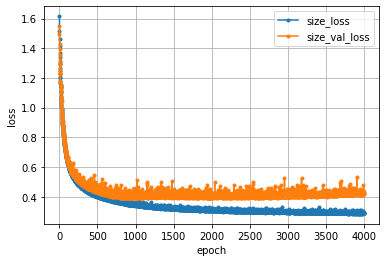

In [7]:
# 学習経過の可視化(大きさ)
size_loss     = size_history.history['loss']
size_val_loss = size_history.history['val_loss']

nb_epoch = len(size_loss)
plt.plot(range(nb_epoch), size_loss,     marker='.', label='size_loss')
plt.plot(range(nb_epoch), size_val_loss, marker='.', label='size_val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

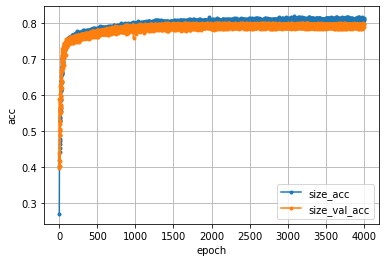

In [10]:
# 学習経過の可視化(大きさ)
size_acc     = size_history.history['accuracy']
size_val_acc = size_history.history['val_accuracy']

nb_epoch = len(size_acc)
plt.plot(range(nb_epoch), size_acc,     marker='.', label='size_acc')
plt.plot(range(nb_epoch), size_val_acc, marker='.', label='size_val_acc')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

In [20]:
print(size_y_test.argmax(axis=1).shape)

(2027,)


In [24]:
#大きさごとの推定精度の確認
size_predict = size_model.predict(size_x_test).argmax(axis=1)
size_answer = size_y_test.argmax(axis=1)
one_total = 0
one_ok = 0
two_total = 0
two_ok = 0
three_total = 0
three_ok = 0
four_total = 0
four_ok = 0
five_total = 0
five_ok = 0
for i in range(len(size_predict)):
    if size_answer[i] == 1:
        one_total = one_total + 1
        if size_predict[i] == size_answer[i]:
            one_ok = one_ok + 1
    if size_answer[i] == 2:
        two_total = two_total + 1
        if size_predict[i] == size_answer[i]:
            two_ok = two_ok + 1
    if size_answer[i] == 3:
        three_total = three_total + 1
        if size_predict[i] == size_answer[i]:
            three_ok = three_ok + 1
    if size_answer[i] == 4:
        four_total = four_total + 1
        if size_predict[i] == size_answer[i]:
            four_ok = four_ok + 1
    if size_answer[i] == 5:
        five_total = five_total + 1
        if size_predict[i] == size_answer[i]:
            five_ok = five_ok + 1
print("大きさ1の正答率："+str(one_ok/one_total))
print("大きさ2の正答率："+str(two_ok/two_total))
print("大きさ3の正答率："+str(three_ok/three_total))
print("大きさ4の正答率："+str(four_ok/four_total))
print("大きさ5の正答率："+str(five_ok/five_total))

大きさ1の正答率：0.9909502262443439
大きさ2の正答率：0.929471032745592
大きさ3の正答率：0.9767441860465116
大きさ4の正答率：0.9896640826873385
大きさ5の正答率：0.018867924528301886


In [11]:
## CNN(位置)

### modelの作成
position_model = Sequential()
### 畳み込み層
position_model.add(Conv1D(32, 3, padding='same', activation='relu', input_shape=(50, 1)))
### プーリング層
position_model.add(MaxPooling1D(2, padding='same'))
### Flatten層
position_model.add(Flatten())
### 全結合層
position_model.add(Dense(25, activation='softmax'))

### optimizer
adam = keras.optimizers.Adam()

###modelのコンパイル
position_model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [8]:
# 学習(位置)
epochs = 8000
batch_size = 128
position_history = position_model.fit(position_x_train, position_y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(position_x_test, position_y_test))

Train on 8108 samples, validate on 2027 samples
Epoch 1/8000
8108/8108 [==============================] - 0s 50us/step - loss: 3.1414 - accuracy: 0.0757 - val_loss: 3.0759 - val_accuracy: 0.1080
Epoch 2/8000
8108/8108 [==============================] - 0s 34us/step - loss: 3.0575 - accuracy: 0.1119 - val_loss: 3.0106 - val_accuracy: 0.1219
Epoch 3/8000
8108/8108 [==============================] - 0s 32us/step - loss: 2.9948 - accuracy: 0.1307 - val_loss: 2.9399 - val_accuracy: 0.1465
Epoch 4/8000
8108/8108 [==============================] - 0s 30us/step - loss: 2.9338 - accuracy: 0.1502 - val_loss: 2.8695 - val_accuracy: 0.1667
Epoch 5/8000
8108/8108 [==============================] - 0s 29us/step - loss: 2.8872 - accuracy: 0.1582 - val_loss: 2.8905 - val_accuracy: 0.1465
Epoch 6/8000
8108/8108 [==============================] - 0s 30us/step - loss: 2.8469 - accuracy: 0.1637 - val_loss: 2.7749 - val_accuracy: 0.2309
Epoch 7/8000
8108/8108 [==============================] - 0s 30us/step

8108/8108 [==============================] - 0s 26us/step - loss: 2.1562 - accuracy: 0.3476 - val_loss: 2.1086 - val_accuracy: 0.3606
Epoch 57/8000
8108/8108 [==============================] - 0s 26us/step - loss: 2.1595 - accuracy: 0.3524 - val_loss: 2.1853 - val_accuracy: 0.3246
Epoch 58/8000
8108/8108 [==============================] - 0s 27us/step - loss: 2.1496 - accuracy: 0.3541 - val_loss: 2.0740 - val_accuracy: 0.4036
Epoch 59/8000
8108/8108 [==============================] - 0s 27us/step - loss: 2.1320 - accuracy: 0.3556 - val_loss: 2.0886 - val_accuracy: 0.3897
Epoch 60/8000
8108/8108 [==============================] - 0s 27us/step - loss: 2.1384 - accuracy: 0.3556 - val_loss: 2.1209 - val_accuracy: 0.3370
Epoch 61/8000
8108/8108 [==============================] - 0s 26us/step - loss: 2.1261 - accuracy: 0.3555 - val_loss: 2.1254 - val_accuracy: 0.3271
Epoch 62/8000
8108/8108 [==============================] - 0s 26us/step - loss: 2.1275 - accuracy: 0.3605 - val_loss: 2.0486 -

8108/8108 [==============================] - 0s 31us/step - loss: 1.8553 - accuracy: 0.4071 - val_loss: 1.7775 - val_accuracy: 0.4716
Epoch 167/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.8466 - accuracy: 0.4134 - val_loss: 1.7990 - val_accuracy: 0.4233
Epoch 168/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.8076 - accuracy: 0.4297 - val_loss: 1.7837 - val_accuracy: 0.4410
Epoch 169/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.8241 - accuracy: 0.4261 - val_loss: 1.8511 - val_accuracy: 0.4420
Epoch 170/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.8413 - accuracy: 0.4214 - val_loss: 1.8603 - val_accuracy: 0.3883
Epoch 171/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.8254 - accuracy: 0.4187 - val_loss: 1.8298 - val_accuracy: 0.4297
Epoch 172/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.8282 - accuracy: 0.4096 - val_loss: 1.

8108/8108 [==============================] - 0s 30us/step - loss: 1.7745 - accuracy: 0.4357 - val_loss: 1.7716 - val_accuracy: 0.4642
Epoch 222/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.7523 - accuracy: 0.4365 - val_loss: 1.7928 - val_accuracy: 0.4184
Epoch 223/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.7591 - accuracy: 0.4392 - val_loss: 1.7543 - val_accuracy: 0.4642
Epoch 224/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.7672 - accuracy: 0.4286 - val_loss: 1.7613 - val_accuracy: 0.3947
Epoch 225/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.7343 - accuracy: 0.4467 - val_loss: 1.6746 - val_accuracy: 0.4933
Epoch 226/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.7671 - accuracy: 0.4414 - val_loss: 1.7682 - val_accuracy: 0.4790
Epoch 227/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.7566 - accuracy: 0.4302 - val_loss: 1.

8108/8108 [==============================] - 0s 29us/step - loss: 1.6812 - accuracy: 0.4552 - val_loss: 1.6447 - val_accuracy: 0.4850
Epoch 277/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.6996 - accuracy: 0.4396 - val_loss: 1.7016 - val_accuracy: 0.4356
Epoch 278/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.6927 - accuracy: 0.4513 - val_loss: 1.7570 - val_accuracy: 0.4095
Epoch 279/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.6960 - accuracy: 0.4478 - val_loss: 1.6737 - val_accuracy: 0.4484
Epoch 280/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.6773 - accuracy: 0.4551 - val_loss: 1.6706 - val_accuracy: 0.4563
Epoch 281/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.6713 - accuracy: 0.4577 - val_loss: 1.7578 - val_accuracy: 0.4198
Epoch 282/8000
8108/8108 [==============================] - 0s 44us/step - loss: 1.6819 - accuracy: 0.4577 - val_loss: 1.

8108/8108 [==============================] - 0s 30us/step - loss: 1.6428 - accuracy: 0.4540 - val_loss: 1.6398 - val_accuracy: 0.4632
Epoch 332/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.6259 - accuracy: 0.4747 - val_loss: 1.5936 - val_accuracy: 0.5052
Epoch 333/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.6444 - accuracy: 0.4629 - val_loss: 1.6464 - val_accuracy: 0.4632
Epoch 334/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.6655 - accuracy: 0.4577 - val_loss: 1.6722 - val_accuracy: 0.4332
Epoch 335/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.6386 - accuracy: 0.4639 - val_loss: 1.6186 - val_accuracy: 0.4869
Epoch 336/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.6302 - accuracy: 0.4630 - val_loss: 1.6735 - val_accuracy: 0.4391
Epoch 337/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.6180 - accuracy: 0.4718 - val_loss: 1.

8108/8108 [==============================] - 0s 30us/step - loss: 1.6006 - accuracy: 0.4759 - val_loss: 1.5934 - val_accuracy: 0.4484
Epoch 387/8000
8108/8108 [==============================] - 0s 36us/step - loss: 1.6036 - accuracy: 0.4666 - val_loss: 1.6572 - val_accuracy: 0.4435
Epoch 388/8000
8108/8108 [==============================] - 0s 44us/step - loss: 1.6020 - accuracy: 0.4726 - val_loss: 1.6024 - val_accuracy: 0.4909
Epoch 389/8000
8108/8108 [==============================] - 0s 32us/step - loss: 1.6066 - accuracy: 0.4639 - val_loss: 1.5879 - val_accuracy: 0.4859
Epoch 390/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.6028 - accuracy: 0.4644 - val_loss: 1.5853 - val_accuracy: 0.4771
Epoch 391/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.6327 - accuracy: 0.4600 - val_loss: 1.6079 - val_accuracy: 0.4790
Epoch 392/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.6061 - accuracy: 0.4739 - val_loss: 1.

8108/8108 [==============================] - 0s 30us/step - loss: 1.5775 - accuracy: 0.4746 - val_loss: 1.5748 - val_accuracy: 0.5146
Epoch 442/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.5848 - accuracy: 0.4704 - val_loss: 1.6735 - val_accuracy: 0.4840
Epoch 443/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.5781 - accuracy: 0.4706 - val_loss: 1.5508 - val_accuracy: 0.4859
Epoch 444/8000
8108/8108 [==============================] - 0s 33us/step - loss: 1.5607 - accuracy: 0.4782 - val_loss: 1.6190 - val_accuracy: 0.4435
Epoch 445/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.5582 - accuracy: 0.4773 - val_loss: 1.6332 - val_accuracy: 0.4563
Epoch 446/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.5420 - accuracy: 0.5036 - val_loss: 1.5223 - val_accuracy: 0.4963
Epoch 447/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.5373 - accuracy: 0.4914 - val_loss: 1.

8108/8108 [==============================] - 0s 29us/step - loss: 1.5402 - accuracy: 0.4783 - val_loss: 1.5886 - val_accuracy: 0.4687
Epoch 497/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.5483 - accuracy: 0.4813 - val_loss: 1.5369 - val_accuracy: 0.5249
Epoch 498/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.5493 - accuracy: 0.4824 - val_loss: 1.5863 - val_accuracy: 0.4632
Epoch 499/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.5315 - accuracy: 0.4861 - val_loss: 1.5436 - val_accuracy: 0.4948
Epoch 500/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.5216 - accuracy: 0.4904 - val_loss: 1.5187 - val_accuracy: 0.5195
Epoch 501/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.5085 - accuracy: 0.4983 - val_loss: 1.5290 - val_accuracy: 0.5387
Epoch 502/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.5202 - accuracy: 0.4882 - val_loss: 1.

8108/8108 [==============================] - 0s 30us/step - loss: 1.4963 - accuracy: 0.4952 - val_loss: 1.4756 - val_accuracy: 0.5067
Epoch 552/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.4871 - accuracy: 0.5027 - val_loss: 1.4896 - val_accuracy: 0.5190
Epoch 553/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.4817 - accuracy: 0.4967 - val_loss: 1.4760 - val_accuracy: 0.5126
Epoch 554/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.5098 - accuracy: 0.4985 - val_loss: 1.5214 - val_accuracy: 0.4692
Epoch 555/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.5027 - accuracy: 0.4949 - val_loss: 1.4930 - val_accuracy: 0.5170
Epoch 556/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.4963 - accuracy: 0.4979 - val_loss: 1.5173 - val_accuracy: 0.4805
Epoch 557/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.4934 - accuracy: 0.5023 - val_loss: 1.

8108/8108 [==============================] - 0s 29us/step - loss: 1.4703 - accuracy: 0.5065 - val_loss: 1.5356 - val_accuracy: 0.4825
Epoch 607/8000
8108/8108 [==============================] - 0s 28us/step - loss: 1.4739 - accuracy: 0.5000 - val_loss: 1.4874 - val_accuracy: 0.4914
Epoch 608/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.4516 - accuracy: 0.5097 - val_loss: 1.5005 - val_accuracy: 0.5091
Epoch 609/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.4808 - accuracy: 0.4994 - val_loss: 1.5164 - val_accuracy: 0.4948
Epoch 610/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.4743 - accuracy: 0.5062 - val_loss: 1.5081 - val_accuracy: 0.5081
Epoch 611/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.4913 - accuracy: 0.4872 - val_loss: 1.5333 - val_accuracy: 0.4751
Epoch 612/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.4454 - accuracy: 0.5116 - val_loss: 1.

8108/8108 [==============================] - 0s 29us/step - loss: 1.4309 - accuracy: 0.5180 - val_loss: 1.4473 - val_accuracy: 0.5126
Epoch 662/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.4271 - accuracy: 0.5085 - val_loss: 1.5189 - val_accuracy: 0.4716
Epoch 663/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.4668 - accuracy: 0.5014 - val_loss: 1.5169 - val_accuracy: 0.4978
Epoch 664/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.4428 - accuracy: 0.5006 - val_loss: 1.5489 - val_accuracy: 0.4795
Epoch 665/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.4512 - accuracy: 0.4988 - val_loss: 1.5178 - val_accuracy: 0.5160
Epoch 666/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.4368 - accuracy: 0.5058 - val_loss: 1.4844 - val_accuracy: 0.5141
Epoch 667/8000
8108/8108 [==============================] - 0s 38us/step - loss: 1.4417 - accuracy: 0.5089 - val_loss: 1.

8108/8108 [==============================] - 0s 30us/step - loss: 1.4243 - accuracy: 0.5120 - val_loss: 1.4455 - val_accuracy: 0.5190
Epoch 717/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.4062 - accuracy: 0.5070 - val_loss: 1.4581 - val_accuracy: 0.5180
Epoch 718/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.4210 - accuracy: 0.5155 - val_loss: 1.3991 - val_accuracy: 0.5220
Epoch 719/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.4267 - accuracy: 0.5037 - val_loss: 1.4219 - val_accuracy: 0.5560
Epoch 720/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.3925 - accuracy: 0.5186 - val_loss: 1.4633 - val_accuracy: 0.5096
Epoch 721/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.4287 - accuracy: 0.5096 - val_loss: 1.4342 - val_accuracy: 0.5116
Epoch 722/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.4450 - accuracy: 0.5033 - val_loss: 1.

8108/8108 [==============================] - 0s 29us/step - loss: 1.4027 - accuracy: 0.5178 - val_loss: 1.4506 - val_accuracy: 0.4854
Epoch 772/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.4070 - accuracy: 0.5142 - val_loss: 1.5103 - val_accuracy: 0.5037
Epoch 773/8000
8108/8108 [==============================] - 0s 28us/step - loss: 1.4417 - accuracy: 0.4861 - val_loss: 1.4723 - val_accuracy: 0.4919
Epoch 774/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.3866 - accuracy: 0.5222 - val_loss: 1.4222 - val_accuracy: 0.5160
Epoch 775/8000
8108/8108 [==============================] - 0s 34us/step - loss: 1.3882 - accuracy: 0.5253 - val_loss: 1.4890 - val_accuracy: 0.4840
Epoch 776/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.4182 - accuracy: 0.5102 - val_loss: 1.4039 - val_accuracy: 0.5210
Epoch 777/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.4060 - accuracy: 0.5170 - val_loss: 1.

8108/8108 [==============================] - 0s 29us/step - loss: 1.3939 - accuracy: 0.5144 - val_loss: 1.3788 - val_accuracy: 0.4983
Epoch 827/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3761 - accuracy: 0.5233 - val_loss: 1.3939 - val_accuracy: 0.5397
Epoch 828/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3898 - accuracy: 0.5189 - val_loss: 1.4578 - val_accuracy: 0.4825
Epoch 829/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3837 - accuracy: 0.5268 - val_loss: 1.3504 - val_accuracy: 0.5353
Epoch 830/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3805 - accuracy: 0.5275 - val_loss: 1.3850 - val_accuracy: 0.5624
Epoch 831/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3747 - accuracy: 0.5252 - val_loss: 1.4148 - val_accuracy: 0.4780
Epoch 832/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.4009 - accuracy: 0.5152 - val_loss: 1.

8108/8108 [==============================] - 0s 30us/step - loss: 1.3637 - accuracy: 0.5332 - val_loss: 1.3892 - val_accuracy: 0.4983
Epoch 882/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3694 - accuracy: 0.5157 - val_loss: 1.4320 - val_accuracy: 0.4899
Epoch 883/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3756 - accuracy: 0.5260 - val_loss: 1.4180 - val_accuracy: 0.4993
Epoch 884/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3774 - accuracy: 0.5253 - val_loss: 1.3574 - val_accuracy: 0.5190
Epoch 885/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3657 - accuracy: 0.5237 - val_loss: 1.4610 - val_accuracy: 0.4909
Epoch 886/8000
8108/8108 [==============================] - 0s 32us/step - loss: 1.3657 - accuracy: 0.5201 - val_loss: 1.4510 - val_accuracy: 0.5155
Epoch 887/8000
8108/8108 [==============================] - 0s 40us/step - loss: 1.3896 - accuracy: 0.5137 - val_loss: 1.

8108/8108 [==============================] - 0s 31us/step - loss: 1.3591 - accuracy: 0.5229 - val_loss: 1.3452 - val_accuracy: 0.5338
Epoch 937/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3488 - accuracy: 0.5332 - val_loss: 1.3845 - val_accuracy: 0.5298
Epoch 938/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3369 - accuracy: 0.5407 - val_loss: 1.3792 - val_accuracy: 0.5313
Epoch 939/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3253 - accuracy: 0.5406 - val_loss: 1.3970 - val_accuracy: 0.5200
Epoch 940/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3353 - accuracy: 0.5402 - val_loss: 1.4165 - val_accuracy: 0.5096
Epoch 941/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.3523 - accuracy: 0.5244 - val_loss: 1.3892 - val_accuracy: 0.5111
Epoch 942/8000
8108/8108 [==============================] - 0s 33us/step - loss: 1.3718 - accuracy: 0.5213 - val_loss: 1.

8108/8108 [==============================] - 0s 43us/step - loss: 1.3440 - accuracy: 0.5205 - val_loss: 1.4739 - val_accuracy: 0.4815
Epoch 992/8000
8108/8108 [==============================] - 0s 35us/step - loss: 1.3369 - accuracy: 0.5306 - val_loss: 1.3903 - val_accuracy: 0.5155
Epoch 993/8000
8108/8108 [==============================] - 0s 35us/step - loss: 1.3224 - accuracy: 0.5477 - val_loss: 1.3963 - val_accuracy: 0.5165
Epoch 994/8000
8108/8108 [==============================] - 0s 33us/step - loss: 1.3509 - accuracy: 0.5254 - val_loss: 1.3590 - val_accuracy: 0.5313
Epoch 995/8000
8108/8108 [==============================] - 0s 35us/step - loss: 1.3439 - accuracy: 0.5295 - val_loss: 1.3502 - val_accuracy: 0.5511
Epoch 996/8000
8108/8108 [==============================] - 0s 39us/step - loss: 1.3367 - accuracy: 0.5332 - val_loss: 1.4177 - val_accuracy: 0.5165
Epoch 997/8000
8108/8108 [==============================] - 0s 34us/step - loss: 1.3628 - accuracy: 0.5278 - val_loss: 1.

Epoch 1046/8000
8108/8108 [==============================] - 0s 34us/step - loss: 1.3234 - accuracy: 0.5328 - val_loss: 1.3725 - val_accuracy: 0.5812
Epoch 1047/8000
8108/8108 [==============================] - 0s 35us/step - loss: 1.3016 - accuracy: 0.5495 - val_loss: 1.3742 - val_accuracy: 0.5190
Epoch 1048/8000
8108/8108 [==============================] - 0s 38us/step - loss: 1.3128 - accuracy: 0.5405 - val_loss: 1.4327 - val_accuracy: 0.4869
Epoch 1049/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3325 - accuracy: 0.5286 - val_loss: 1.3758 - val_accuracy: 0.5338
Epoch 1050/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.3158 - accuracy: 0.5371 - val_loss: 1.3918 - val_accuracy: 0.4958
Epoch 1051/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3136 - accuracy: 0.5427 - val_loss: 1.4287 - val_accuracy: 0.5496
Epoch 1052/8000
8108/8108 [==============================] - 0s 36us/step - loss: 1.3386 - accuracy:

Epoch 1155/8000
8108/8108 [==============================] - 0s 35us/step - loss: 1.2987 - accuracy: 0.5492 - val_loss: 1.3783 - val_accuracy: 0.5057
Epoch 1156/8000
8108/8108 [==============================] - 0s 40us/step - loss: 1.3043 - accuracy: 0.5380 - val_loss: 1.3934 - val_accuracy: 0.5052
Epoch 1157/8000
8108/8108 [==============================] - 0s 36us/step - loss: 1.2821 - accuracy: 0.5520 - val_loss: 1.3949 - val_accuracy: 0.5328
Epoch 1158/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2973 - accuracy: 0.5385 - val_loss: 1.4607 - val_accuracy: 0.5141
Epoch 1159/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.2884 - accuracy: 0.5455 - val_loss: 1.3435 - val_accuracy: 0.5244
Epoch 1160/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3092 - accuracy: 0.5393 - val_loss: 1.4105 - val_accuracy: 0.5368
Epoch 1161/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.3099 - accuracy:

Epoch 1264/8000
8108/8108 [==============================] - 0s 34us/step - loss: 1.2526 - accuracy: 0.5593 - val_loss: 1.3837 - val_accuracy: 0.5451
Epoch 1265/8000
8108/8108 [==============================] - 0s 32us/step - loss: 1.2566 - accuracy: 0.5635 - val_loss: 1.3839 - val_accuracy: 0.5274
Epoch 1266/8000
8108/8108 [==============================] - 0s 54us/step - loss: 1.2614 - accuracy: 0.5629 - val_loss: 1.2967 - val_accuracy: 0.6034
Epoch 1267/8000
8108/8108 [==============================] - 0s 42us/step - loss: 1.2459 - accuracy: 0.5673 - val_loss: 1.3288 - val_accuracy: 0.5274
Epoch 1268/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2689 - accuracy: 0.5498 - val_loss: 1.3150 - val_accuracy: 0.5619
Epoch 1269/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.2767 - accuracy: 0.5481 - val_loss: 1.4248 - val_accuracy: 0.4958
Epoch 1270/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.2772 - accuracy:

Epoch 1373/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.2367 - accuracy: 0.5656 - val_loss: 1.3332 - val_accuracy: 0.5535
Epoch 1374/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2597 - accuracy: 0.5543 - val_loss: 1.3135 - val_accuracy: 0.5244
Epoch 1375/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.2550 - accuracy: 0.5541 - val_loss: 1.3137 - val_accuracy: 0.5382
Epoch 1376/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2628 - accuracy: 0.5498 - val_loss: 1.2854 - val_accuracy: 0.5831
Epoch 1377/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2565 - accuracy: 0.5560 - val_loss: 1.3113 - val_accuracy: 0.5412
Epoch 1378/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.2387 - accuracy: 0.5654 - val_loss: 1.3457 - val_accuracy: 0.5565
Epoch 1379/8000
8108/8108 [==============================] - 0s 45us/step - loss: 1.2365 - accuracy:

Epoch 1482/8000
8108/8108 [==============================] - 0s 33us/step - loss: 1.2808 - accuracy: 0.5424 - val_loss: 1.3033 - val_accuracy: 0.5585
Epoch 1483/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2150 - accuracy: 0.5722 - val_loss: 1.4579 - val_accuracy: 0.4756
Epoch 1484/8000
8108/8108 [==============================] - 0s 47us/step - loss: 1.2303 - accuracy: 0.5587 - val_loss: 1.2738 - val_accuracy: 0.5821
Epoch 1485/8000
8108/8108 [==============================] - 0s 37us/step - loss: 1.2220 - accuracy: 0.5724 - val_loss: 1.3498 - val_accuracy: 0.5427
Epoch 1486/8000
8108/8108 [==============================] - 0s 34us/step - loss: 1.2674 - accuracy: 0.5372 - val_loss: 1.3698 - val_accuracy: 0.5525
Epoch 1487/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2453 - accuracy: 0.5553 - val_loss: 1.3199 - val_accuracy: 0.5442
Epoch 1488/8000
8108/8108 [==============================] - 0s 48us/step - loss: 1.2238 - accuracy:

Epoch 1591/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2107 - accuracy: 0.5652 - val_loss: 1.3207 - val_accuracy: 0.5639
Epoch 1592/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.2006 - accuracy: 0.5672 - val_loss: 1.3166 - val_accuracy: 0.5437
Epoch 1593/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.2080 - accuracy: 0.5714 - val_loss: 1.3690 - val_accuracy: 0.5565
Epoch 1594/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.2188 - accuracy: 0.5705 - val_loss: 1.3020 - val_accuracy: 0.5511
Epoch 1595/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.2168 - accuracy: 0.5675 - val_loss: 1.3047 - val_accuracy: 0.5836
Epoch 1596/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.2238 - accuracy: 0.5685 - val_loss: 1.2624 - val_accuracy: 0.5841
Epoch 1597/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1993 - accuracy:

Epoch 1700/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1965 - accuracy: 0.5741 - val_loss: 1.2816 - val_accuracy: 0.5599
Epoch 1701/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1863 - accuracy: 0.5766 - val_loss: 1.2808 - val_accuracy: 0.5945
Epoch 1702/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.1936 - accuracy: 0.5756 - val_loss: 1.3378 - val_accuracy: 0.5466
Epoch 1703/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1956 - accuracy: 0.5779 - val_loss: 1.2790 - val_accuracy: 0.5930
Epoch 1704/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1834 - accuracy: 0.5815 - val_loss: 1.2888 - val_accuracy: 0.5895
Epoch 1705/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1992 - accuracy: 0.5696 - val_loss: 1.2681 - val_accuracy: 0.5999
Epoch 1706/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.2052 - accuracy:

Epoch 1809/8000
8108/8108 [==============================] - 0s 33us/step - loss: 1.1921 - accuracy: 0.5834 - val_loss: 1.2706 - val_accuracy: 0.5807
Epoch 1810/8000
8108/8108 [==============================] - 0s 56us/step - loss: 1.1867 - accuracy: 0.5720 - val_loss: 1.2532 - val_accuracy: 0.5629
Epoch 1811/8000
8108/8108 [==============================] - 0s 34us/step - loss: 1.1881 - accuracy: 0.5633 - val_loss: 1.2596 - val_accuracy: 0.5807
Epoch 1812/8000
8108/8108 [==============================] - 0s 37us/step - loss: 1.1723 - accuracy: 0.5770 - val_loss: 1.2629 - val_accuracy: 0.5728
Epoch 1813/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1711 - accuracy: 0.5798 - val_loss: 1.3001 - val_accuracy: 0.5831
Epoch 1814/8000
8108/8108 [==============================] - 0s 38us/step - loss: 1.2252 - accuracy: 0.5623 - val_loss: 1.3242 - val_accuracy: 0.5264
Epoch 1815/8000
8108/8108 [==============================] - 0s 34us/step - loss: 1.1780 - accuracy:

Epoch 1918/8000
8108/8108 [==============================] - 0s 38us/step - loss: 1.1828 - accuracy: 0.5729 - val_loss: 1.3087 - val_accuracy: 0.5792
Epoch 1919/8000
8108/8108 [==============================] - 0s 34us/step - loss: 1.1462 - accuracy: 0.5916 - val_loss: 1.2832 - val_accuracy: 0.5792
Epoch 1920/8000
8108/8108 [==============================] - 0s 44us/step - loss: 1.1665 - accuracy: 0.5850 - val_loss: 1.2682 - val_accuracy: 0.6019
Epoch 1921/8000
8108/8108 [==============================] - 0s 44us/step - loss: 1.1547 - accuracy: 0.5872 - val_loss: 1.2668 - val_accuracy: 0.5861
Epoch 1922/8000
8108/8108 [==============================] - 0s 34us/step - loss: 1.1533 - accuracy: 0.5851 - val_loss: 1.3661 - val_accuracy: 0.5545
Epoch 1923/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1702 - accuracy: 0.5794 - val_loss: 1.2936 - val_accuracy: 0.5708
Epoch 1924/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1769 - accuracy:

Epoch 2027/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1538 - accuracy: 0.5835 - val_loss: 1.2651 - val_accuracy: 0.5807
Epoch 2028/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1759 - accuracy: 0.5699 - val_loss: 1.2641 - val_accuracy: 0.5777
Epoch 2029/8000
8108/8108 [==============================] - 0s 28us/step - loss: 1.1843 - accuracy: 0.5709 - val_loss: 1.2467 - val_accuracy: 0.5960
Epoch 2030/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1379 - accuracy: 0.5942 - val_loss: 1.2136 - val_accuracy: 0.5940
Epoch 2031/8000
8108/8108 [==============================] - 0s 28us/step - loss: 1.1377 - accuracy: 0.6040 - val_loss: 1.2478 - val_accuracy: 0.5565
Epoch 2032/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1602 - accuracy: 0.5813 - val_loss: 1.2719 - val_accuracy: 0.5747
Epoch 2033/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1579 - accuracy:

Epoch 2136/8000
8108/8108 [==============================] - 0s 28us/step - loss: 1.1466 - accuracy: 0.5886 - val_loss: 1.2709 - val_accuracy: 0.5930
Epoch 2137/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1531 - accuracy: 0.5799 - val_loss: 1.2698 - val_accuracy: 0.5881
Epoch 2138/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1695 - accuracy: 0.5745 - val_loss: 1.3657 - val_accuracy: 0.5530
Epoch 2139/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1585 - accuracy: 0.5823 - val_loss: 1.3256 - val_accuracy: 0.5698
Epoch 2140/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1318 - accuracy: 0.5935 - val_loss: 1.2596 - val_accuracy: 0.5812
Epoch 2141/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1429 - accuracy: 0.5863 - val_loss: 1.2552 - val_accuracy: 0.5807
Epoch 2142/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1492 - accuracy:

Epoch 2245/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.1098 - accuracy: 0.6056 - val_loss: 1.2352 - val_accuracy: 0.6053
Epoch 2246/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.1291 - accuracy: 0.5909 - val_loss: 1.3042 - val_accuracy: 0.5540
Epoch 2247/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1632 - accuracy: 0.5746 - val_loss: 1.2730 - val_accuracy: 0.5614
Epoch 2248/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1213 - accuracy: 0.5988 - val_loss: 1.3197 - val_accuracy: 0.5442
Epoch 2249/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1261 - accuracy: 0.5931 - val_loss: 1.2721 - val_accuracy: 0.6019
Epoch 2250/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1349 - accuracy: 0.5886 - val_loss: 1.2784 - val_accuracy: 0.5742
Epoch 2251/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1272 - accuracy:

Epoch 2354/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.1211 - accuracy: 0.5941 - val_loss: 1.2467 - val_accuracy: 0.5772
Epoch 2355/8000
8108/8108 [==============================] - 0s 33us/step - loss: 1.1143 - accuracy: 0.5910 - val_loss: 1.2191 - val_accuracy: 0.6211
Epoch 2356/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1118 - accuracy: 0.6047 - val_loss: 1.2762 - val_accuracy: 0.5668
Epoch 2357/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1433 - accuracy: 0.5840 - val_loss: 1.2647 - val_accuracy: 0.5851
Epoch 2358/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.1226 - accuracy: 0.5905 - val_loss: 1.2323 - val_accuracy: 0.5915
Epoch 2359/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.1391 - accuracy: 0.5850 - val_loss: 1.1917 - val_accuracy: 0.6122
Epoch 2360/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1299 - accuracy:

Epoch 2463/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1442 - accuracy: 0.5863 - val_loss: 1.3016 - val_accuracy: 0.6063
Epoch 2464/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.1024 - accuracy: 0.6006 - val_loss: 1.2270 - val_accuracy: 0.6354
Epoch 2465/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0907 - accuracy: 0.6111 - val_loss: 1.2332 - val_accuracy: 0.5940
Epoch 2466/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0963 - accuracy: 0.5998 - val_loss: 1.2802 - val_accuracy: 0.5604
Epoch 2467/8000
8108/8108 [==============================] - 0s 38us/step - loss: 1.1005 - accuracy: 0.5992 - val_loss: 1.2842 - val_accuracy: 0.5757
Epoch 2468/8000
8108/8108 [==============================] - 0s 34us/step - loss: 1.0937 - accuracy: 0.6035 - val_loss: 1.3267 - val_accuracy: 0.5836
Epoch 2469/8000
8108/8108 [==============================] - 0s 39us/step - loss: 1.1108 - accuracy:

Epoch 2572/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0963 - accuracy: 0.6020 - val_loss: 1.2967 - val_accuracy: 0.5678
Epoch 2573/8000
8108/8108 [==============================] - 0s 44us/step - loss: 1.1002 - accuracy: 0.6021 - val_loss: 1.3114 - val_accuracy: 0.5688
Epoch 2574/8000
8108/8108 [==============================] - 0s 44us/step - loss: 1.1172 - accuracy: 0.5873 - val_loss: 1.2584 - val_accuracy: 0.5881
Epoch 2575/8000
8108/8108 [==============================] - 0s 37us/step - loss: 1.0860 - accuracy: 0.6080 - val_loss: 1.2403 - val_accuracy: 0.6389
Epoch 2576/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0924 - accuracy: 0.5992 - val_loss: 1.2631 - val_accuracy: 0.5910
Epoch 2577/8000
8108/8108 [==============================] - 0s 49us/step - loss: 1.1017 - accuracy: 0.6045 - val_loss: 1.2954 - val_accuracy: 0.6117
Epoch 2578/8000
8108/8108 [==============================] - 0s 47us/step - loss: 1.1295 - accuracy:

Epoch 2681/8000
8108/8108 [==============================] - 0s 43us/step - loss: 1.0852 - accuracy: 0.6072 - val_loss: 1.2763 - val_accuracy: 0.5836
Epoch 2682/8000
8108/8108 [==============================] - 0s 33us/step - loss: 1.0842 - accuracy: 0.6153 - val_loss: 1.2216 - val_accuracy: 0.6093
Epoch 2683/8000
8108/8108 [==============================] - 0s 37us/step - loss: 1.0935 - accuracy: 0.6034 - val_loss: 1.2833 - val_accuracy: 0.5950
Epoch 2684/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1195 - accuracy: 0.5914 - val_loss: 1.2390 - val_accuracy: 0.5890
Epoch 2685/8000
8108/8108 [==============================] - 0s 36us/step - loss: 1.1081 - accuracy: 0.5882 - val_loss: 1.2585 - val_accuracy: 0.5974
Epoch 2686/8000
8108/8108 [==============================] - 0s 41us/step - loss: 1.1097 - accuracy: 0.6008 - val_loss: 1.2198 - val_accuracy: 0.5876
Epoch 2687/8000
8108/8108 [==============================] - 0s 40us/step - loss: 1.1005 - accuracy:

Epoch 2790/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0961 - accuracy: 0.6053 - val_loss: 1.2734 - val_accuracy: 0.5673
Epoch 2791/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1184 - accuracy: 0.5945 - val_loss: 1.2272 - val_accuracy: 0.5984
Epoch 2792/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1309 - accuracy: 0.5777 - val_loss: 1.4270 - val_accuracy: 0.5303
Epoch 2793/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1303 - accuracy: 0.5926 - val_loss: 1.2623 - val_accuracy: 0.6083
Epoch 2794/8000
8108/8108 [==============================] - 0s 34us/step - loss: 1.0982 - accuracy: 0.6027 - val_loss: 1.2819 - val_accuracy: 0.5728
Epoch 2795/8000
8108/8108 [==============================] - 0s 50us/step - loss: 1.0705 - accuracy: 0.6133 - val_loss: 1.2198 - val_accuracy: 0.6043
Epoch 2796/8000
8108/8108 [==============================] - 0s 36us/step - loss: 1.0825 - accuracy:

Epoch 2899/8000
8108/8108 [==============================] - 0s 49us/step - loss: 1.0721 - accuracy: 0.6057 - val_loss: 1.2738 - val_accuracy: 0.5580
Epoch 2900/8000
8108/8108 [==============================] - 0s 34us/step - loss: 1.0834 - accuracy: 0.6035 - val_loss: 1.2676 - val_accuracy: 0.6029
Epoch 2901/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0944 - accuracy: 0.6010 - val_loss: 1.2463 - val_accuracy: 0.5826
Epoch 2902/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0794 - accuracy: 0.6172 - val_loss: 1.2282 - val_accuracy: 0.6043
Epoch 2903/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0570 - accuracy: 0.6167 - val_loss: 1.2634 - val_accuracy: 0.6019
Epoch 2904/8000
8108/8108 [==============================] - 0s 49us/step - loss: 1.1013 - accuracy: 0.5989 - val_loss: 1.3826 - val_accuracy: 0.5664
Epoch 2905/8000
8108/8108 [==============================] - 0s 51us/step - loss: 1.0746 - accuracy:

Epoch 3008/8000
8108/8108 [==============================] - 0s 34us/step - loss: 1.0652 - accuracy: 0.6094 - val_loss: 1.1854 - val_accuracy: 0.6364
Epoch 3009/8000
8108/8108 [==============================] - 0s 43us/step - loss: 1.0833 - accuracy: 0.6019 - val_loss: 1.2233 - val_accuracy: 0.6068
Epoch 3010/8000
8108/8108 [==============================] - 0s 40us/step - loss: 1.0591 - accuracy: 0.6079 - val_loss: 1.2878 - val_accuracy: 0.5673
Epoch 3011/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0642 - accuracy: 0.6053 - val_loss: 1.2347 - val_accuracy: 0.6088
Epoch 3012/8000
8108/8108 [==============================] - 0s 32us/step - loss: 1.0471 - accuracy: 0.6235 - val_loss: 1.2218 - val_accuracy: 0.5920
Epoch 3013/8000
8108/8108 [==============================] - 0s 48us/step - loss: 1.0672 - accuracy: 0.6087 - val_loss: 1.2609 - val_accuracy: 0.6029
Epoch 3014/8000
8108/8108 [==============================] - 0s 43us/step - loss: 1.0769 - accuracy:

Epoch 3117/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0515 - accuracy: 0.6148 - val_loss: 1.2480 - val_accuracy: 0.6127
Epoch 3118/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0507 - accuracy: 0.6159 - val_loss: 1.2942 - val_accuracy: 0.5757
Epoch 3119/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0640 - accuracy: 0.6125 - val_loss: 1.2863 - val_accuracy: 0.5757
Epoch 3120/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0693 - accuracy: 0.6116 - val_loss: 1.1968 - val_accuracy: 0.6058
Epoch 3121/8000
8108/8108 [==============================] - 0s 33us/step - loss: 1.0624 - accuracy: 0.6125 - val_loss: 1.2603 - val_accuracy: 0.5866
Epoch 3122/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0698 - accuracy: 0.6098 - val_loss: 1.2547 - val_accuracy: 0.5861
Epoch 3123/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0377 - accuracy:

Epoch 3226/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0604 - accuracy: 0.6071 - val_loss: 1.2100 - val_accuracy: 0.5955
Epoch 3227/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0731 - accuracy: 0.6153 - val_loss: 1.3018 - val_accuracy: 0.5782
Epoch 3228/8000
8108/8108 [==============================] - 0s 33us/step - loss: 1.0629 - accuracy: 0.6114 - val_loss: 1.2317 - val_accuracy: 0.6147
Epoch 3229/8000
8108/8108 [==============================] - 0s 36us/step - loss: 1.0521 - accuracy: 0.6152 - val_loss: 1.2061 - val_accuracy: 0.6482
Epoch 3230/8000
8108/8108 [==============================] - 0s 34us/step - loss: 1.0715 - accuracy: 0.6101 - val_loss: 1.2820 - val_accuracy: 0.5930
Epoch 3231/8000
8108/8108 [==============================] - 0s 36us/step - loss: 1.0398 - accuracy: 0.6293 - val_loss: 1.1964 - val_accuracy: 0.6463
Epoch 3232/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0609 - accuracy:

Epoch 3335/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0550 - accuracy: 0.6117 - val_loss: 1.1774 - val_accuracy: 0.6492
Epoch 3336/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0276 - accuracy: 0.6304 - val_loss: 1.2510 - val_accuracy: 0.5974
Epoch 3337/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0396 - accuracy: 0.6221 - val_loss: 1.1963 - val_accuracy: 0.6108
Epoch 3338/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0255 - accuracy: 0.6281 - val_loss: 1.2749 - val_accuracy: 0.5752
Epoch 3339/8000
8108/8108 [==============================] - 0s 33us/step - loss: 1.0377 - accuracy: 0.6230 - val_loss: 1.2224 - val_accuracy: 0.6098
Epoch 3340/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0354 - accuracy: 0.6337 - val_loss: 1.2071 - val_accuracy: 0.6280
Epoch 3341/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0291 - accuracy:

Epoch 3444/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0399 - accuracy: 0.6204 - val_loss: 1.1921 - val_accuracy: 0.6162
Epoch 3445/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0474 - accuracy: 0.6198 - val_loss: 1.2202 - val_accuracy: 0.6265
Epoch 3446/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0387 - accuracy: 0.6215 - val_loss: 1.1828 - val_accuracy: 0.6172
Epoch 3447/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0389 - accuracy: 0.6223 - val_loss: 1.2184 - val_accuracy: 0.6379
Epoch 3448/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0309 - accuracy: 0.6219 - val_loss: 1.2491 - val_accuracy: 0.5905
Epoch 3449/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0604 - accuracy: 0.6025 - val_loss: 1.2207 - val_accuracy: 0.6127
Epoch 3450/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0475 - accuracy:

Epoch 3553/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0406 - accuracy: 0.6226 - val_loss: 1.2608 - val_accuracy: 0.5851
Epoch 3554/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0683 - accuracy: 0.6082 - val_loss: 1.2797 - val_accuracy: 0.5762
Epoch 3555/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0220 - accuracy: 0.6354 - val_loss: 1.2241 - val_accuracy: 0.5945
Epoch 3556/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0343 - accuracy: 0.6228 - val_loss: 1.1825 - val_accuracy: 0.6478
Epoch 3557/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0323 - accuracy: 0.6221 - val_loss: 1.2839 - val_accuracy: 0.5876
Epoch 3558/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0326 - accuracy: 0.6222 - val_loss: 1.2490 - val_accuracy: 0.5812
Epoch 3559/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0391 - accuracy:

Epoch 3662/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0192 - accuracy: 0.6338 - val_loss: 1.1786 - val_accuracy: 0.6231
Epoch 3663/8000
8108/8108 [==============================] - 0s 36us/step - loss: 1.0481 - accuracy: 0.6159 - val_loss: 1.1930 - val_accuracy: 0.6137
Epoch 3664/8000
8108/8108 [==============================] - 0s 35us/step - loss: 1.0175 - accuracy: 0.6264 - val_loss: 1.1833 - val_accuracy: 0.6152
Epoch 3665/8000
8108/8108 [==============================] - 0s 35us/step - loss: 1.0026 - accuracy: 0.6380 - val_loss: 1.2108 - val_accuracy: 0.6315
Epoch 3666/8000
8108/8108 [==============================] - 0s 33us/step - loss: 1.0384 - accuracy: 0.6220 - val_loss: 1.2177 - val_accuracy: 0.6103
Epoch 3667/8000
8108/8108 [==============================] - 0s 33us/step - loss: 1.0278 - accuracy: 0.6215 - val_loss: 1.2889 - val_accuracy: 0.5767
Epoch 3668/8000
8108/8108 [==============================] - 0s 33us/step - loss: 1.0309 - accuracy:

Epoch 3771/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0236 - accuracy: 0.6286 - val_loss: 1.1954 - val_accuracy: 0.6083
Epoch 3772/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0315 - accuracy: 0.6222 - val_loss: 1.2331 - val_accuracy: 0.5821
Epoch 3773/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0229 - accuracy: 0.6320 - val_loss: 1.1675 - val_accuracy: 0.6182
Epoch 3774/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0519 - accuracy: 0.6108 - val_loss: 1.2743 - val_accuracy: 0.5866
Epoch 3775/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9996 - accuracy: 0.6452 - val_loss: 1.1762 - val_accuracy: 0.6231
Epoch 3776/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0472 - accuracy: 0.6210 - val_loss: 1.1419 - val_accuracy: 0.6818
Epoch 3777/8000
8108/8108 [==============================] - 0s 35us/step - loss: 1.0080 - accuracy:

Epoch 3880/8000
8108/8108 [==============================] - 0s 35us/step - loss: 1.0220 - accuracy: 0.6235 - val_loss: 1.1780 - val_accuracy: 0.6093
Epoch 3881/8000
8108/8108 [==============================] - 0s 33us/step - loss: 0.9996 - accuracy: 0.6317 - val_loss: 1.1574 - val_accuracy: 0.6320
Epoch 3882/8000
8108/8108 [==============================] - 0s 37us/step - loss: 0.9991 - accuracy: 0.6336 - val_loss: 1.1588 - val_accuracy: 0.6226
Epoch 3883/8000
8108/8108 [==============================] - 0s 42us/step - loss: 1.0061 - accuracy: 0.6330 - val_loss: 1.2058 - val_accuracy: 0.5950
Epoch 3884/8000
8108/8108 [==============================] - 0s 34us/step - loss: 1.0295 - accuracy: 0.6201 - val_loss: 1.1700 - val_accuracy: 0.6053
Epoch 3885/8000
8108/8108 [==============================] - 0s 32us/step - loss: 1.0254 - accuracy: 0.6180 - val_loss: 1.1614 - val_accuracy: 0.6068
Epoch 3886/8000
8108/8108 [==============================] - 0s 46us/step - loss: 1.0340 - accuracy:

Epoch 3989/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0297 - accuracy: 0.6169 - val_loss: 1.1642 - val_accuracy: 0.6216
Epoch 3990/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0185 - accuracy: 0.6264 - val_loss: 1.1520 - val_accuracy: 0.5945
Epoch 3991/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9961 - accuracy: 0.6338 - val_loss: 1.1399 - val_accuracy: 0.6191
Epoch 3992/8000
8108/8108 [==============================] - 0s 33us/step - loss: 1.0265 - accuracy: 0.6201 - val_loss: 1.1805 - val_accuracy: 0.6009
Epoch 3993/8000
8108/8108 [==============================] - 0s 32us/step - loss: 1.0383 - accuracy: 0.6191 - val_loss: 1.1168 - val_accuracy: 0.6344
Epoch 3994/8000
8108/8108 [==============================] - 0s 33us/step - loss: 0.9883 - accuracy: 0.6360 - val_loss: 1.1640 - val_accuracy: 0.6285
Epoch 3995/8000
8108/8108 [==============================] - 0s 37us/step - loss: 0.9949 - accuracy:

Epoch 4098/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0129 - accuracy: 0.6268 - val_loss: 1.1225 - val_accuracy: 0.6334
Epoch 4099/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9917 - accuracy: 0.6401 - val_loss: 1.1403 - val_accuracy: 0.6191
Epoch 4100/8000
8108/8108 [==============================] - 0s 38us/step - loss: 0.9930 - accuracy: 0.6358 - val_loss: 1.1018 - val_accuracy: 0.6354
Epoch 4101/8000
8108/8108 [==============================] - 0s 47us/step - loss: 0.9840 - accuracy: 0.6369 - val_loss: 1.1287 - val_accuracy: 0.6029
Epoch 4102/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9800 - accuracy: 0.6401 - val_loss: 1.1110 - val_accuracy: 0.6349
Epoch 4103/8000
8108/8108 [==============================] - 0s 35us/step - loss: 0.9984 - accuracy: 0.6332 - val_loss: 1.2077 - val_accuracy: 0.5974
Epoch 4104/8000
8108/8108 [==============================] - 0s 50us/step - loss: 1.0116 - accuracy:

Epoch 4207/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0334 - accuracy: 0.6207 - val_loss: 1.1351 - val_accuracy: 0.6132
Epoch 4208/8000
8108/8108 [==============================] - 0s 34us/step - loss: 0.9928 - accuracy: 0.6310 - val_loss: 1.1678 - val_accuracy: 0.6088
Epoch 4209/8000
8108/8108 [==============================] - 0s 47us/step - loss: 0.9968 - accuracy: 0.6280 - val_loss: 1.1668 - val_accuracy: 0.6369
Epoch 4210/8000
8108/8108 [==============================] - 0s 50us/step - loss: 1.0070 - accuracy: 0.6256 - val_loss: 1.1729 - val_accuracy: 0.5876
Epoch 4211/8000
8108/8108 [==============================] - 0s 38us/step - loss: 0.9932 - accuracy: 0.6355 - val_loss: 1.1226 - val_accuracy: 0.6246
Epoch 4212/8000
8108/8108 [==============================] - 0s 34us/step - loss: 1.0152 - accuracy: 0.6297 - val_loss: 1.2292 - val_accuracy: 0.6048
Epoch 4213/8000
8108/8108 [==============================] - 0s 36us/step - loss: 0.9959 - accuracy:

Epoch 4316/8000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9946 - accuracy: 0.6309 - val_loss: 1.1548 - val_accuracy: 0.6246
Epoch 4317/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9932 - accuracy: 0.6422 - val_loss: 1.1464 - val_accuracy: 0.6221
Epoch 4318/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0027 - accuracy: 0.6336 - val_loss: 1.0973 - val_accuracy: 0.6581
Epoch 4319/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9804 - accuracy: 0.6457 - val_loss: 1.1287 - val_accuracy: 0.6206
Epoch 4320/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9854 - accuracy: 0.6285 - val_loss: 1.1315 - val_accuracy: 0.6408
Epoch 4321/8000
8108/8108 [==============================] - 0s 36us/step - loss: 1.0036 - accuracy: 0.6236 - val_loss: 1.2484 - val_accuracy: 0.5772
Epoch 4322/8000
8108/8108 [==============================] - 0s 33us/step - loss: 0.9989 - accuracy:

Epoch 4425/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9882 - accuracy: 0.6337 - val_loss: 1.1777 - val_accuracy: 0.5950
Epoch 4426/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9842 - accuracy: 0.6291 - val_loss: 1.1189 - val_accuracy: 0.6251
Epoch 4427/8000
8108/8108 [==============================] - 0s 34us/step - loss: 1.0030 - accuracy: 0.6312 - val_loss: 1.1615 - val_accuracy: 0.6088
Epoch 4428/8000
8108/8108 [==============================] - 0s 33us/step - loss: 0.9977 - accuracy: 0.6306 - val_loss: 1.0816 - val_accuracy: 0.6611
Epoch 4429/8000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9660 - accuracy: 0.6524 - val_loss: 1.0936 - val_accuracy: 0.6394
Epoch 4430/8000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9798 - accuracy: 0.6437 - val_loss: 1.1173 - val_accuracy: 0.6418
Epoch 4431/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9740 - accuracy:

Epoch 4534/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9894 - accuracy: 0.6376 - val_loss: 1.1582 - val_accuracy: 0.6088
Epoch 4535/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9897 - accuracy: 0.6359 - val_loss: 1.1295 - val_accuracy: 0.6428
Epoch 4536/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0090 - accuracy: 0.6274 - val_loss: 1.1261 - val_accuracy: 0.6211
Epoch 4537/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9707 - accuracy: 0.6513 - val_loss: 1.1730 - val_accuracy: 0.6048
Epoch 4538/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9817 - accuracy: 0.6411 - val_loss: 1.1689 - val_accuracy: 0.6014
Epoch 4539/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9724 - accuracy: 0.6408 - val_loss: 1.0925 - val_accuracy: 0.6270
Epoch 4540/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9681 - accuracy:

Epoch 4643/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9681 - accuracy: 0.6447 - val_loss: 1.1133 - val_accuracy: 0.6561
Epoch 4644/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9734 - accuracy: 0.6425 - val_loss: 1.1514 - val_accuracy: 0.5940
Epoch 4645/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9869 - accuracy: 0.6425 - val_loss: 1.1048 - val_accuracy: 0.6270
Epoch 4646/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9862 - accuracy: 0.6311 - val_loss: 1.1745 - val_accuracy: 0.5886
Epoch 4647/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9524 - accuracy: 0.6495 - val_loss: 1.1434 - val_accuracy: 0.6103
Epoch 4648/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9937 - accuracy: 0.6260 - val_loss: 1.1080 - val_accuracy: 0.6413
Epoch 4649/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9878 - accuracy:

Epoch 4752/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9743 - accuracy: 0.6420 - val_loss: 1.2008 - val_accuracy: 0.5930
Epoch 4753/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9681 - accuracy: 0.6432 - val_loss: 1.1056 - val_accuracy: 0.6162
Epoch 4754/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9579 - accuracy: 0.6471 - val_loss: 1.1054 - val_accuracy: 0.6364
Epoch 4755/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9841 - accuracy: 0.6365 - val_loss: 1.1961 - val_accuracy: 0.5925
Epoch 4756/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9877 - accuracy: 0.6385 - val_loss: 1.1300 - val_accuracy: 0.6305
Epoch 4757/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9684 - accuracy: 0.6485 - val_loss: 1.1044 - val_accuracy: 0.6828
Epoch 4758/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9755 - accuracy:

Epoch 4861/8000
8108/8108 [==============================] - 0s 34us/step - loss: 0.9744 - accuracy: 0.6444 - val_loss: 1.0789 - val_accuracy: 0.6453
Epoch 4862/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9769 - accuracy: 0.6385 - val_loss: 1.1070 - val_accuracy: 0.6349
Epoch 4863/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9717 - accuracy: 0.6370 - val_loss: 1.0946 - val_accuracy: 0.6650
Epoch 4864/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9850 - accuracy: 0.6312 - val_loss: 1.2292 - val_accuracy: 0.5994
Epoch 4865/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9738 - accuracy: 0.6429 - val_loss: 1.1483 - val_accuracy: 0.6157
Epoch 4866/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9645 - accuracy: 0.6443 - val_loss: 1.1091 - val_accuracy: 0.6394
Epoch 4867/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9540 - accuracy:

Epoch 4970/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9580 - accuracy: 0.6480 - val_loss: 1.0899 - val_accuracy: 0.6384
Epoch 4971/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9702 - accuracy: 0.6396 - val_loss: 1.0722 - val_accuracy: 0.6384
Epoch 4972/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9837 - accuracy: 0.6427 - val_loss: 1.0935 - val_accuracy: 0.6413
Epoch 4973/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9489 - accuracy: 0.6473 - val_loss: 1.0815 - val_accuracy: 0.6443
Epoch 4974/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9506 - accuracy: 0.6501 - val_loss: 1.0866 - val_accuracy: 0.6344
Epoch 4975/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9569 - accuracy: 0.6444 - val_loss: 1.1111 - val_accuracy: 0.6344
Epoch 4976/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9664 - accuracy:

Epoch 5079/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9599 - accuracy: 0.6508 - val_loss: 1.2069 - val_accuracy: 0.5723
Epoch 5080/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9614 - accuracy: 0.6459 - val_loss: 1.1321 - val_accuracy: 0.6093
Epoch 5081/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9501 - accuracy: 0.6519 - val_loss: 1.0688 - val_accuracy: 0.6443
Epoch 5082/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9616 - accuracy: 0.6459 - val_loss: 1.0591 - val_accuracy: 0.6473
Epoch 5083/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9593 - accuracy: 0.6459 - val_loss: 1.1129 - val_accuracy: 0.6310
Epoch 5084/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9592 - accuracy: 0.6518 - val_loss: 1.1279 - val_accuracy: 0.6394
Epoch 5085/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9786 - accuracy:

Epoch 5188/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9576 - accuracy: 0.6449 - val_loss: 1.2219 - val_accuracy: 0.5979
Epoch 5189/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9893 - accuracy: 0.6396 - val_loss: 1.1007 - val_accuracy: 0.6226
Epoch 5190/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9459 - accuracy: 0.6545 - val_loss: 1.1250 - val_accuracy: 0.6290
Epoch 5191/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9602 - accuracy: 0.6457 - val_loss: 1.1475 - val_accuracy: 0.5935
Epoch 5192/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9505 - accuracy: 0.6522 - val_loss: 1.1632 - val_accuracy: 0.6423
Epoch 5193/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9481 - accuracy: 0.6507 - val_loss: 1.0957 - val_accuracy: 0.6364
Epoch 5194/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9446 - accuracy:

Epoch 5297/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9371 - accuracy: 0.6626 - val_loss: 1.0668 - val_accuracy: 0.6270
Epoch 5298/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9569 - accuracy: 0.6417 - val_loss: 1.1080 - val_accuracy: 0.6478
Epoch 5299/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9653 - accuracy: 0.6391 - val_loss: 1.0936 - val_accuracy: 0.6344
Epoch 5300/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9413 - accuracy: 0.6569 - val_loss: 1.0735 - val_accuracy: 0.6364
Epoch 5301/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9481 - accuracy: 0.6491 - val_loss: 1.0607 - val_accuracy: 0.6448
Epoch 5302/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9812 - accuracy: 0.6348 - val_loss: 1.0971 - val_accuracy: 0.6320
Epoch 5303/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9696 - accuracy:

Epoch 5406/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9403 - accuracy: 0.6539 - val_loss: 1.0959 - val_accuracy: 0.6601
Epoch 5407/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9424 - accuracy: 0.6564 - val_loss: 1.0453 - val_accuracy: 0.6537
Epoch 5408/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9525 - accuracy: 0.6515 - val_loss: 1.1383 - val_accuracy: 0.6211
Epoch 5409/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9453 - accuracy: 0.6563 - val_loss: 1.0427 - val_accuracy: 0.6591
Epoch 5410/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9397 - accuracy: 0.6561 - val_loss: 1.0384 - val_accuracy: 0.6492
Epoch 5411/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9534 - accuracy: 0.6443 - val_loss: 1.1071 - val_accuracy: 0.6142
Epoch 5412/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9595 - accuracy:

Epoch 5515/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9215 - accuracy: 0.6658 - val_loss: 1.0221 - val_accuracy: 0.6561
Epoch 5516/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9267 - accuracy: 0.6596 - val_loss: 1.0722 - val_accuracy: 0.6354
Epoch 5517/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9387 - accuracy: 0.6569 - val_loss: 1.0544 - val_accuracy: 0.6606
Epoch 5518/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9381 - accuracy: 0.6563 - val_loss: 1.1284 - val_accuracy: 0.6256
Epoch 5519/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9546 - accuracy: 0.6492 - val_loss: 1.0753 - val_accuracy: 0.6571
Epoch 5520/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9567 - accuracy: 0.6464 - val_loss: 1.0704 - val_accuracy: 0.6418
Epoch 5521/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9624 - accuracy:

Epoch 5624/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9389 - accuracy: 0.6566 - val_loss: 1.1083 - val_accuracy: 0.6433
Epoch 5625/8000
8108/8108 [==============================] - 0s 35us/step - loss: 0.9475 - accuracy: 0.6499 - val_loss: 1.1320 - val_accuracy: 0.6236
Epoch 5626/8000
8108/8108 [==============================] - 0s 35us/step - loss: 0.9545 - accuracy: 0.6475 - val_loss: 1.1196 - val_accuracy: 0.6251
Epoch 5627/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9403 - accuracy: 0.6492 - val_loss: 1.1107 - val_accuracy: 0.6404
Epoch 5628/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9460 - accuracy: 0.6508 - val_loss: 1.0538 - val_accuracy: 0.6265
Epoch 5629/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9534 - accuracy: 0.6400 - val_loss: 1.1425 - val_accuracy: 0.6231
Epoch 5630/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9530 - accuracy:

Epoch 5733/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9185 - accuracy: 0.6669 - val_loss: 1.0961 - val_accuracy: 0.6330
Epoch 5734/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9300 - accuracy: 0.6568 - val_loss: 1.1653 - val_accuracy: 0.6073
Epoch 5735/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9258 - accuracy: 0.6566 - val_loss: 1.1150 - val_accuracy: 0.6251
Epoch 5736/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9323 - accuracy: 0.6532 - val_loss: 1.0947 - val_accuracy: 0.6226
Epoch 5737/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9261 - accuracy: 0.6590 - val_loss: 1.0353 - val_accuracy: 0.6783
Epoch 5738/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9341 - accuracy: 0.6556 - val_loss: 1.0702 - val_accuracy: 0.6532
Epoch 5739/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9508 - accuracy:

Epoch 5842/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9562 - accuracy: 0.6512 - val_loss: 1.0775 - val_accuracy: 0.6260
Epoch 5843/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9325 - accuracy: 0.6576 - val_loss: 1.0693 - val_accuracy: 0.6246
Epoch 5844/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9151 - accuracy: 0.6659 - val_loss: 1.1173 - val_accuracy: 0.6458
Epoch 5845/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9232 - accuracy: 0.6550 - val_loss: 1.0898 - val_accuracy: 0.6389
Epoch 5846/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9626 - accuracy: 0.6438 - val_loss: 1.1134 - val_accuracy: 0.6260
Epoch 5847/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9374 - accuracy: 0.6552 - val_loss: 1.1233 - val_accuracy: 0.6443
Epoch 5848/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9358 - accuracy:

Epoch 5951/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9140 - accuracy: 0.6642 - val_loss: 1.0317 - val_accuracy: 0.6547
Epoch 5952/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9315 - accuracy: 0.6574 - val_loss: 1.1336 - val_accuracy: 0.5960
Epoch 5953/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9467 - accuracy: 0.6431 - val_loss: 1.1012 - val_accuracy: 0.6364
Epoch 5954/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9231 - accuracy: 0.6629 - val_loss: 1.0654 - val_accuracy: 0.6458
Epoch 5955/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9263 - accuracy: 0.6581 - val_loss: 1.0761 - val_accuracy: 0.6265
Epoch 5956/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9459 - accuracy: 0.6402 - val_loss: 1.0553 - val_accuracy: 0.6389
Epoch 5957/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9371 - accuracy:

Epoch 6060/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9246 - accuracy: 0.6624 - val_loss: 1.0484 - val_accuracy: 0.6621
Epoch 6061/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9334 - accuracy: 0.6495 - val_loss: 1.0588 - val_accuracy: 0.6404
Epoch 6062/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9380 - accuracy: 0.6474 - val_loss: 1.0620 - val_accuracy: 0.6537
Epoch 6063/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9407 - accuracy: 0.6553 - val_loss: 1.0355 - val_accuracy: 0.6596
Epoch 6064/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9391 - accuracy: 0.6479 - val_loss: 1.0480 - val_accuracy: 0.6556
Epoch 6065/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9158 - accuracy: 0.6598 - val_loss: 1.0595 - val_accuracy: 0.6749
Epoch 6066/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9107 - accuracy:

Epoch 6169/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9525 - accuracy: 0.6421 - val_loss: 1.0395 - val_accuracy: 0.6532
Epoch 6170/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9148 - accuracy: 0.6633 - val_loss: 1.0584 - val_accuracy: 0.6384
Epoch 6171/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9346 - accuracy: 0.6439 - val_loss: 1.1114 - val_accuracy: 0.6157
Epoch 6172/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9281 - accuracy: 0.6499 - val_loss: 1.0353 - val_accuracy: 0.6492
Epoch 6173/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9214 - accuracy: 0.6603 - val_loss: 1.1040 - val_accuracy: 0.6265
Epoch 6174/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9270 - accuracy: 0.6507 - val_loss: 1.0883 - val_accuracy: 0.6542
Epoch 6175/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9366 - accuracy:

Epoch 6278/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9084 - accuracy: 0.6650 - val_loss: 1.0866 - val_accuracy: 0.6399
Epoch 6279/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9180 - accuracy: 0.6528 - val_loss: 1.0792 - val_accuracy: 0.6581
Epoch 6280/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9155 - accuracy: 0.6669 - val_loss: 1.0317 - val_accuracy: 0.6744
Epoch 6281/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9344 - accuracy: 0.6452 - val_loss: 1.0557 - val_accuracy: 0.6542
Epoch 6282/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9125 - accuracy: 0.6621 - val_loss: 1.0217 - val_accuracy: 0.6754
Epoch 6283/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9087 - accuracy: 0.6630 - val_loss: 1.0650 - val_accuracy: 0.6394
Epoch 6284/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9120 - accuracy:

Epoch 6387/8000
8108/8108 [==============================] - 0s 38us/step - loss: 0.9307 - accuracy: 0.6510 - val_loss: 1.0248 - val_accuracy: 0.6759
Epoch 6388/8000
8108/8108 [==============================] - 0s 50us/step - loss: 0.9141 - accuracy: 0.6651 - val_loss: 1.0602 - val_accuracy: 0.6339
Epoch 6389/8000
8108/8108 [==============================] - 0s 46us/step - loss: 0.9223 - accuracy: 0.6522 - val_loss: 1.0470 - val_accuracy: 0.6586
Epoch 6390/8000
8108/8108 [==============================] - 0s 35us/step - loss: 0.8989 - accuracy: 0.6684 - val_loss: 1.1000 - val_accuracy: 0.6576
Epoch 6391/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9217 - accuracy: 0.6650 - val_loss: 1.0910 - val_accuracy: 0.6344
Epoch 6392/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9349 - accuracy: 0.6521 - val_loss: 1.0941 - val_accuracy: 0.6478
Epoch 6393/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9285 - accuracy:

Epoch 6496/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9161 - accuracy: 0.6645 - val_loss: 1.0857 - val_accuracy: 0.6399
Epoch 6497/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9091 - accuracy: 0.6573 - val_loss: 1.0834 - val_accuracy: 0.6379
Epoch 6498/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9406 - accuracy: 0.6555 - val_loss: 1.0279 - val_accuracy: 0.6877
Epoch 6499/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9299 - accuracy: 0.6613 - val_loss: 1.0704 - val_accuracy: 0.6492
Epoch 6500/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9088 - accuracy: 0.6629 - val_loss: 1.0554 - val_accuracy: 0.6512
Epoch 6501/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9346 - accuracy: 0.6521 - val_loss: 1.0904 - val_accuracy: 0.6482
Epoch 6502/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9537 - accuracy:

Epoch 6605/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9201 - accuracy: 0.6543 - val_loss: 1.0637 - val_accuracy: 0.6517
Epoch 6606/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9225 - accuracy: 0.6538 - val_loss: 1.0728 - val_accuracy: 0.6774
Epoch 6607/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9144 - accuracy: 0.6686 - val_loss: 1.0465 - val_accuracy: 0.6260
Epoch 6608/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9028 - accuracy: 0.6671 - val_loss: 1.0344 - val_accuracy: 0.6675
Epoch 6609/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9228 - accuracy: 0.6587 - val_loss: 1.0912 - val_accuracy: 0.6640
Epoch 6610/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9135 - accuracy: 0.6650 - val_loss: 1.0521 - val_accuracy: 0.6453
Epoch 6611/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9115 - accuracy:

Epoch 6714/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9029 - accuracy: 0.6706 - val_loss: 1.0494 - val_accuracy: 0.6586
Epoch 6715/8000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8956 - accuracy: 0.6667 - val_loss: 1.0414 - val_accuracy: 0.6902
Epoch 6716/8000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8836 - accuracy: 0.6749 - val_loss: 1.0415 - val_accuracy: 0.6448
Epoch 6717/8000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8966 - accuracy: 0.6732 - val_loss: 1.1610 - val_accuracy: 0.6078
Epoch 6718/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9286 - accuracy: 0.6505 - val_loss: 1.0731 - val_accuracy: 0.6359
Epoch 6719/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9135 - accuracy: 0.6608 - val_loss: 1.2005 - val_accuracy: 0.5856
Epoch 6720/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9069 - accuracy:

Epoch 6823/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8947 - accuracy: 0.6722 - val_loss: 1.0640 - val_accuracy: 0.6616
Epoch 6824/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9017 - accuracy: 0.6621 - val_loss: 1.0525 - val_accuracy: 0.6463
Epoch 6825/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9149 - accuracy: 0.6624 - val_loss: 1.1176 - val_accuracy: 0.6389
Epoch 6826/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9141 - accuracy: 0.6661 - val_loss: 1.0370 - val_accuracy: 0.6542
Epoch 6827/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8866 - accuracy: 0.6732 - val_loss: 1.0897 - val_accuracy: 0.6226
Epoch 6828/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8890 - accuracy: 0.6697 - val_loss: 1.1106 - val_accuracy: 0.6517
Epoch 6829/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9195 - accuracy:

Epoch 6932/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9184 - accuracy: 0.6617 - val_loss: 1.0502 - val_accuracy: 0.6660
Epoch 6933/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9045 - accuracy: 0.6617 - val_loss: 1.0352 - val_accuracy: 0.6616
Epoch 6934/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9015 - accuracy: 0.6655 - val_loss: 1.0696 - val_accuracy: 0.6246
Epoch 6935/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8856 - accuracy: 0.6696 - val_loss: 1.0598 - val_accuracy: 0.6300
Epoch 6936/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8922 - accuracy: 0.6737 - val_loss: 1.0154 - val_accuracy: 0.6487
Epoch 6937/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8807 - accuracy: 0.6799 - val_loss: 1.0724 - val_accuracy: 0.6364
Epoch 6938/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9189 - accuracy:

Epoch 7041/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9007 - accuracy: 0.6576 - val_loss: 1.0304 - val_accuracy: 0.6502
Epoch 7042/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8770 - accuracy: 0.6788 - val_loss: 0.9996 - val_accuracy: 0.6843
Epoch 7043/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9055 - accuracy: 0.6549 - val_loss: 1.0360 - val_accuracy: 0.6596
Epoch 7044/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9037 - accuracy: 0.6592 - val_loss: 1.0888 - val_accuracy: 0.6290
Epoch 7045/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8895 - accuracy: 0.6797 - val_loss: 1.0326 - val_accuracy: 0.6843
Epoch 7046/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8855 - accuracy: 0.6762 - val_loss: 1.0439 - val_accuracy: 0.6616
Epoch 7047/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8918 - accuracy:

Epoch 7150/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9166 - accuracy: 0.6606 - val_loss: 1.0209 - val_accuracy: 0.6601
Epoch 7151/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9022 - accuracy: 0.6581 - val_loss: 1.1015 - val_accuracy: 0.6226
Epoch 7152/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9058 - accuracy: 0.6586 - val_loss: 1.0738 - val_accuracy: 0.6591
Epoch 7153/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8955 - accuracy: 0.6654 - val_loss: 1.0478 - val_accuracy: 0.6680
Epoch 7154/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8958 - accuracy: 0.6656 - val_loss: 0.9987 - val_accuracy: 0.6719
Epoch 7155/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9028 - accuracy: 0.6629 - val_loss: 1.0741 - val_accuracy: 0.6413
Epoch 7156/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9081 - accuracy:

Epoch 7259/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8941 - accuracy: 0.6633 - val_loss: 1.0670 - val_accuracy: 0.6448
Epoch 7260/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9062 - accuracy: 0.6608 - val_loss: 1.0958 - val_accuracy: 0.6260
Epoch 7261/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8864 - accuracy: 0.6732 - val_loss: 1.0499 - val_accuracy: 0.6586
Epoch 7262/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8861 - accuracy: 0.6714 - val_loss: 1.0231 - val_accuracy: 0.6838
Epoch 7263/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8828 - accuracy: 0.6700 - val_loss: 1.0805 - val_accuracy: 0.6478
Epoch 7264/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8852 - accuracy: 0.6712 - val_loss: 1.0752 - val_accuracy: 0.6433
Epoch 7265/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8938 - accuracy:

Epoch 7368/8000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8766 - accuracy: 0.6759 - val_loss: 1.1351 - val_accuracy: 0.6399
Epoch 7369/8000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9103 - accuracy: 0.6619 - val_loss: 1.0920 - val_accuracy: 0.6369
Epoch 7370/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8736 - accuracy: 0.6830 - val_loss: 1.0173 - val_accuracy: 0.6561
Epoch 7371/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9020 - accuracy: 0.6647 - val_loss: 1.0444 - val_accuracy: 0.6497
Epoch 7372/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8929 - accuracy: 0.6607 - val_loss: 1.0806 - val_accuracy: 0.6379
Epoch 7373/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8956 - accuracy: 0.6695 - val_loss: 1.0331 - val_accuracy: 0.6843
Epoch 7374/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8777 - accuracy:

Epoch 7477/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8999 - accuracy: 0.6688 - val_loss: 1.0528 - val_accuracy: 0.6650
Epoch 7478/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9022 - accuracy: 0.6595 - val_loss: 1.0051 - val_accuracy: 0.6902
Epoch 7479/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8843 - accuracy: 0.6735 - val_loss: 1.0651 - val_accuracy: 0.6537
Epoch 7480/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8767 - accuracy: 0.6724 - val_loss: 1.0781 - val_accuracy: 0.6310
Epoch 7481/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9086 - accuracy: 0.6639 - val_loss: 1.0311 - val_accuracy: 0.6680
Epoch 7482/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8984 - accuracy: 0.6611 - val_loss: 1.0567 - val_accuracy: 0.6315
Epoch 7483/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8722 - accuracy:

Epoch 7586/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8767 - accuracy: 0.6795 - val_loss: 1.0162 - val_accuracy: 0.6571
Epoch 7587/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8723 - accuracy: 0.6802 - val_loss: 1.0133 - val_accuracy: 0.6571
Epoch 7588/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8717 - accuracy: 0.6756 - val_loss: 1.0564 - val_accuracy: 0.6566
Epoch 7589/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8739 - accuracy: 0.6751 - val_loss: 1.0364 - val_accuracy: 0.6616
Epoch 7590/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8522 - accuracy: 0.6860 - val_loss: 1.0300 - val_accuracy: 0.6591
Epoch 7591/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8976 - accuracy: 0.6656 - val_loss: 1.1430 - val_accuracy: 0.6098
Epoch 7592/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8938 - accuracy:

Epoch 7695/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8583 - accuracy: 0.6840 - val_loss: 1.0293 - val_accuracy: 0.6561
Epoch 7696/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8612 - accuracy: 0.6823 - val_loss: 1.0254 - val_accuracy: 0.6576
Epoch 7697/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9099 - accuracy: 0.6621 - val_loss: 1.0864 - val_accuracy: 0.6280
Epoch 7698/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9006 - accuracy: 0.6748 - val_loss: 1.0202 - val_accuracy: 0.6823
Epoch 7699/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8922 - accuracy: 0.6719 - val_loss: 1.0718 - val_accuracy: 0.6364
Epoch 7700/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8753 - accuracy: 0.6712 - val_loss: 1.0578 - val_accuracy: 0.6537
Epoch 7701/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8828 - accuracy:

Epoch 7804/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8795 - accuracy: 0.6661 - val_loss: 1.0826 - val_accuracy: 0.6468
Epoch 7805/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8697 - accuracy: 0.6820 - val_loss: 1.0123 - val_accuracy: 0.6542
Epoch 7806/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8628 - accuracy: 0.6814 - val_loss: 1.0486 - val_accuracy: 0.6413
Epoch 7807/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8834 - accuracy: 0.6748 - val_loss: 1.0305 - val_accuracy: 0.6532
Epoch 7808/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8634 - accuracy: 0.6733 - val_loss: 1.0313 - val_accuracy: 0.6630
Epoch 7809/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8822 - accuracy: 0.6647 - val_loss: 1.0635 - val_accuracy: 0.6478
Epoch 7810/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8763 - accuracy:

Epoch 7913/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8721 - accuracy: 0.6762 - val_loss: 1.0360 - val_accuracy: 0.6630
Epoch 7914/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8808 - accuracy: 0.6740 - val_loss: 0.9916 - val_accuracy: 0.6680
Epoch 7915/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8880 - accuracy: 0.6706 - val_loss: 1.0316 - val_accuracy: 0.6685
Epoch 7916/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9040 - accuracy: 0.6597 - val_loss: 1.1135 - val_accuracy: 0.6295
Epoch 7917/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8739 - accuracy: 0.6758 - val_loss: 1.0004 - val_accuracy: 0.7040
Epoch 7918/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8682 - accuracy: 0.6808 - val_loss: 0.9976 - val_accuracy: 0.7025
Epoch 7919/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8813 - accuracy:

In [10]:
# モデルの評価(位置)
position_score = position_model.evaluate(position_x_test, position_y_test, verbose=1)
print('Test loss:', position_score[0])
print('Test accuracy:', position_score[1])

2027/2027 [==============================] - 0s 39us/step
Test loss: 1.023279989300894
Test accuracy: 0.6546620726585388


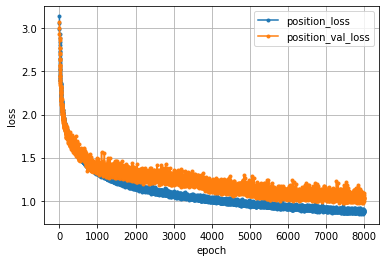

In [11]:
# 学習経過の可視化(位置)
position_loss     = position_history.history['loss']
position_val_loss = position_history.history['val_loss']

nb_epoch = len(position_loss)
plt.plot(range(nb_epoch), position_loss,     marker='.', label='position_loss')
plt.plot(range(nb_epoch), position_val_loss, marker='.', label='position_val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [12]:
# 学習(位置)
epochs = 15000
batch_size = 128
position_history = position_model.fit(position_x_train, position_y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(position_x_test, position_y_test))

Train on 8108 samples, validate on 2027 samples
Epoch 1/15000
8108/8108 [==============================] - 0s 47us/step - loss: 3.1539 - accuracy: 0.0767 - val_loss: 3.0914 - val_accuracy: 0.0937
Epoch 2/15000
8108/8108 [==============================] - 0s 31us/step - loss: 3.0589 - accuracy: 0.1099 - val_loss: 3.0230 - val_accuracy: 0.1095
Epoch 3/15000
8108/8108 [==============================] - 0s 30us/step - loss: 2.9958 - accuracy: 0.1279 - val_loss: 2.9539 - val_accuracy: 0.1766
Epoch 4/15000
8108/8108 [==============================] - 0s 33us/step - loss: 2.9371 - accuracy: 0.1480 - val_loss: 2.9099 - val_accuracy: 0.1426
Epoch 5/15000
8108/8108 [==============================] - 0s 29us/step - loss: 2.8821 - accuracy: 0.1591 - val_loss: 2.8652 - val_accuracy: 0.1465
Epoch 6/15000
8108/8108 [==============================] - 0s 29us/step - loss: 2.8453 - accuracy: 0.1681 - val_loss: 2.8358 - val_accuracy: 0.1593
Epoch 7/15000
8108/8108 [==============================] - 0s 30

Epoch 56/15000
8108/8108 [==============================] - 0s 38us/step - loss: 2.1712 - accuracy: 0.3481 - val_loss: 2.1459 - val_accuracy: 0.3448
Epoch 57/15000
8108/8108 [==============================] - 0s 33us/step - loss: 2.1397 - accuracy: 0.3605 - val_loss: 2.1573 - val_accuracy: 0.3547
Epoch 58/15000
8108/8108 [==============================] - 0s 30us/step - loss: 2.1407 - accuracy: 0.3558 - val_loss: 2.1251 - val_accuracy: 0.3794
Epoch 59/15000
8108/8108 [==============================] - 0s 30us/step - loss: 2.1267 - accuracy: 0.3663 - val_loss: 2.1295 - val_accuracy: 0.3434
Epoch 60/15000
8108/8108 [==============================] - 0s 30us/step - loss: 2.1201 - accuracy: 0.3583 - val_loss: 2.1227 - val_accuracy: 0.4045
Epoch 61/15000
8108/8108 [==============================] - 0s 31us/step - loss: 2.1126 - accuracy: 0.3678 - val_loss: 2.1146 - val_accuracy: 0.3715
Epoch 62/15000
8108/8108 [==============================] - 0s 31us/step - loss: 2.1087 - accuracy: 0.3711

Epoch 111/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.9385 - accuracy: 0.3883 - val_loss: 1.9129 - val_accuracy: 0.4435
Epoch 112/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.9158 - accuracy: 0.4121 - val_loss: 1.9289 - val_accuracy: 0.3897
Epoch 113/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.9044 - accuracy: 0.4077 - val_loss: 1.9699 - val_accuracy: 0.3868
Epoch 114/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.9230 - accuracy: 0.4119 - val_loss: 1.9194 - val_accuracy: 0.3814
Epoch 115/15000
8108/8108 [==============================] - 0s 38us/step - loss: 1.9117 - accuracy: 0.3974 - val_loss: 1.9465 - val_accuracy: 0.3932
Epoch 116/15000
8108/8108 [==============================] - 0s 34us/step - loss: 1.9019 - accuracy: 0.4056 - val_loss: 1.9077 - val_accuracy: 0.4050
Epoch 117/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.9167 - accuracy:

Epoch 220/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.7225 - accuracy: 0.4430 - val_loss: 1.7339 - val_accuracy: 0.4593
Epoch 221/15000
8108/8108 [==============================] - 0s 28us/step - loss: 1.7117 - accuracy: 0.4497 - val_loss: 1.7271 - val_accuracy: 0.4716
Epoch 222/15000
8108/8108 [==============================] - 0s 28us/step - loss: 1.6969 - accuracy: 0.4571 - val_loss: 1.7482 - val_accuracy: 0.4223
Epoch 223/15000
8108/8108 [==============================] - 0s 28us/step - loss: 1.7164 - accuracy: 0.4499 - val_loss: 1.6997 - val_accuracy: 0.4623
Epoch 224/15000
8108/8108 [==============================] - 0s 32us/step - loss: 1.7027 - accuracy: 0.4486 - val_loss: 1.7778 - val_accuracy: 0.4499
Epoch 225/15000
8108/8108 [==============================] - 0s 34us/step - loss: 1.7177 - accuracy: 0.4404 - val_loss: 1.7233 - val_accuracy: 0.4258
Epoch 226/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.7346 - accuracy:

Epoch 329/15000
8108/8108 [==============================] - 0s 28us/step - loss: 1.5929 - accuracy: 0.4778 - val_loss: 1.6336 - val_accuracy: 0.4889
Epoch 330/15000
8108/8108 [==============================] - 0s 28us/step - loss: 1.6023 - accuracy: 0.4759 - val_loss: 1.6089 - val_accuracy: 0.4859
Epoch 331/15000
8108/8108 [==============================] - 0s 28us/step - loss: 1.6080 - accuracy: 0.4716 - val_loss: 1.6479 - val_accuracy: 0.4435
Epoch 332/15000
8108/8108 [==============================] - 0s 28us/step - loss: 1.6032 - accuracy: 0.4650 - val_loss: 1.6291 - val_accuracy: 0.4938
Epoch 333/15000
8108/8108 [==============================] - 0s 28us/step - loss: 1.5958 - accuracy: 0.4756 - val_loss: 1.6146 - val_accuracy: 0.4544
Epoch 334/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.5841 - accuracy: 0.4821 - val_loss: 1.6838 - val_accuracy: 0.4440
Epoch 335/15000
8108/8108 [==============================] - 0s 28us/step - loss: 1.6065 - accuracy:

Epoch 438/15000
8108/8108 [==============================] - 0s 28us/step - loss: 1.5134 - accuracy: 0.4911 - val_loss: 1.5292 - val_accuracy: 0.5017
Epoch 439/15000
8108/8108 [==============================] - 0s 28us/step - loss: 1.5056 - accuracy: 0.4983 - val_loss: 1.5953 - val_accuracy: 0.4652
Epoch 440/15000
8108/8108 [==============================] - 0s 28us/step - loss: 1.5175 - accuracy: 0.4961 - val_loss: 1.5783 - val_accuracy: 0.4637
Epoch 441/15000
8108/8108 [==============================] - 0s 28us/step - loss: 1.5172 - accuracy: 0.4868 - val_loss: 1.5328 - val_accuracy: 0.4790
Epoch 442/15000
8108/8108 [==============================] - 0s 28us/step - loss: 1.5064 - accuracy: 0.4999 - val_loss: 1.5327 - val_accuracy: 0.5002
Epoch 443/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.5331 - accuracy: 0.4800 - val_loss: 1.5240 - val_accuracy: 0.5091
Epoch 444/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.5221 - accuracy:

Epoch 547/15000
8108/8108 [==============================] - 0s 28us/step - loss: 1.4607 - accuracy: 0.5005 - val_loss: 1.4304 - val_accuracy: 0.5170
Epoch 548/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.4359 - accuracy: 0.5095 - val_loss: 1.4926 - val_accuracy: 0.4761
Epoch 549/15000
8108/8108 [==============================] - 0s 28us/step - loss: 1.4556 - accuracy: 0.5096 - val_loss: 1.4453 - val_accuracy: 0.5091
Epoch 550/15000
8108/8108 [==============================] - 0s 28us/step - loss: 1.4479 - accuracy: 0.4980 - val_loss: 1.4464 - val_accuracy: 0.5323
Epoch 551/15000
8108/8108 [==============================] - 0s 27us/step - loss: 1.4748 - accuracy: 0.4964 - val_loss: 1.4879 - val_accuracy: 0.4948
Epoch 552/15000
8108/8108 [==============================] - 0s 28us/step - loss: 1.4446 - accuracy: 0.5117 - val_loss: 1.4791 - val_accuracy: 0.4973
Epoch 553/15000
8108/8108 [==============================] - 0s 28us/step - loss: 1.4793 - accuracy:

Epoch 656/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.4273 - accuracy: 0.5109 - val_loss: 1.4257 - val_accuracy: 0.5520
Epoch 657/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.4167 - accuracy: 0.5168 - val_loss: 1.4769 - val_accuracy: 0.4993
Epoch 658/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.4268 - accuracy: 0.5072 - val_loss: 1.4348 - val_accuracy: 0.5086
Epoch 659/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.4290 - accuracy: 0.4991 - val_loss: 1.4502 - val_accuracy: 0.4928
Epoch 660/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.4159 - accuracy: 0.5162 - val_loss: 1.4135 - val_accuracy: 0.5047
Epoch 661/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.4314 - accuracy: 0.5038 - val_loss: 1.4528 - val_accuracy: 0.5190
Epoch 662/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3982 - accuracy:

Epoch 765/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3731 - accuracy: 0.5263 - val_loss: 1.3853 - val_accuracy: 0.5076
Epoch 766/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.3675 - accuracy: 0.5324 - val_loss: 1.3667 - val_accuracy: 0.5027
Epoch 767/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3537 - accuracy: 0.5311 - val_loss: 1.5020 - val_accuracy: 0.4489
Epoch 768/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3724 - accuracy: 0.5284 - val_loss: 1.5716 - val_accuracy: 0.4810
Epoch 769/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3737 - accuracy: 0.5231 - val_loss: 1.4613 - val_accuracy: 0.5076
Epoch 770/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3640 - accuracy: 0.5312 - val_loss: 1.3976 - val_accuracy: 0.5392
Epoch 771/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.3662 - accuracy:

Epoch 874/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3524 - accuracy: 0.5212 - val_loss: 1.4182 - val_accuracy: 0.5086
Epoch 875/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.3278 - accuracy: 0.5417 - val_loss: 1.3205 - val_accuracy: 0.6053
Epoch 876/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3322 - accuracy: 0.5334 - val_loss: 1.4147 - val_accuracy: 0.4840
Epoch 877/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3517 - accuracy: 0.5264 - val_loss: 1.3624 - val_accuracy: 0.5614
Epoch 878/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.3221 - accuracy: 0.5397 - val_loss: 1.4164 - val_accuracy: 0.5456
Epoch 879/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3452 - accuracy: 0.5369 - val_loss: 1.4808 - val_accuracy: 0.4830
Epoch 880/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.3268 - accuracy:

Epoch 983/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3112 - accuracy: 0.5345 - val_loss: 1.3480 - val_accuracy: 0.5170
Epoch 984/15000
8108/8108 [==============================] - 0s 28us/step - loss: 1.2819 - accuracy: 0.5565 - val_loss: 1.3481 - val_accuracy: 0.5303
Epoch 985/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2906 - accuracy: 0.5532 - val_loss: 1.3049 - val_accuracy: 0.5417
Epoch 986/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2934 - accuracy: 0.5493 - val_loss: 1.3048 - val_accuracy: 0.5427
Epoch 987/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.2939 - accuracy: 0.5432 - val_loss: 1.2950 - val_accuracy: 0.5338
Epoch 988/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.2876 - accuracy: 0.5442 - val_loss: 1.3081 - val_accuracy: 0.5545
Epoch 989/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3115 - accuracy:

8108/8108 [==============================] - 0s 31us/step - loss: 1.3017 - accuracy: 0.5459 - val_loss: 1.3076 - val_accuracy: 0.5377
Epoch 1092/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.2832 - accuracy: 0.5512 - val_loss: 1.2535 - val_accuracy: 0.5979
Epoch 1093/15000
8108/8108 [==============================] - 0s 33us/step - loss: 1.2796 - accuracy: 0.5553 - val_loss: 1.3396 - val_accuracy: 0.5520
Epoch 1094/15000
8108/8108 [==============================] - 0s 34us/step - loss: 1.2692 - accuracy: 0.5635 - val_loss: 1.2909 - val_accuracy: 0.5343
Epoch 1095/15000
8108/8108 [==============================] - 0s 33us/step - loss: 1.2723 - accuracy: 0.5546 - val_loss: 1.3099 - val_accuracy: 0.5392
Epoch 1096/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.2995 - accuracy: 0.5335 - val_loss: 1.3302 - val_accuracy: 0.5042
Epoch 1097/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.2870 - accuracy: 0.5442 - 

8108/8108 [==============================] - 0s 30us/step - loss: 1.2829 - accuracy: 0.5487 - val_loss: 1.3214 - val_accuracy: 0.5284
Epoch 1200/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2527 - accuracy: 0.5613 - val_loss: 1.2975 - val_accuracy: 0.5437
Epoch 1201/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2793 - accuracy: 0.5487 - val_loss: 1.2926 - val_accuracy: 0.5604
Epoch 1202/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2629 - accuracy: 0.5545 - val_loss: 1.2884 - val_accuracy: 0.5580
Epoch 1203/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2783 - accuracy: 0.5482 - val_loss: 1.2418 - val_accuracy: 0.5816
Epoch 1204/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.2688 - accuracy: 0.5549 - val_loss: 1.3055 - val_accuracy: 0.5224
Epoch 1205/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.2800 - accuracy: 0.5406 - 

8108/8108 [==============================] - 0s 30us/step - loss: 1.2277 - accuracy: 0.5639 - val_loss: 1.2845 - val_accuracy: 0.5407
Epoch 1308/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.2666 - accuracy: 0.5469 - val_loss: 1.2169 - val_accuracy: 0.5733
Epoch 1309/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2441 - accuracy: 0.5544 - val_loss: 1.2595 - val_accuracy: 0.5693
Epoch 1310/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.2496 - accuracy: 0.5555 - val_loss: 1.3120 - val_accuracy: 0.5432
Epoch 1311/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.2703 - accuracy: 0.5546 - val_loss: 1.3256 - val_accuracy: 0.5072
Epoch 1312/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2302 - accuracy: 0.5650 - val_loss: 1.2602 - val_accuracy: 0.5446
Epoch 1313/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2293 - accuracy: 0.5638 - 

8108/8108 [==============================] - 0s 31us/step - loss: 1.2114 - accuracy: 0.5577 - val_loss: 1.2174 - val_accuracy: 0.5594
Epoch 1416/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.2402 - accuracy: 0.5523 - val_loss: 1.2350 - val_accuracy: 0.5550
Epoch 1417/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2370 - accuracy: 0.5652 - val_loss: 1.2490 - val_accuracy: 0.5476
Epoch 1418/15000
8108/8108 [==============================] - 0s 32us/step - loss: 1.2095 - accuracy: 0.5707 - val_loss: 1.2215 - val_accuracy: 0.5639
Epoch 1419/15000
8108/8108 [==============================] - 0s 32us/step - loss: 1.2062 - accuracy: 0.5788 - val_loss: 1.2098 - val_accuracy: 0.6093
Epoch 1420/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2205 - accuracy: 0.5702 - val_loss: 1.2518 - val_accuracy: 0.5491
Epoch 1421/15000
8108/8108 [==============================] - 0s 32us/step - loss: 1.2320 - accuracy: 0.5678 - 

8108/8108 [==============================] - 0s 31us/step - loss: 1.2125 - accuracy: 0.5720 - val_loss: 1.2127 - val_accuracy: 0.5752
Epoch 1524/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1929 - accuracy: 0.5768 - val_loss: 1.2150 - val_accuracy: 0.5624
Epoch 1525/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.1909 - accuracy: 0.5836 - val_loss: 1.2566 - val_accuracy: 0.5407
Epoch 1526/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.1997 - accuracy: 0.5744 - val_loss: 1.2241 - val_accuracy: 0.5856
Epoch 1527/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.2022 - accuracy: 0.5741 - val_loss: 1.1855 - val_accuracy: 0.6009
Epoch 1528/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2058 - accuracy: 0.5741 - val_loss: 1.2660 - val_accuracy: 0.5437
Epoch 1529/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2145 - accuracy: 0.5619 - 

8108/8108 [==============================] - 0s 29us/step - loss: 1.1954 - accuracy: 0.5713 - val_loss: 1.2108 - val_accuracy: 0.5654
Epoch 1632/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2045 - accuracy: 0.5726 - val_loss: 1.2191 - val_accuracy: 0.5525
Epoch 1633/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1927 - accuracy: 0.5794 - val_loss: 1.1973 - val_accuracy: 0.5639
Epoch 1634/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.1825 - accuracy: 0.5889 - val_loss: 1.2305 - val_accuracy: 0.5442
Epoch 1635/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2102 - accuracy: 0.5703 - val_loss: 1.1991 - val_accuracy: 0.5560
Epoch 1636/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1819 - accuracy: 0.5767 - val_loss: 1.2972 - val_accuracy: 0.5333
Epoch 1637/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2153 - accuracy: 0.5680 - 

8108/8108 [==============================] - 0s 30us/step - loss: 1.1687 - accuracy: 0.5847 - val_loss: 1.1712 - val_accuracy: 0.5964
Epoch 1740/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1810 - accuracy: 0.5857 - val_loss: 1.1604 - val_accuracy: 0.5826
Epoch 1741/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.2021 - accuracy: 0.5692 - val_loss: 1.1567 - val_accuracy: 0.5955
Epoch 1742/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.2049 - accuracy: 0.5710 - val_loss: 1.1975 - val_accuracy: 0.5506
Epoch 1743/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1809 - accuracy: 0.5736 - val_loss: 1.1813 - val_accuracy: 0.5723
Epoch 1744/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1638 - accuracy: 0.5839 - val_loss: 1.1767 - val_accuracy: 0.5812
Epoch 1745/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1573 - accuracy: 0.5762 - 

8108/8108 [==============================] - 0s 30us/step - loss: 1.1578 - accuracy: 0.5920 - val_loss: 1.2370 - val_accuracy: 0.5511
Epoch 1848/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.1642 - accuracy: 0.5786 - val_loss: 1.1457 - val_accuracy: 0.6009
Epoch 1849/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1643 - accuracy: 0.5831 - val_loss: 1.2234 - val_accuracy: 0.5279
Epoch 1850/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.1663 - accuracy: 0.5752 - val_loss: 1.1532 - val_accuracy: 0.6068
Epoch 1851/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1627 - accuracy: 0.5839 - val_loss: 1.1490 - val_accuracy: 0.6108
Epoch 1852/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1581 - accuracy: 0.5860 - val_loss: 1.2063 - val_accuracy: 0.5456
Epoch 1853/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.1569 - accuracy: 0.5881 - 

8108/8108 [==============================] - 0s 42us/step - loss: 1.1445 - accuracy: 0.5858 - val_loss: 1.2467 - val_accuracy: 0.5703
Epoch 1956/15000
8108/8108 [==============================] - 0s 32us/step - loss: 1.1676 - accuracy: 0.5768 - val_loss: 1.1677 - val_accuracy: 0.6009
Epoch 1957/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1321 - accuracy: 0.5989 - val_loss: 1.1597 - val_accuracy: 0.5782
Epoch 1958/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1442 - accuracy: 0.5978 - val_loss: 1.1609 - val_accuracy: 0.5881
Epoch 1959/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1480 - accuracy: 0.5940 - val_loss: 1.1430 - val_accuracy: 0.5964
Epoch 1960/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1444 - accuracy: 0.5900 - val_loss: 1.1883 - val_accuracy: 0.5945
Epoch 1961/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1644 - accuracy: 0.5749 - 

8108/8108 [==============================] - 0s 41us/step - loss: 1.1619 - accuracy: 0.5883 - val_loss: 1.1266 - val_accuracy: 0.6122
Epoch 2064/15000
8108/8108 [==============================] - 0s 43us/step - loss: 1.1399 - accuracy: 0.5914 - val_loss: 1.1725 - val_accuracy: 0.5639
Epoch 2065/15000
8108/8108 [==============================] - 0s 43us/step - loss: 1.1323 - accuracy: 0.5940 - val_loss: 1.1686 - val_accuracy: 0.5797
Epoch 2066/15000
8108/8108 [==============================] - 0s 45us/step - loss: 1.1549 - accuracy: 0.5849 - val_loss: 1.2408 - val_accuracy: 0.5728
Epoch 2067/15000
8108/8108 [==============================] - 0s 34us/step - loss: 1.1577 - accuracy: 0.5819 - val_loss: 1.1524 - val_accuracy: 0.5826
Epoch 2068/15000
8108/8108 [==============================] - 0s 32us/step - loss: 1.1436 - accuracy: 0.5947 - val_loss: 1.1559 - val_accuracy: 0.5802
Epoch 2069/15000
8108/8108 [==============================] - 0s 34us/step - loss: 1.1469 - accuracy: 0.5945 - 

8108/8108 [==============================] - 0s 30us/step - loss: 1.1301 - accuracy: 0.6005 - val_loss: 1.1834 - val_accuracy: 0.5466
Epoch 2172/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1227 - accuracy: 0.5958 - val_loss: 1.1777 - val_accuracy: 0.5678
Epoch 2173/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1252 - accuracy: 0.5977 - val_loss: 1.1636 - val_accuracy: 0.5851
Epoch 2174/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.1417 - accuracy: 0.5877 - val_loss: 1.1224 - val_accuracy: 0.6103
Epoch 2175/15000
8108/8108 [==============================] - 0s 34us/step - loss: 1.1329 - accuracy: 0.5982 - val_loss: 1.1382 - val_accuracy: 0.6260
Epoch 2176/15000
8108/8108 [==============================] - 0s 33us/step - loss: 1.1357 - accuracy: 0.5995 - val_loss: 1.1123 - val_accuracy: 0.6290
Epoch 2177/15000
8108/8108 [==============================] - 0s 32us/step - loss: 1.1211 - accuracy: 0.5992 - 

8108/8108 [==============================] - 0s 31us/step - loss: 1.1322 - accuracy: 0.5836 - val_loss: 1.1566 - val_accuracy: 0.5713
Epoch 2280/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.1199 - accuracy: 0.5944 - val_loss: 1.1115 - val_accuracy: 0.6083
Epoch 2281/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0998 - accuracy: 0.5961 - val_loss: 1.0956 - val_accuracy: 0.6043
Epoch 2282/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1153 - accuracy: 0.5955 - val_loss: 1.1465 - val_accuracy: 0.5856
Epoch 2283/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1222 - accuracy: 0.6027 - val_loss: 1.1157 - val_accuracy: 0.6108
Epoch 2284/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.1492 - accuracy: 0.5863 - val_loss: 1.1266 - val_accuracy: 0.6206
Epoch 2285/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1210 - accuracy: 0.5981 - 

8108/8108 [==============================] - 0s 29us/step - loss: 1.1021 - accuracy: 0.6046 - val_loss: 1.1235 - val_accuracy: 0.5979
Epoch 2388/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1282 - accuracy: 0.5903 - val_loss: 1.1100 - val_accuracy: 0.6103
Epoch 2389/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1201 - accuracy: 0.5958 - val_loss: 1.1303 - val_accuracy: 0.6201
Epoch 2390/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1012 - accuracy: 0.6062 - val_loss: 1.1187 - val_accuracy: 0.6038
Epoch 2391/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1113 - accuracy: 0.5968 - val_loss: 1.1122 - val_accuracy: 0.5905
Epoch 2392/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1315 - accuracy: 0.5908 - val_loss: 1.1561 - val_accuracy: 0.5787
Epoch 2393/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1229 - accuracy: 0.5976 - 

8108/8108 [==============================] - 0s 30us/step - loss: 1.1050 - accuracy: 0.6004 - val_loss: 1.0823 - val_accuracy: 0.5890
Epoch 2496/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0980 - accuracy: 0.6071 - val_loss: 1.0956 - val_accuracy: 0.5969
Epoch 2497/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1193 - accuracy: 0.5992 - val_loss: 1.0957 - val_accuracy: 0.5895
Epoch 2498/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1050 - accuracy: 0.6018 - val_loss: 1.0986 - val_accuracy: 0.6093
Epoch 2499/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1078 - accuracy: 0.5961 - val_loss: 1.1476 - val_accuracy: 0.5629
Epoch 2500/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1288 - accuracy: 0.6008 - val_loss: 1.0571 - val_accuracy: 0.6433
Epoch 2501/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1194 - accuracy: 0.5946 - 

8108/8108 [==============================] - 0s 30us/step - loss: 1.0952 - accuracy: 0.6019 - val_loss: 1.1173 - val_accuracy: 0.5846
Epoch 2604/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0938 - accuracy: 0.6051 - val_loss: 1.0587 - val_accuracy: 0.6285
Epoch 2605/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1020 - accuracy: 0.5909 - val_loss: 1.1089 - val_accuracy: 0.5654
Epoch 2606/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0776 - accuracy: 0.6100 - val_loss: 1.1337 - val_accuracy: 0.5940
Epoch 2607/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1470 - accuracy: 0.5798 - val_loss: 1.1772 - val_accuracy: 0.5831
Epoch 2608/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1023 - accuracy: 0.6056 - val_loss: 1.1189 - val_accuracy: 0.5841
Epoch 2609/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.1150 - accuracy: 0.5966 - 

8108/8108 [==============================] - 0s 30us/step - loss: 1.0597 - accuracy: 0.6163 - val_loss: 1.0539 - val_accuracy: 0.6241
Epoch 2712/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0916 - accuracy: 0.5940 - val_loss: 1.1030 - val_accuracy: 0.5802
Epoch 2713/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0774 - accuracy: 0.6015 - val_loss: 1.0976 - val_accuracy: 0.6221
Epoch 2714/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0836 - accuracy: 0.6062 - val_loss: 1.1000 - val_accuracy: 0.5979
Epoch 2715/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0799 - accuracy: 0.6021 - val_loss: 1.1654 - val_accuracy: 0.5609
Epoch 2716/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1043 - accuracy: 0.5977 - val_loss: 1.1723 - val_accuracy: 0.5782
Epoch 2717/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0858 - accuracy: 0.6024 - 

8108/8108 [==============================] - 0s 30us/step - loss: 1.0702 - accuracy: 0.6127 - val_loss: 1.1429 - val_accuracy: 0.5866
Epoch 2820/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0603 - accuracy: 0.6173 - val_loss: 1.0997 - val_accuracy: 0.5960
Epoch 2821/15000
8108/8108 [==============================] - 0s 40us/step - loss: 1.0951 - accuracy: 0.6014 - val_loss: 1.1751 - val_accuracy: 0.5777
Epoch 2822/15000
8108/8108 [==============================] - 0s 28us/step - loss: 1.0652 - accuracy: 0.6114 - val_loss: 1.0473 - val_accuracy: 0.6399
Epoch 2823/15000
8108/8108 [==============================] - 0s 28us/step - loss: 1.0683 - accuracy: 0.6096 - val_loss: 1.0546 - val_accuracy: 0.6265
Epoch 2824/15000
8108/8108 [==============================] - 0s 28us/step - loss: 1.0967 - accuracy: 0.5958 - val_loss: 1.1169 - val_accuracy: 0.5757
Epoch 2825/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0700 - accuracy: 0.6129 - 

8108/8108 [==============================] - 0s 50us/step - loss: 1.0708 - accuracy: 0.6161 - val_loss: 1.0522 - val_accuracy: 0.6320
Epoch 2928/15000
8108/8108 [==============================] - 0s 44us/step - loss: 1.0587 - accuracy: 0.6219 - val_loss: 1.0763 - val_accuracy: 0.6147
Epoch 2929/15000
8108/8108 [==============================] - 0s 44us/step - loss: 1.0707 - accuracy: 0.6137 - val_loss: 1.1230 - val_accuracy: 0.6108
Epoch 2930/15000
8108/8108 [==============================] - 0s 48us/step - loss: 1.0855 - accuracy: 0.6099 - val_loss: 1.0501 - val_accuracy: 0.6256
Epoch 2931/15000
8108/8108 [==============================] - 0s 39us/step - loss: 1.0700 - accuracy: 0.6184 - val_loss: 1.0697 - val_accuracy: 0.6083
Epoch 2932/15000
8108/8108 [==============================] - 0s 41us/step - loss: 1.0686 - accuracy: 0.6124 - val_loss: 1.0531 - val_accuracy: 0.6290
Epoch 2933/15000
8108/8108 [==============================] - 0s 37us/step - loss: 1.0666 - accuracy: 0.6133 - 

8108/8108 [==============================] - 0s 31us/step - loss: 1.0661 - accuracy: 0.6075 - val_loss: 1.1238 - val_accuracy: 0.6043
Epoch 3036/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0760 - accuracy: 0.6056 - val_loss: 1.1228 - val_accuracy: 0.5777
Epoch 3037/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0735 - accuracy: 0.6011 - val_loss: 1.0500 - val_accuracy: 0.6093
Epoch 3038/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0707 - accuracy: 0.6061 - val_loss: 1.1286 - val_accuracy: 0.5693
Epoch 3039/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0695 - accuracy: 0.6141 - val_loss: 1.0818 - val_accuracy: 0.6078
Epoch 3040/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0668 - accuracy: 0.6129 - val_loss: 1.0510 - val_accuracy: 0.6196
Epoch 3041/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0498 - accuracy: 0.6254 - 

8108/8108 [==============================] - 0s 31us/step - loss: 1.0726 - accuracy: 0.6101 - val_loss: 1.0693 - val_accuracy: 0.6053
Epoch 3144/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0555 - accuracy: 0.6183 - val_loss: 1.0522 - val_accuracy: 0.6325
Epoch 3145/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0403 - accuracy: 0.6322 - val_loss: 1.0583 - val_accuracy: 0.6167
Epoch 3146/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0500 - accuracy: 0.6183 - val_loss: 1.0649 - val_accuracy: 0.6019
Epoch 3147/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0464 - accuracy: 0.6163 - val_loss: 1.0554 - val_accuracy: 0.6295
Epoch 3148/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0506 - accuracy: 0.6182 - val_loss: 1.0552 - val_accuracy: 0.6216
Epoch 3149/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0453 - accuracy: 0.6242 - 

8108/8108 [==============================] - 0s 30us/step - loss: 1.0619 - accuracy: 0.6193 - val_loss: 1.0935 - val_accuracy: 0.6034
Epoch 3252/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0462 - accuracy: 0.6206 - val_loss: 1.0772 - val_accuracy: 0.6038
Epoch 3253/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0578 - accuracy: 0.6222 - val_loss: 1.0801 - val_accuracy: 0.5895
Epoch 3254/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0347 - accuracy: 0.6246 - val_loss: 0.9985 - val_accuracy: 0.6640
Epoch 3255/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0340 - accuracy: 0.6240 - val_loss: 1.0834 - val_accuracy: 0.5787
Epoch 3256/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0496 - accuracy: 0.6145 - val_loss: 1.0958 - val_accuracy: 0.5733
Epoch 3257/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0457 - accuracy: 0.6232 - 

8108/8108 [==============================] - 0s 29us/step - loss: 1.0384 - accuracy: 0.6237 - val_loss: 1.0133 - val_accuracy: 0.6413
Epoch 3360/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0419 - accuracy: 0.6226 - val_loss: 1.1135 - val_accuracy: 0.5698
Epoch 3361/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0447 - accuracy: 0.6195 - val_loss: 1.0234 - val_accuracy: 0.6339
Epoch 3362/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0287 - accuracy: 0.6277 - val_loss: 1.0318 - val_accuracy: 0.6404
Epoch 3363/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0353 - accuracy: 0.6222 - val_loss: 1.0625 - val_accuracy: 0.5974
Epoch 3364/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0639 - accuracy: 0.6077 - val_loss: 1.0653 - val_accuracy: 0.6132
Epoch 3365/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0316 - accuracy: 0.6296 - 

8108/8108 [==============================] - 0s 33us/step - loss: 1.0203 - accuracy: 0.6354 - val_loss: 1.0154 - val_accuracy: 0.6443
Epoch 3468/15000
8108/8108 [==============================] - 0s 35us/step - loss: 1.0368 - accuracy: 0.6180 - val_loss: 1.0711 - val_accuracy: 0.6325
Epoch 3469/15000
8108/8108 [==============================] - 0s 38us/step - loss: 1.0443 - accuracy: 0.6182 - val_loss: 1.0337 - val_accuracy: 0.6211
Epoch 3470/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0241 - accuracy: 0.6304 - val_loss: 1.0792 - val_accuracy: 0.6305
Epoch 3471/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0498 - accuracy: 0.6225 - val_loss: 1.0821 - val_accuracy: 0.6112
Epoch 3472/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0464 - accuracy: 0.6136 - val_loss: 1.0332 - val_accuracy: 0.6320
Epoch 3473/15000
8108/8108 [==============================] - 0s 34us/step - loss: 1.0163 - accuracy: 0.6334 - 

8108/8108 [==============================] - 0s 30us/step - loss: 1.0291 - accuracy: 0.6314 - val_loss: 1.0278 - val_accuracy: 0.6369
Epoch 3576/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0398 - accuracy: 0.6233 - val_loss: 1.0305 - val_accuracy: 0.6034
Epoch 3577/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0317 - accuracy: 0.6170 - val_loss: 1.0537 - val_accuracy: 0.6162
Epoch 3578/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0315 - accuracy: 0.6228 - val_loss: 1.0495 - val_accuracy: 0.6053
Epoch 3579/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0393 - accuracy: 0.6153 - val_loss: 1.0676 - val_accuracy: 0.5881
Epoch 3580/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0379 - accuracy: 0.6184 - val_loss: 1.0558 - val_accuracy: 0.6517
Epoch 3581/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0290 - accuracy: 0.6268 - 

8108/8108 [==============================] - 0s 30us/step - loss: 1.0424 - accuracy: 0.6210 - val_loss: 1.0274 - val_accuracy: 0.6201
Epoch 3684/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0382 - accuracy: 0.6162 - val_loss: 1.0114 - val_accuracy: 0.6418
Epoch 3685/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0076 - accuracy: 0.6400 - val_loss: 1.0055 - val_accuracy: 0.6448
Epoch 3686/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0310 - accuracy: 0.6180 - val_loss: 1.0436 - val_accuracy: 0.6300
Epoch 3687/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0210 - accuracy: 0.6312 - val_loss: 1.0248 - val_accuracy: 0.6260
Epoch 3688/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0127 - accuracy: 0.6375 - val_loss: 0.9952 - val_accuracy: 0.6487
Epoch 3689/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0324 - accuracy: 0.6221 - 

8108/8108 [==============================] - 0s 30us/step - loss: 1.0452 - accuracy: 0.6122 - val_loss: 1.0200 - val_accuracy: 0.6251
Epoch 3792/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0339 - accuracy: 0.6238 - val_loss: 1.0396 - val_accuracy: 0.6295
Epoch 3793/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0312 - accuracy: 0.6242 - val_loss: 0.9916 - val_accuracy: 0.6714
Epoch 3794/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0101 - accuracy: 0.6339 - val_loss: 1.0595 - val_accuracy: 0.5999
Epoch 3795/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0187 - accuracy: 0.6311 - val_loss: 1.0182 - val_accuracy: 0.6374
Epoch 3796/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0117 - accuracy: 0.6311 - val_loss: 1.0418 - val_accuracy: 0.5964
Epoch 3797/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0071 - accuracy: 0.6355 - 

8108/8108 [==============================] - 0s 30us/step - loss: 1.0073 - accuracy: 0.6327 - val_loss: 1.0292 - val_accuracy: 0.6191
Epoch 3900/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0305 - accuracy: 0.6198 - val_loss: 1.0435 - val_accuracy: 0.6221
Epoch 3901/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0235 - accuracy: 0.6279 - val_loss: 1.0425 - val_accuracy: 0.6048
Epoch 3902/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0232 - accuracy: 0.6243 - val_loss: 1.0334 - val_accuracy: 0.6251
Epoch 3903/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0423 - accuracy: 0.6130 - val_loss: 1.0887 - val_accuracy: 0.6009
Epoch 3904/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0105 - accuracy: 0.6365 - val_loss: 1.0385 - val_accuracy: 0.6073
Epoch 3905/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0123 - accuracy: 0.6320 - 

8108/8108 [==============================] - 0s 35us/step - loss: 1.0248 - accuracy: 0.6214 - val_loss: 1.0588 - val_accuracy: 0.5895
Epoch 4008/15000
8108/8108 [==============================] - 0s 34us/step - loss: 1.0160 - accuracy: 0.6286 - val_loss: 1.0082 - val_accuracy: 0.6803
Epoch 4009/15000
8108/8108 [==============================] - 0s 33us/step - loss: 1.0371 - accuracy: 0.6168 - val_loss: 1.0502 - val_accuracy: 0.6285
Epoch 4010/15000
8108/8108 [==============================] - 0s 32us/step - loss: 1.0110 - accuracy: 0.6300 - val_loss: 1.0453 - val_accuracy: 0.5999
Epoch 4011/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0066 - accuracy: 0.6300 - val_loss: 1.1012 - val_accuracy: 0.6004
Epoch 4012/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0164 - accuracy: 0.6291 - val_loss: 1.0144 - val_accuracy: 0.6221
Epoch 4013/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9930 - accuracy: 0.6359 - 

8108/8108 [==============================] - 0s 29us/step - loss: 1.0345 - accuracy: 0.6200 - val_loss: 0.9937 - val_accuracy: 0.6571
Epoch 4116/15000
8108/8108 [==============================] - 0s 28us/step - loss: 1.0093 - accuracy: 0.6312 - val_loss: 1.0494 - val_accuracy: 0.6241
Epoch 4117/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0164 - accuracy: 0.6317 - val_loss: 1.0514 - val_accuracy: 0.6468
Epoch 4118/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0078 - accuracy: 0.6318 - val_loss: 0.9940 - val_accuracy: 0.6714
Epoch 4119/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9874 - accuracy: 0.6438 - val_loss: 1.0427 - val_accuracy: 0.6127
Epoch 4120/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0122 - accuracy: 0.6304 - val_loss: 1.0522 - val_accuracy: 0.6334
Epoch 4121/15000
8108/8108 [==============================] - 0s 28us/step - loss: 1.0145 - accuracy: 0.6323 - 

8108/8108 [==============================] - 0s 28us/step - loss: 1.0085 - accuracy: 0.6232 - val_loss: 1.0435 - val_accuracy: 0.6270
Epoch 4224/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9926 - accuracy: 0.6369 - val_loss: 0.9822 - val_accuracy: 0.6502
Epoch 4225/15000
8108/8108 [==============================] - 0s 28us/step - loss: 1.0146 - accuracy: 0.6272 - val_loss: 1.0332 - val_accuracy: 0.6083
Epoch 4226/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0246 - accuracy: 0.6237 - val_loss: 1.1160 - val_accuracy: 0.5886
Epoch 4227/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9984 - accuracy: 0.6396 - val_loss: 1.0490 - val_accuracy: 0.6137
Epoch 4228/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0202 - accuracy: 0.6270 - val_loss: 1.0136 - val_accuracy: 0.6448
Epoch 4229/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9818 - accuracy: 0.6401 - 

8108/8108 [==============================] - 0s 30us/step - loss: 0.9849 - accuracy: 0.6452 - val_loss: 1.0659 - val_accuracy: 0.5935
Epoch 4332/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9992 - accuracy: 0.6367 - val_loss: 1.0141 - val_accuracy: 0.6359
Epoch 4333/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0077 - accuracy: 0.6353 - val_loss: 0.9925 - val_accuracy: 0.6315
Epoch 4334/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0002 - accuracy: 0.6341 - val_loss: 1.0237 - val_accuracy: 0.6147
Epoch 4335/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.9975 - accuracy: 0.6384 - val_loss: 1.0159 - val_accuracy: 0.6364
Epoch 4336/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.9925 - accuracy: 0.6426 - val_loss: 1.0476 - val_accuracy: 0.6206
Epoch 4337/15000
8108/8108 [==============================] - 0s 33us/step - loss: 1.0033 - accuracy: 0.6295 - 

8108/8108 [==============================] - 0s 29us/step - loss: 0.9998 - accuracy: 0.6368 - val_loss: 0.9836 - val_accuracy: 0.6478
Epoch 4440/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9825 - accuracy: 0.6394 - val_loss: 1.0105 - val_accuracy: 0.6468
Epoch 4441/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9946 - accuracy: 0.6312 - val_loss: 0.9946 - val_accuracy: 0.6497
Epoch 4442/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9786 - accuracy: 0.6452 - val_loss: 1.0408 - val_accuracy: 0.6098
Epoch 4443/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9898 - accuracy: 0.6331 - val_loss: 1.0122 - val_accuracy: 0.6206
Epoch 4444/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9801 - accuracy: 0.6400 - val_loss: 0.9969 - val_accuracy: 0.6127
Epoch 4445/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9919 - accuracy: 0.6425 - 

8108/8108 [==============================] - 0s 32us/step - loss: 0.9910 - accuracy: 0.6457 - val_loss: 1.0129 - val_accuracy: 0.6182
Epoch 4494/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.9774 - accuracy: 0.6436 - val_loss: 0.9999 - val_accuracy: 0.6379
Epoch 4495/15000
8108/8108 [==============================] - 0s 35us/step - loss: 1.0031 - accuracy: 0.6352 - val_loss: 1.0165 - val_accuracy: 0.6542
Epoch 4496/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.9899 - accuracy: 0.6396 - val_loss: 1.0342 - val_accuracy: 0.6098
Epoch 4497/15000
8108/8108 [==============================] - 0s 36us/step - loss: 0.9853 - accuracy: 0.6416 - val_loss: 0.9827 - val_accuracy: 0.6468
Epoch 4498/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.9671 - accuracy: 0.6506 - val_loss: 1.0081 - val_accuracy: 0.6334
Epoch 4499/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9855 - accuracy: 0.6399 - 

8108/8108 [==============================] - ETA: 0s - loss: 0.9553 - accuracy: 0.65 - 0s 32us/step - loss: 0.9637 - accuracy: 0.6496 - val_loss: 0.9913 - val_accuracy: 0.6448
Epoch 4602/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9828 - accuracy: 0.6459 - val_loss: 0.9989 - val_accuracy: 0.6320
Epoch 4603/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9631 - accuracy: 0.6513 - val_loss: 1.0384 - val_accuracy: 0.6073
Epoch 4604/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9854 - accuracy: 0.6450 - val_loss: 0.9811 - val_accuracy: 0.6320
Epoch 4605/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9819 - accuracy: 0.6454 - val_loss: 1.0026 - val_accuracy: 0.6675
Epoch 4606/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9819 - accuracy: 0.6384 - val_loss: 1.0171 - val_accuracy: 0.6241
Epoch 4607/15000
8108/8108 [==============================] - 0s 33us

8108/8108 [==============================] - 0s 36us/step - loss: 0.9609 - accuracy: 0.6443 - val_loss: 0.9765 - val_accuracy: 0.6581
Epoch 4656/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.9919 - accuracy: 0.6369 - val_loss: 1.0568 - val_accuracy: 0.5955
Epoch 4657/15000
8108/8108 [==============================] - 0s 37us/step - loss: 0.9849 - accuracy: 0.6381 - val_loss: 1.0644 - val_accuracy: 0.6108
Epoch 4658/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.9760 - accuracy: 0.6452 - val_loss: 0.9831 - val_accuracy: 0.6394
Epoch 4659/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.9736 - accuracy: 0.6496 - val_loss: 0.9673 - val_accuracy: 0.6482
Epoch 4660/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.9653 - accuracy: 0.6550 - val_loss: 1.0056 - val_accuracy: 0.6137
Epoch 4661/15000
8108/8108 [==============================] - 0s 36us/step - loss: 0.9811 - accuracy: 0.6364 - 

8108/8108 [==============================] - 0s 36us/step - loss: 0.9647 - accuracy: 0.6554 - val_loss: 1.0112 - val_accuracy: 0.6423
Epoch 4710/15000
8108/8108 [==============================] - 0s 37us/step - loss: 0.9594 - accuracy: 0.6580 - val_loss: 1.0175 - val_accuracy: 0.6404
Epoch 4711/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.9977 - accuracy: 0.6390 - val_loss: 1.0405 - val_accuracy: 0.6093
Epoch 4712/15000
8108/8108 [==============================] - 0s 36us/step - loss: 0.9983 - accuracy: 0.6201 - val_loss: 0.9867 - val_accuracy: 0.6399
Epoch 4713/15000
8108/8108 [==============================] - 0s 37us/step - loss: 0.9763 - accuracy: 0.6427 - val_loss: 0.9896 - val_accuracy: 0.6334
Epoch 4714/15000
8108/8108 [==============================] - 0s 38us/step - loss: 0.9986 - accuracy: 0.6331 - val_loss: 1.0062 - val_accuracy: 0.6265
Epoch 4715/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.9731 - accuracy: 0.6408 - 

8108/8108 [==============================] - 0s 37us/step - loss: 0.9915 - accuracy: 0.6305 - val_loss: 1.0217 - val_accuracy: 0.5969
Epoch 4818/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.9842 - accuracy: 0.6311 - val_loss: 0.9943 - val_accuracy: 0.6769
Epoch 4819/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.9617 - accuracy: 0.6555 - val_loss: 0.9810 - val_accuracy: 0.6660
Epoch 4820/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.9994 - accuracy: 0.6312 - val_loss: 1.0307 - val_accuracy: 0.6487
Epoch 4821/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.9819 - accuracy: 0.6392 - val_loss: 0.9994 - val_accuracy: 0.6334
Epoch 4822/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.9796 - accuracy: 0.6496 - val_loss: 1.0314 - val_accuracy: 0.6093
Epoch 4823/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.9833 - accuracy: 0.6395 - 

8108/8108 [==============================] - 0s 35us/step - loss: 0.9742 - accuracy: 0.6410 - val_loss: 1.0406 - val_accuracy: 0.6408
Epoch 4926/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.9511 - accuracy: 0.6617 - val_loss: 0.9879 - val_accuracy: 0.6547
Epoch 4927/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.9767 - accuracy: 0.6404 - val_loss: 1.0275 - val_accuracy: 0.6221
Epoch 4928/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.9765 - accuracy: 0.6397 - val_loss: 0.9627 - val_accuracy: 0.6724
Epoch 4929/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.9934 - accuracy: 0.6411 - val_loss: 0.9720 - val_accuracy: 0.6339
Epoch 4930/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.9678 - accuracy: 0.6443 - val_loss: 0.9668 - val_accuracy: 0.6561
Epoch 4931/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.9652 - accuracy: 0.6407 - 

8108/8108 [==============================] - 0s 34us/step - loss: 0.9585 - accuracy: 0.6482 - val_loss: 0.9660 - val_accuracy: 0.6438
Epoch 5034/15000
8108/8108 [==============================] - 0s 34us/step - loss: 1.0042 - accuracy: 0.6251 - val_loss: 0.9684 - val_accuracy: 0.6690
Epoch 5035/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.9684 - accuracy: 0.6544 - val_loss: 0.9871 - val_accuracy: 0.6310
Epoch 5036/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.9622 - accuracy: 0.6497 - val_loss: 1.0112 - val_accuracy: 0.6473
Epoch 5037/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.9592 - accuracy: 0.6500 - val_loss: 1.0039 - val_accuracy: 0.6216
Epoch 5038/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.9685 - accuracy: 0.6466 - val_loss: 0.9523 - val_accuracy: 0.6566
Epoch 5039/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.9675 - accuracy: 0.6482 - 

8108/8108 [==============================] - 0s 35us/step - loss: 0.9647 - accuracy: 0.6447 - val_loss: 0.9999 - val_accuracy: 0.6394
Epoch 5142/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.9494 - accuracy: 0.6553 - val_loss: 1.0745 - val_accuracy: 0.6275
Epoch 5143/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.9947 - accuracy: 0.6368 - val_loss: 0.9417 - val_accuracy: 0.6877
Epoch 5144/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.9908 - accuracy: 0.6417 - val_loss: 0.9420 - val_accuracy: 0.6690
Epoch 5145/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.9822 - accuracy: 0.6339 - val_loss: 1.0145 - val_accuracy: 0.6468
Epoch 5146/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.9615 - accuracy: 0.6503 - val_loss: 1.0195 - val_accuracy: 0.6310
Epoch 5147/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.9591 - accuracy: 0.6518 - 

8108/8108 [==============================] - 0s 40us/step - loss: 0.9441 - accuracy: 0.6575 - val_loss: 0.9843 - val_accuracy: 0.6645
Epoch 5250/15000
8108/8108 [==============================] - 0s 40us/step - loss: 0.9499 - accuracy: 0.6499 - val_loss: 0.9572 - val_accuracy: 0.6394
Epoch 5251/15000
8108/8108 [==============================] - 0s 40us/step - loss: 0.9875 - accuracy: 0.6362 - val_loss: 1.0490 - val_accuracy: 0.6073
Epoch 5252/15000
8108/8108 [==============================] - 0s 39us/step - loss: 0.9753 - accuracy: 0.6384 - val_loss: 0.9855 - val_accuracy: 0.6522
Epoch 5253/15000
8108/8108 [==============================] - 0s 38us/step - loss: 0.9629 - accuracy: 0.6468 - val_loss: 0.9862 - val_accuracy: 0.6497
Epoch 5254/15000
8108/8108 [==============================] - 0s 37us/step - loss: 0.9478 - accuracy: 0.6529 - val_loss: 1.0148 - val_accuracy: 0.6162
Epoch 5255/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.9605 - accuracy: 0.6422 - 

8108/8108 [==============================] - 0s 30us/step - loss: 0.9549 - accuracy: 0.6496 - val_loss: 0.9564 - val_accuracy: 0.6690
Epoch 5358/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9661 - accuracy: 0.6480 - val_loss: 1.0410 - val_accuracy: 0.6379
Epoch 5359/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9642 - accuracy: 0.6486 - val_loss: 0.9620 - val_accuracy: 0.6561
Epoch 5360/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9481 - accuracy: 0.6519 - val_loss: 0.9872 - val_accuracy: 0.6127
Epoch 5361/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.9653 - accuracy: 0.6453 - val_loss: 1.0273 - val_accuracy: 0.6132
Epoch 5362/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.9448 - accuracy: 0.6556 - val_loss: 0.9443 - val_accuracy: 0.6709
Epoch 5363/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.9348 - accuracy: 0.6671 - 

8108/8108 [==============================] - 0s 42us/step - loss: 0.9458 - accuracy: 0.6590 - val_loss: 1.0284 - val_accuracy: 0.6251
Epoch 5466/15000
8108/8108 [==============================] - 0s 40us/step - loss: 0.9666 - accuracy: 0.6485 - val_loss: 0.9814 - val_accuracy: 0.6408
Epoch 5467/15000
8108/8108 [==============================] - 0s 38us/step - loss: 0.9712 - accuracy: 0.6448 - val_loss: 1.0519 - val_accuracy: 0.6083
Epoch 5468/15000
8108/8108 [==============================] - 0s 37us/step - loss: 0.9446 - accuracy: 0.6622 - val_loss: 0.9853 - val_accuracy: 0.6586
Epoch 5469/15000
8108/8108 [==============================] - 0s 36us/step - loss: 0.9504 - accuracy: 0.6554 - val_loss: 0.9905 - val_accuracy: 0.6260
Epoch 5470/15000
8108/8108 [==============================] - 0s 37us/step - loss: 0.9757 - accuracy: 0.6391 - val_loss: 1.0039 - val_accuracy: 0.6231
Epoch 5471/15000
8108/8108 [==============================] - 0s 37us/step - loss: 0.9507 - accuracy: 0.6497 - 

8108/8108 [==============================] - 0s 38us/step - loss: 0.9409 - accuracy: 0.6591 - val_loss: 1.0097 - val_accuracy: 0.6497
Epoch 5574/15000
8108/8108 [==============================] - 0s 39us/step - loss: 0.9488 - accuracy: 0.6512 - val_loss: 0.9948 - val_accuracy: 0.6280
Epoch 5575/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.9696 - accuracy: 0.6434 - val_loss: 0.9966 - val_accuracy: 0.6330
Epoch 5576/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.9489 - accuracy: 0.6589 - val_loss: 0.9551 - val_accuracy: 0.6670
Epoch 5577/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.9423 - accuracy: 0.6568 - val_loss: 0.9408 - val_accuracy: 0.6798
Epoch 5578/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.9292 - accuracy: 0.6576 - val_loss: 1.0128 - val_accuracy: 0.6354
Epoch 5579/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.9687 - accuracy: 0.6427 - 

8108/8108 [==============================] - 0s 35us/step - loss: 0.9326 - accuracy: 0.6640 - val_loss: 0.9791 - val_accuracy: 0.6492
Epoch 5682/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.9632 - accuracy: 0.6497 - val_loss: 1.0691 - val_accuracy: 0.6167
Epoch 5683/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.9369 - accuracy: 0.6580 - val_loss: 1.0412 - val_accuracy: 0.6112
Epoch 5684/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.9532 - accuracy: 0.6468 - val_loss: 0.9611 - val_accuracy: 0.6379
Epoch 5685/15000
8108/8108 [==============================] - 0s 36us/step - loss: 0.9529 - accuracy: 0.6479 - val_loss: 1.0054 - val_accuracy: 0.6359
Epoch 5686/15000
8108/8108 [==============================] - 0s 40us/step - loss: 0.9421 - accuracy: 0.6584 - val_loss: 0.9726 - val_accuracy: 0.6601
Epoch 5687/15000
8108/8108 [==============================] - 0s 36us/step - loss: 0.9435 - accuracy: 0.6584 - 

8108/8108 [==============================] - 0s 35us/step - loss: 0.9267 - accuracy: 0.6643 - val_loss: 0.9493 - val_accuracy: 0.6709
Epoch 5790/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.9593 - accuracy: 0.6532 - val_loss: 1.0197 - val_accuracy: 0.6428
Epoch 5791/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.9515 - accuracy: 0.6506 - val_loss: 0.9803 - val_accuracy: 0.6571
Epoch 5792/15000
8108/8108 [==============================] - 0s 40us/step - loss: 0.9808 - accuracy: 0.6369 - val_loss: 0.9584 - val_accuracy: 0.6369
Epoch 5793/15000
8108/8108 [==============================] - 0s 42us/step - loss: 0.9576 - accuracy: 0.6484 - val_loss: 0.9647 - val_accuracy: 0.6522
Epoch 5794/15000
8108/8108 [==============================] - 0s 38us/step - loss: 0.9315 - accuracy: 0.6558 - val_loss: 0.9309 - val_accuracy: 0.6833
Epoch 5795/15000
8108/8108 [==============================] - 0s 41us/step - loss: 0.9347 - accuracy: 0.6602 - 

8108/8108 [==============================] - 0s 34us/step - loss: 0.9303 - accuracy: 0.6501 - val_loss: 0.9526 - val_accuracy: 0.6867
Epoch 5898/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.9366 - accuracy: 0.6574 - val_loss: 0.9330 - val_accuracy: 0.6700
Epoch 5899/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.9344 - accuracy: 0.6610 - val_loss: 0.9714 - val_accuracy: 0.6206
Epoch 5900/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.9516 - accuracy: 0.6423 - val_loss: 0.9858 - val_accuracy: 0.6502
Epoch 5901/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.9606 - accuracy: 0.6447 - val_loss: 0.9872 - val_accuracy: 0.6374
Epoch 5902/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.9426 - accuracy: 0.6580 - val_loss: 0.9851 - val_accuracy: 0.6443
Epoch 5903/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.9543 - accuracy: 0.6468 - 

8108/8108 [==============================] - 0s 34us/step - loss: 0.9279 - accuracy: 0.6591 - val_loss: 0.9475 - val_accuracy: 0.6621
Epoch 6006/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.9248 - accuracy: 0.6608 - val_loss: 0.9596 - val_accuracy: 0.6556
Epoch 6007/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.9587 - accuracy: 0.6351 - val_loss: 1.0356 - val_accuracy: 0.6108
Epoch 6008/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.9425 - accuracy: 0.6547 - val_loss: 0.9576 - val_accuracy: 0.6349
Epoch 6009/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.9342 - accuracy: 0.6568 - val_loss: 0.9323 - val_accuracy: 0.6655
Epoch 6010/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.9727 - accuracy: 0.6457 - val_loss: 1.0194 - val_accuracy: 0.6404
Epoch 6011/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.9398 - accuracy: 0.6550 - 

8108/8108 [==============================] - 0s 36us/step - loss: 0.9193 - accuracy: 0.6671 - val_loss: 1.0237 - val_accuracy: 0.6167
Epoch 6114/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.9420 - accuracy: 0.6569 - val_loss: 0.9900 - val_accuracy: 0.6354
Epoch 6115/15000
8108/8108 [==============================] - 0s 38us/step - loss: 0.9326 - accuracy: 0.6628 - val_loss: 0.9496 - val_accuracy: 0.6621
Epoch 6116/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.9139 - accuracy: 0.6644 - val_loss: 0.9443 - val_accuracy: 0.6556
Epoch 6117/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.9236 - accuracy: 0.6671 - val_loss: 0.9953 - val_accuracy: 0.6389
Epoch 6118/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.9412 - accuracy: 0.6521 - val_loss: 1.0013 - val_accuracy: 0.6226
Epoch 6119/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.9248 - accuracy: 0.6701 - 

8108/8108 [==============================] - 0s 34us/step - loss: 0.9280 - accuracy: 0.6597 - val_loss: 0.9712 - val_accuracy: 0.6315
Epoch 6222/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.9365 - accuracy: 0.6555 - val_loss: 0.9284 - val_accuracy: 0.6606
Epoch 6223/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9087 - accuracy: 0.6703 - val_loss: 0.9318 - val_accuracy: 0.6527
Epoch 6224/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.9289 - accuracy: 0.6634 - val_loss: 1.0175 - val_accuracy: 0.6216
Epoch 6225/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.9288 - accuracy: 0.6542 - val_loss: 0.9373 - val_accuracy: 0.6695
Epoch 6226/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.9192 - accuracy: 0.6648 - val_loss: 0.9835 - val_accuracy: 0.6512
Epoch 6227/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.9314 - accuracy: 0.6640 - 

8108/8108 [==============================] - 0s 34us/step - loss: 0.9126 - accuracy: 0.6633 - val_loss: 0.9639 - val_accuracy: 0.6492
Epoch 6330/15000
8108/8108 [==============================] - 0s 45us/step - loss: 0.9191 - accuracy: 0.6635 - val_loss: 0.9314 - val_accuracy: 0.6769
Epoch 6331/15000
8108/8108 [==============================] - 0s 40us/step - loss: 0.9352 - accuracy: 0.6555 - val_loss: 0.9218 - val_accuracy: 0.6724
Epoch 6332/15000
8108/8108 [==============================] - 0s 37us/step - loss: 0.9071 - accuracy: 0.6750 - val_loss: 0.9567 - val_accuracy: 0.6719
Epoch 6333/15000
8108/8108 [==============================] - 0s 57us/step - loss: 0.9457 - accuracy: 0.6508 - val_loss: 0.9534 - val_accuracy: 0.6561
Epoch 6334/15000
8108/8108 [==============================] - 0s 48us/step - loss: 0.9253 - accuracy: 0.6626 - val_loss: 0.9771 - val_accuracy: 0.6379
Epoch 6335/15000
8108/8108 [==============================] - 0s 45us/step - loss: 0.9220 - accuracy: 0.6601 - 

8108/8108 [==============================] - 0s 31us/step - loss: 0.9362 - accuracy: 0.6589 - val_loss: 0.9923 - val_accuracy: 0.6162
Epoch 6438/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9156 - accuracy: 0.6616 - val_loss: 0.9617 - val_accuracy: 0.6542
Epoch 6439/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9170 - accuracy: 0.6645 - val_loss: 0.9767 - val_accuracy: 0.6359
Epoch 6440/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9242 - accuracy: 0.6667 - val_loss: 0.9493 - val_accuracy: 0.6517
Epoch 6441/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9185 - accuracy: 0.6655 - val_loss: 0.9875 - val_accuracy: 0.6339
Epoch 6442/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9325 - accuracy: 0.6528 - val_loss: 0.9526 - val_accuracy: 0.6754
Epoch 6443/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9106 - accuracy: 0.6684 - 

8108/8108 [==============================] - 0s 32us/step - loss: 0.9226 - accuracy: 0.6663 - val_loss: 1.0006 - val_accuracy: 0.6325
Epoch 6546/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.9194 - accuracy: 0.6653 - val_loss: 0.9671 - val_accuracy: 0.6680
Epoch 6547/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9220 - accuracy: 0.6626 - val_loss: 0.9260 - val_accuracy: 0.6665
Epoch 6548/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9227 - accuracy: 0.6648 - val_loss: 0.9370 - val_accuracy: 0.6690
Epoch 6549/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9062 - accuracy: 0.6733 - val_loss: 0.9322 - val_accuracy: 0.6542
Epoch 6550/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9014 - accuracy: 0.6696 - val_loss: 0.8935 - val_accuracy: 0.6931
Epoch 6551/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9282 - accuracy: 0.6603 - 

8108/8108 [==============================] - 0s 32us/step - loss: 0.9283 - accuracy: 0.6536 - val_loss: 0.9338 - val_accuracy: 0.6680
Epoch 6654/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9212 - accuracy: 0.6688 - val_loss: 0.9508 - val_accuracy: 0.6606
Epoch 6655/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.9315 - accuracy: 0.6612 - val_loss: 1.0056 - val_accuracy: 0.6310
Epoch 6656/15000
8108/8108 [==============================] - 0s 36us/step - loss: 0.9296 - accuracy: 0.6548 - val_loss: 0.9715 - val_accuracy: 0.6256
Epoch 6657/15000
8108/8108 [==============================] - 0s 36us/step - loss: 0.9319 - accuracy: 0.6571 - val_loss: 0.9481 - val_accuracy: 0.6310
Epoch 6658/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8931 - accuracy: 0.6728 - val_loss: 0.9055 - val_accuracy: 0.6941
Epoch 6659/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9032 - accuracy: 0.6708 - 

8108/8108 [==============================] - 0s 35us/step - loss: 0.9088 - accuracy: 0.6651 - val_loss: 0.9358 - val_accuracy: 0.6611
Epoch 6762/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.9173 - accuracy: 0.6697 - val_loss: 0.9468 - val_accuracy: 0.6532
Epoch 6763/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9067 - accuracy: 0.6655 - val_loss: 1.0056 - val_accuracy: 0.6438
Epoch 6764/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9185 - accuracy: 0.6640 - val_loss: 0.9371 - val_accuracy: 0.6413
Epoch 6765/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9073 - accuracy: 0.6740 - val_loss: 0.9341 - val_accuracy: 0.6571
Epoch 6766/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9205 - accuracy: 0.6656 - val_loss: 0.9443 - val_accuracy: 0.6547
Epoch 6767/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9138 - accuracy: 0.6696 - 

8108/8108 [==============================] - 0s 34us/step - loss: 0.9345 - accuracy: 0.6579 - val_loss: 1.0100 - val_accuracy: 0.6389
Epoch 6870/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.9126 - accuracy: 0.6645 - val_loss: 0.9541 - val_accuracy: 0.6571
Epoch 6871/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.9251 - accuracy: 0.6628 - val_loss: 0.9550 - val_accuracy: 0.6601
Epoch 6872/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.9200 - accuracy: 0.6573 - val_loss: 0.9481 - val_accuracy: 0.6581
Epoch 6873/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.9023 - accuracy: 0.6727 - val_loss: 0.9295 - val_accuracy: 0.6912
Epoch 6874/15000
8108/8108 [==============================] - 0s 36us/step - loss: 0.9171 - accuracy: 0.6707 - val_loss: 0.9423 - val_accuracy: 0.6408
Epoch 6875/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.9160 - accuracy: 0.6690 - 

8108/8108 [==============================] - 0s 34us/step - loss: 0.9082 - accuracy: 0.6661 - val_loss: 0.9836 - val_accuracy: 0.6364
Epoch 6978/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.9164 - accuracy: 0.6630 - val_loss: 0.9373 - val_accuracy: 0.6764
Epoch 6979/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8957 - accuracy: 0.6797 - val_loss: 0.9276 - val_accuracy: 0.6517
Epoch 6980/15000
8108/8108 [==============================] - 0s 37us/step - loss: 0.9135 - accuracy: 0.6650 - val_loss: 0.9023 - val_accuracy: 0.6759
Epoch 6981/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.9126 - accuracy: 0.6688 - val_loss: 0.9254 - val_accuracy: 0.6660
Epoch 6982/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.9045 - accuracy: 0.6665 - val_loss: 0.9855 - val_accuracy: 0.6616
Epoch 6983/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.9248 - accuracy: 0.6595 - 

8108/8108 [==============================] - 0s 34us/step - loss: 0.9058 - accuracy: 0.6704 - val_loss: 0.9961 - val_accuracy: 0.6201
Epoch 7086/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8961 - accuracy: 0.6644 - val_loss: 0.9728 - val_accuracy: 0.6275
Epoch 7087/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.9216 - accuracy: 0.6564 - val_loss: 0.9042 - val_accuracy: 0.6828
Epoch 7088/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.9041 - accuracy: 0.6692 - val_loss: 0.9412 - val_accuracy: 0.6778
Epoch 7089/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8896 - accuracy: 0.6785 - val_loss: 0.9249 - val_accuracy: 0.6438
Epoch 7090/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8909 - accuracy: 0.6740 - val_loss: 0.9838 - val_accuracy: 0.6359
Epoch 7091/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.9289 - accuracy: 0.6511 - 

8108/8108 [==============================] - 0s 35us/step - loss: 0.8821 - accuracy: 0.6770 - val_loss: 0.9459 - val_accuracy: 0.6596
Epoch 7194/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.9251 - accuracy: 0.6616 - val_loss: 0.9255 - val_accuracy: 0.6813
Epoch 7195/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8988 - accuracy: 0.6744 - val_loss: 0.9757 - val_accuracy: 0.6468
Epoch 7196/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.9000 - accuracy: 0.6707 - val_loss: 0.9360 - val_accuracy: 0.6502
Epoch 7197/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.9145 - accuracy: 0.6608 - val_loss: 0.9350 - val_accuracy: 0.6626
Epoch 7198/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8958 - accuracy: 0.6695 - val_loss: 0.9681 - val_accuracy: 0.6556
Epoch 7199/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.9048 - accuracy: 0.6663 - 

8108/8108 [==============================] - 0s 35us/step - loss: 0.8914 - accuracy: 0.6723 - val_loss: 0.9057 - val_accuracy: 0.6783
Epoch 7302/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8985 - accuracy: 0.6734 - val_loss: 0.9338 - val_accuracy: 0.6704
Epoch 7303/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8832 - accuracy: 0.6803 - val_loss: 0.9039 - val_accuracy: 0.6680
Epoch 7304/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8862 - accuracy: 0.6808 - val_loss: 0.9470 - val_accuracy: 0.6616
Epoch 7305/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8904 - accuracy: 0.6770 - val_loss: 0.9460 - val_accuracy: 0.6502
Epoch 7306/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.9061 - accuracy: 0.6648 - val_loss: 0.9007 - val_accuracy: 0.6798
Epoch 7307/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.9078 - accuracy: 0.6626 - 

8108/8108 [==============================] - 0s 47us/step - loss: 0.9015 - accuracy: 0.6630 - val_loss: 0.9464 - val_accuracy: 0.6601
Epoch 7410/15000
8108/8108 [==============================] - 0s 51us/step - loss: 0.8920 - accuracy: 0.6796 - val_loss: 0.8904 - val_accuracy: 0.6882
Epoch 7411/15000
8108/8108 [==============================] - 0s 46us/step - loss: 0.8784 - accuracy: 0.6840 - val_loss: 0.8950 - val_accuracy: 0.7020
Epoch 7412/15000
8108/8108 [==============================] - 0s 48us/step - loss: 0.9010 - accuracy: 0.6670 - val_loss: 0.9841 - val_accuracy: 0.6448
Epoch 7413/15000
8108/8108 [==============================] - 0s 38us/step - loss: 0.8922 - accuracy: 0.6758 - val_loss: 0.9035 - val_accuracy: 0.6724
Epoch 7414/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.8963 - accuracy: 0.6767 - val_loss: 0.8941 - val_accuracy: 0.6754
Epoch 7415/15000
8108/8108 [==============================] - 0s 38us/step - loss: 0.8903 - accuracy: 0.6758 - 

8108/8108 [==============================] - 0s 34us/step - loss: 0.9120 - accuracy: 0.6574 - val_loss: 0.9340 - val_accuracy: 0.6645
Epoch 7518/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.9003 - accuracy: 0.6738 - val_loss: 0.9904 - val_accuracy: 0.6606
Epoch 7519/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.9026 - accuracy: 0.6713 - val_loss: 0.8874 - val_accuracy: 0.6902
Epoch 7520/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.9224 - accuracy: 0.6601 - val_loss: 0.9442 - val_accuracy: 0.6680
Epoch 7521/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8837 - accuracy: 0.6770 - val_loss: 0.9606 - val_accuracy: 0.6453
Epoch 7522/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8983 - accuracy: 0.6692 - val_loss: 0.9294 - val_accuracy: 0.6418
Epoch 7523/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.8969 - accuracy: 0.6712 - 

8108/8108 [==============================] - 0s 35us/step - loss: 0.8958 - accuracy: 0.6680 - val_loss: 0.9267 - val_accuracy: 0.6724
Epoch 7626/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8914 - accuracy: 0.6716 - val_loss: 0.9296 - val_accuracy: 0.6621
Epoch 7627/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8889 - accuracy: 0.6740 - val_loss: 0.8905 - val_accuracy: 0.6912
Epoch 7628/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.9044 - accuracy: 0.6718 - val_loss: 0.9304 - val_accuracy: 0.6670
Epoch 7629/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.9022 - accuracy: 0.6679 - val_loss: 0.9793 - val_accuracy: 0.6512
Epoch 7630/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.8928 - accuracy: 0.6654 - val_loss: 0.8882 - val_accuracy: 0.7010
Epoch 7631/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.8921 - accuracy: 0.6717 - 

8108/8108 [==============================] - 0s 34us/step - loss: 0.9172 - accuracy: 0.6603 - val_loss: 0.9586 - val_accuracy: 0.6458
Epoch 7734/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8969 - accuracy: 0.6682 - val_loss: 0.9338 - val_accuracy: 0.6734
Epoch 7735/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.8894 - accuracy: 0.6698 - val_loss: 0.9632 - val_accuracy: 0.6433
Epoch 7736/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.8832 - accuracy: 0.6780 - val_loss: 0.8788 - val_accuracy: 0.7045
Epoch 7737/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8759 - accuracy: 0.6861 - val_loss: 0.9193 - val_accuracy: 0.6635
Epoch 7738/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.8888 - accuracy: 0.6690 - val_loss: 0.9273 - val_accuracy: 0.6517
Epoch 7739/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8788 - accuracy: 0.6801 - 

8108/8108 [==============================] - 0s 40us/step - loss: 0.8813 - accuracy: 0.6686 - val_loss: 0.9307 - val_accuracy: 0.6606
Epoch 7842/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8889 - accuracy: 0.6740 - val_loss: 0.9386 - val_accuracy: 0.6576
Epoch 7843/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8755 - accuracy: 0.6771 - val_loss: 0.8722 - val_accuracy: 0.6729
Epoch 7844/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8965 - accuracy: 0.6659 - val_loss: 0.9698 - val_accuracy: 0.6280
Epoch 7845/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.9072 - accuracy: 0.6651 - val_loss: 0.9409 - val_accuracy: 0.6512
Epoch 7846/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8891 - accuracy: 0.6732 - val_loss: 0.9408 - val_accuracy: 0.6389
Epoch 7847/15000
8108/8108 [==============================] - 0s 36us/step - loss: 0.8773 - accuracy: 0.6815 - 

8108/8108 [==============================] - 0s 37us/step - loss: 0.8627 - accuracy: 0.6804 - val_loss: 0.8798 - val_accuracy: 0.7065
Epoch 7950/15000
8108/8108 [==============================] - 0s 41us/step - loss: 0.8852 - accuracy: 0.6808 - val_loss: 0.9680 - val_accuracy: 0.6714
Epoch 7951/15000
8108/8108 [==============================] - 0s 43us/step - loss: 0.9223 - accuracy: 0.6608 - val_loss: 0.9550 - val_accuracy: 0.6428
Epoch 7952/15000
8108/8108 [==============================] - 0s 39us/step - loss: 0.8832 - accuracy: 0.6774 - val_loss: 0.8972 - val_accuracy: 0.6833
Epoch 7953/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.9377 - accuracy: 0.6528 - val_loss: 0.9175 - val_accuracy: 0.6788
Epoch 7954/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8807 - accuracy: 0.6809 - val_loss: 0.9646 - val_accuracy: 0.6290
Epoch 7955/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.8854 - accuracy: 0.6748 - 

8108/8108 [==============================] - 0s 35us/step - loss: 0.8881 - accuracy: 0.6724 - val_loss: 0.8794 - val_accuracy: 0.6882
Epoch 8058/15000
8108/8108 [==============================] - 0s 37us/step - loss: 0.8929 - accuracy: 0.6725 - val_loss: 0.9074 - val_accuracy: 0.6778
Epoch 8059/15000
8108/8108 [==============================] - 0s 39us/step - loss: 0.8827 - accuracy: 0.6729 - val_loss: 0.9681 - val_accuracy: 0.6354
Epoch 8060/15000
8108/8108 [==============================] - 0s 38us/step - loss: 0.9171 - accuracy: 0.6501 - val_loss: 0.9611 - val_accuracy: 0.6399
Epoch 8061/15000
8108/8108 [==============================] - 0s 38us/step - loss: 0.8960 - accuracy: 0.6704 - val_loss: 0.9323 - val_accuracy: 0.6482
Epoch 8062/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8784 - accuracy: 0.6799 - val_loss: 0.9040 - val_accuracy: 0.6611
Epoch 8063/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8987 - accuracy: 0.6685 - 

8108/8108 [==============================] - 0s 34us/step - loss: 0.8711 - accuracy: 0.6889 - val_loss: 0.8995 - val_accuracy: 0.6764
Epoch 8166/15000
8108/8108 [==============================] - 0s 41us/step - loss: 0.8958 - accuracy: 0.6655 - val_loss: 0.9412 - val_accuracy: 0.6650
Epoch 8167/15000
8108/8108 [==============================] - 0s 39us/step - loss: 0.8957 - accuracy: 0.6709 - val_loss: 0.9624 - val_accuracy: 0.6478
Epoch 8168/15000
8108/8108 [==============================] - 0s 36us/step - loss: 0.8965 - accuracy: 0.6713 - val_loss: 0.8745 - val_accuracy: 0.6843
Epoch 8169/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.8725 - accuracy: 0.6815 - val_loss: 0.8841 - val_accuracy: 0.6833
Epoch 8170/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8707 - accuracy: 0.6825 - val_loss: 0.9378 - val_accuracy: 0.6542
Epoch 8171/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8933 - accuracy: 0.6629 - 

8108/8108 [==============================] - 0s 35us/step - loss: 0.8867 - accuracy: 0.6788 - val_loss: 0.9067 - val_accuracy: 0.7000
Epoch 8274/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8751 - accuracy: 0.6825 - val_loss: 0.8479 - val_accuracy: 0.7237
Epoch 8275/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.8855 - accuracy: 0.6812 - val_loss: 0.9757 - val_accuracy: 0.6443
Epoch 8276/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8867 - accuracy: 0.6825 - val_loss: 0.8988 - val_accuracy: 0.6862
Epoch 8277/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.8684 - accuracy: 0.6834 - val_loss: 0.9175 - val_accuracy: 0.6798
Epoch 8278/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8786 - accuracy: 0.6785 - val_loss: 0.9159 - val_accuracy: 0.6418
Epoch 8279/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8943 - accuracy: 0.6680 - 

8108/8108 [==============================] - 0s 36us/step - loss: 0.8824 - accuracy: 0.6743 - val_loss: 0.9087 - val_accuracy: 0.6596
Epoch 8382/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8705 - accuracy: 0.6785 - val_loss: 0.9517 - val_accuracy: 0.6443
Epoch 8383/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8916 - accuracy: 0.6690 - val_loss: 0.9733 - val_accuracy: 0.6369
Epoch 8384/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8667 - accuracy: 0.6808 - val_loss: 0.8998 - val_accuracy: 0.7020
Epoch 8385/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8810 - accuracy: 0.6756 - val_loss: 0.9237 - val_accuracy: 0.6823
Epoch 8386/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8806 - accuracy: 0.6790 - val_loss: 0.9506 - val_accuracy: 0.6260
Epoch 8387/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8739 - accuracy: 0.6758 - 

8108/8108 [==============================] - 0s 34us/step - loss: 0.8590 - accuracy: 0.6898 - val_loss: 0.9154 - val_accuracy: 0.6675
Epoch 8490/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8632 - accuracy: 0.6841 - val_loss: 0.8955 - val_accuracy: 0.6709
Epoch 8491/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8708 - accuracy: 0.6777 - val_loss: 0.8881 - val_accuracy: 0.6788
Epoch 8492/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.8901 - accuracy: 0.6687 - val_loss: 0.9301 - val_accuracy: 0.6808
Epoch 8493/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8700 - accuracy: 0.6796 - val_loss: 0.9493 - val_accuracy: 0.6478
Epoch 8494/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8702 - accuracy: 0.6786 - val_loss: 0.9072 - val_accuracy: 0.6823
Epoch 8495/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.8721 - accuracy: 0.6859 - 

8108/8108 [==============================] - 0s 33us/step - loss: 0.8846 - accuracy: 0.6708 - val_loss: 0.8814 - val_accuracy: 0.6734
Epoch 8598/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8831 - accuracy: 0.6748 - val_loss: 0.9028 - val_accuracy: 0.6542
Epoch 8599/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8583 - accuracy: 0.6848 - val_loss: 0.9015 - val_accuracy: 0.7010
Epoch 8600/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8703 - accuracy: 0.6769 - val_loss: 0.9309 - val_accuracy: 0.6517
Epoch 8601/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8644 - accuracy: 0.6817 - val_loss: 0.9017 - val_accuracy: 0.6630
Epoch 8602/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8742 - accuracy: 0.6822 - val_loss: 0.9514 - val_accuracy: 0.6290
Epoch 8603/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8742 - accuracy: 0.6822 - 

8108/8108 [==============================] - 0s 33us/step - loss: 0.8664 - accuracy: 0.6848 - val_loss: 0.9471 - val_accuracy: 0.6670
Epoch 8706/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8740 - accuracy: 0.6734 - val_loss: 0.8604 - val_accuracy: 0.7124
Epoch 8707/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.8823 - accuracy: 0.6691 - val_loss: 0.9499 - val_accuracy: 0.6320
Epoch 8708/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8850 - accuracy: 0.6738 - val_loss: 0.9335 - val_accuracy: 0.6709
Epoch 8709/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8753 - accuracy: 0.6734 - val_loss: 0.9254 - val_accuracy: 0.6571
Epoch 8710/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8839 - accuracy: 0.6685 - val_loss: 0.9103 - val_accuracy: 0.6695
Epoch 8711/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8960 - accuracy: 0.6667 - 

8108/8108 [==============================] - 0s 34us/step - loss: 0.8727 - accuracy: 0.6712 - val_loss: 0.9350 - val_accuracy: 0.6542
Epoch 8814/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.8769 - accuracy: 0.6756 - val_loss: 0.9279 - val_accuracy: 0.6586
Epoch 8815/15000
8108/8108 [==============================] - 0s 42us/step - loss: 0.8795 - accuracy: 0.6801 - val_loss: 0.9360 - val_accuracy: 0.6330
Epoch 8816/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.8687 - accuracy: 0.6859 - val_loss: 0.9502 - val_accuracy: 0.6556
Epoch 8817/15000
8108/8108 [==============================] - 0s 36us/step - loss: 0.8903 - accuracy: 0.6717 - val_loss: 0.9076 - val_accuracy: 0.6843
Epoch 8818/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.8758 - accuracy: 0.6780 - val_loss: 0.8880 - val_accuracy: 0.6783
Epoch 8819/15000
8108/8108 [==============================] - 0s 36us/step - loss: 0.8659 - accuracy: 0.6834 - 

8108/8108 [==============================] - 0s 32us/step - loss: 0.8713 - accuracy: 0.6769 - val_loss: 0.9160 - val_accuracy: 0.6700
Epoch 8922/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8676 - accuracy: 0.6776 - val_loss: 0.9379 - val_accuracy: 0.6522
Epoch 8923/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8725 - accuracy: 0.6791 - val_loss: 0.8805 - val_accuracy: 0.6971
Epoch 8924/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8774 - accuracy: 0.6737 - val_loss: 0.9011 - val_accuracy: 0.6665
Epoch 8925/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8760 - accuracy: 0.6717 - val_loss: 0.9101 - val_accuracy: 0.6576
Epoch 8926/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8584 - accuracy: 0.6882 - val_loss: 0.8848 - val_accuracy: 0.6833
Epoch 8927/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8582 - accuracy: 0.6846 - 

8108/8108 [==============================] - 0s 33us/step - loss: 0.8668 - accuracy: 0.6771 - val_loss: 0.8865 - val_accuracy: 0.6848
Epoch 9030/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8868 - accuracy: 0.6684 - val_loss: 0.8960 - val_accuracy: 0.6759
Epoch 9031/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8551 - accuracy: 0.6851 - val_loss: 0.8826 - val_accuracy: 0.6749
Epoch 9032/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8743 - accuracy: 0.6806 - val_loss: 0.9084 - val_accuracy: 0.6724
Epoch 9033/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.8672 - accuracy: 0.6825 - val_loss: 0.9124 - val_accuracy: 0.6556
Epoch 9034/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8640 - accuracy: 0.6793 - val_loss: 0.8581 - val_accuracy: 0.7050
Epoch 9035/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8648 - accuracy: 0.6823 - 

8108/8108 [==============================] - 0s 39us/step - loss: 0.8559 - accuracy: 0.6871 - val_loss: 0.9277 - val_accuracy: 0.6404
Epoch 9138/15000
8108/8108 [==============================] - 0s 38us/step - loss: 0.8484 - accuracy: 0.6870 - val_loss: 0.8553 - val_accuracy: 0.6818
Epoch 9139/15000
8108/8108 [==============================] - 0s 42us/step - loss: 0.8636 - accuracy: 0.6772 - val_loss: 0.9110 - val_accuracy: 0.6542
Epoch 9140/15000
8108/8108 [==============================] - 0s 42us/step - loss: 0.8612 - accuracy: 0.6755 - val_loss: 0.8858 - val_accuracy: 0.6512
Epoch 9141/15000
8108/8108 [==============================] - 0s 40us/step - loss: 0.8541 - accuracy: 0.6813 - val_loss: 0.9057 - val_accuracy: 0.6774
Epoch 9142/15000
8108/8108 [==============================] - 0s 42us/step - loss: 0.8745 - accuracy: 0.6760 - val_loss: 0.8635 - val_accuracy: 0.7173
Epoch 9143/15000
8108/8108 [==============================] - 0s 38us/step - loss: 0.8669 - accuracy: 0.6796 - 

8108/8108 [==============================] - 0s 32us/step - loss: 0.8769 - accuracy: 0.6735 - val_loss: 0.9537 - val_accuracy: 0.6566
Epoch 9246/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8679 - accuracy: 0.6762 - val_loss: 0.8720 - val_accuracy: 0.6941
Epoch 9247/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8639 - accuracy: 0.6766 - val_loss: 0.9124 - val_accuracy: 0.6537
Epoch 9248/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8537 - accuracy: 0.6894 - val_loss: 0.9047 - val_accuracy: 0.6507
Epoch 9249/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8593 - accuracy: 0.6862 - val_loss: 0.9296 - val_accuracy: 0.6478
Epoch 9250/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8825 - accuracy: 0.6755 - val_loss: 0.9255 - val_accuracy: 0.6872
Epoch 9251/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8747 - accuracy: 0.6756 - 

8108/8108 [==============================] - 0s 30us/step - loss: 0.8463 - accuracy: 0.6904 - val_loss: 0.8803 - val_accuracy: 0.7030
Epoch 9354/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8684 - accuracy: 0.6792 - val_loss: 0.9126 - val_accuracy: 0.6635
Epoch 9355/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8507 - accuracy: 0.6908 - val_loss: 0.8879 - val_accuracy: 0.6630
Epoch 9356/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8464 - accuracy: 0.6839 - val_loss: 0.8802 - val_accuracy: 0.6640
Epoch 9357/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8542 - accuracy: 0.6798 - val_loss: 0.9081 - val_accuracy: 0.6803
Epoch 9358/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8719 - accuracy: 0.6806 - val_loss: 0.9247 - val_accuracy: 0.6438
Epoch 9359/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8716 - accuracy: 0.6711 - 

8108/8108 [==============================] - 0s 32us/step - loss: 0.8694 - accuracy: 0.6846 - val_loss: 0.8496 - val_accuracy: 0.7070
Epoch 9462/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8709 - accuracy: 0.6844 - val_loss: 0.9671 - val_accuracy: 0.6695
Epoch 9463/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8950 - accuracy: 0.6701 - val_loss: 0.8434 - val_accuracy: 0.7124
Epoch 9464/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8552 - accuracy: 0.6772 - val_loss: 0.8934 - val_accuracy: 0.6719
Epoch 9465/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8454 - accuracy: 0.6882 - val_loss: 0.8384 - val_accuracy: 0.7030
Epoch 9466/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8497 - accuracy: 0.6820 - val_loss: 0.8603 - val_accuracy: 0.7070
Epoch 9467/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8739 - accuracy: 0.6820 - 

8108/8108 [==============================] - 0s 29us/step - loss: 0.8840 - accuracy: 0.6777 - val_loss: 0.8883 - val_accuracy: 0.6640
Epoch 9570/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8454 - accuracy: 0.6945 - val_loss: 0.9374 - val_accuracy: 0.6507
Epoch 9571/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8667 - accuracy: 0.6781 - val_loss: 0.9352 - val_accuracy: 0.6601
Epoch 9572/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8624 - accuracy: 0.6780 - val_loss: 0.8664 - val_accuracy: 0.7227
Epoch 9573/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8580 - accuracy: 0.6806 - val_loss: 0.8649 - val_accuracy: 0.6862
Epoch 9574/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8373 - accuracy: 0.6915 - val_loss: 0.9084 - val_accuracy: 0.6704
Epoch 9575/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8689 - accuracy: 0.6788 - 

8108/8108 [==============================] - 0s 32us/step - loss: 0.8495 - accuracy: 0.6832 - val_loss: 0.8704 - val_accuracy: 0.7070
Epoch 9678/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8511 - accuracy: 0.6881 - val_loss: 0.9076 - val_accuracy: 0.6611
Epoch 9679/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8759 - accuracy: 0.6741 - val_loss: 0.9313 - val_accuracy: 0.6532
Epoch 9680/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8658 - accuracy: 0.6746 - val_loss: 0.8703 - val_accuracy: 0.6813
Epoch 9681/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.8568 - accuracy: 0.6887 - val_loss: 0.9225 - val_accuracy: 0.6630
Epoch 9682/15000
8108/8108 [==============================] - 1s 63us/step - loss: 0.8537 - accuracy: 0.6922 - val_loss: 0.8701 - val_accuracy: 0.6719
Epoch 9683/15000
8108/8108 [==============================] - 0s 48us/step - loss: 0.8364 - accuracy: 0.6845 - 

8108/8108 [==============================] - 0s 32us/step - loss: 0.8434 - accuracy: 0.6873 - val_loss: 0.8529 - val_accuracy: 0.7144
Epoch 9786/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8395 - accuracy: 0.6965 - val_loss: 0.9158 - val_accuracy: 0.6690
Epoch 9787/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8439 - accuracy: 0.6981 - val_loss: 0.8731 - val_accuracy: 0.6941
Epoch 9788/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8400 - accuracy: 0.6896 - val_loss: 0.8755 - val_accuracy: 0.6813
Epoch 9789/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8503 - accuracy: 0.6841 - val_loss: 0.9240 - val_accuracy: 0.6626
Epoch 9790/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8650 - accuracy: 0.6799 - val_loss: 0.9321 - val_accuracy: 0.6635
Epoch 9791/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8524 - accuracy: 0.6828 - 

8108/8108 [==============================] - 0s 32us/step - loss: 0.8514 - accuracy: 0.6862 - val_loss: 0.8761 - val_accuracy: 0.6704
Epoch 9894/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8542 - accuracy: 0.6915 - val_loss: 0.8580 - val_accuracy: 0.6996
Epoch 9895/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8350 - accuracy: 0.6944 - val_loss: 0.9159 - val_accuracy: 0.6581
Epoch 9896/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8456 - accuracy: 0.6920 - val_loss: 0.8506 - val_accuracy: 0.7035
Epoch 9897/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8412 - accuracy: 0.6802 - val_loss: 0.9022 - val_accuracy: 0.6645
Epoch 9898/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8349 - accuracy: 0.6951 - val_loss: 0.8659 - val_accuracy: 0.6857
Epoch 9899/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8637 - accuracy: 0.6778 - 

8108/8108 [==============================] - 0s 31us/step - loss: 0.8612 - accuracy: 0.6804 - val_loss: 0.8980 - val_accuracy: 0.6783
Epoch 10002/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8513 - accuracy: 0.6908 - val_loss: 0.8970 - val_accuracy: 0.6660
Epoch 10003/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8432 - accuracy: 0.6838 - val_loss: 0.8449 - val_accuracy: 0.7079
Epoch 10004/15000
8108/8108 [==============================] - 0s 38us/step - loss: 0.8450 - accuracy: 0.6855 - val_loss: 0.8771 - val_accuracy: 0.6665
Epoch 10005/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.8459 - accuracy: 0.6915 - val_loss: 0.8992 - val_accuracy: 0.6862
Epoch 10006/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8496 - accuracy: 0.6833 - val_loss: 0.8885 - val_accuracy: 0.6650
Epoch 10007/15000
8108/8108 [==============================] - 0s 36us/step - loss: 0.8420 - accuracy: 0.6

8108/8108 [==============================] - 0s 31us/step - loss: 0.8285 - accuracy: 0.6966 - val_loss: 0.8891 - val_accuracy: 0.6793
Epoch 10056/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8357 - accuracy: 0.6901 - val_loss: 0.8904 - val_accuracy: 0.6961
Epoch 10057/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8424 - accuracy: 0.6976 - val_loss: 0.9740 - val_accuracy: 0.6330
Epoch 10058/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8427 - accuracy: 0.6814 - val_loss: 0.8625 - val_accuracy: 0.6922
Epoch 10059/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8793 - accuracy: 0.6806 - val_loss: 0.9150 - val_accuracy: 0.6645
Epoch 10060/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.8404 - accuracy: 0.6861 - val_loss: 0.8578 - val_accuracy: 0.6882
Epoch 10061/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8564 - accuracy: 0.6

8108/8108 [==============================] - 0s 33us/step - loss: 0.8417 - accuracy: 0.6954 - val_loss: 0.8496 - val_accuracy: 0.7055
Epoch 10110/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8520 - accuracy: 0.6833 - val_loss: 0.9028 - val_accuracy: 0.6581
Epoch 10111/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8538 - accuracy: 0.6867 - val_loss: 0.8921 - val_accuracy: 0.6630
Epoch 10112/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8193 - accuracy: 0.6981 - val_loss: 0.8829 - val_accuracy: 0.6922
Epoch 10113/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8555 - accuracy: 0.6817 - val_loss: 0.8610 - val_accuracy: 0.6823
Epoch 10114/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8595 - accuracy: 0.6807 - val_loss: 0.8613 - val_accuracy: 0.6941
Epoch 10115/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8387 - accuracy: 0.6

8108/8108 [==============================] - 0s 32us/step - loss: 0.8622 - accuracy: 0.6790 - val_loss: 0.8574 - val_accuracy: 0.6976
Epoch 10164/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8553 - accuracy: 0.6872 - val_loss: 0.8473 - val_accuracy: 0.6926
Epoch 10165/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8424 - accuracy: 0.6889 - val_loss: 0.8431 - val_accuracy: 0.6813
Epoch 10166/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8503 - accuracy: 0.6885 - val_loss: 0.9028 - val_accuracy: 0.6729
Epoch 10167/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8339 - accuracy: 0.6909 - val_loss: 0.8857 - val_accuracy: 0.6971
Epoch 10168/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8542 - accuracy: 0.6830 - val_loss: 0.8762 - val_accuracy: 0.6700
Epoch 10169/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8268 - accuracy: 0.6

8108/8108 [==============================] - 0s 37us/step - loss: 0.8386 - accuracy: 0.6926 - val_loss: 0.8508 - val_accuracy: 0.6966
Epoch 10218/15000
8108/8108 [==============================] - 0s 37us/step - loss: 0.8182 - accuracy: 0.7039 - val_loss: 0.8854 - val_accuracy: 0.6581
Epoch 10219/15000
8108/8108 [==============================] - 0s 40us/step - loss: 0.8505 - accuracy: 0.6804 - val_loss: 0.9308 - val_accuracy: 0.6418
Epoch 10220/15000
8108/8108 [==============================] - 0s 36us/step - loss: 0.8408 - accuracy: 0.6956 - val_loss: 0.8935 - val_accuracy: 0.6650
Epoch 10221/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8401 - accuracy: 0.6852 - val_loss: 0.8738 - val_accuracy: 0.7040
Epoch 10222/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8273 - accuracy: 0.6931 - val_loss: 0.8528 - val_accuracy: 0.7094
Epoch 10223/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8430 - accuracy: 0.6

8108/8108 [==============================] - 0s 35us/step - loss: 0.8377 - accuracy: 0.6840 - val_loss: 0.8360 - val_accuracy: 0.6852
Epoch 10272/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8530 - accuracy: 0.6811 - val_loss: 0.9223 - val_accuracy: 0.6759
Epoch 10273/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8324 - accuracy: 0.6975 - val_loss: 0.8321 - val_accuracy: 0.7247
Epoch 10274/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8306 - accuracy: 0.6907 - val_loss: 0.8761 - val_accuracy: 0.6754
Epoch 10275/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8329 - accuracy: 0.6968 - val_loss: 0.8577 - val_accuracy: 0.6828
Epoch 10276/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8338 - accuracy: 0.6940 - val_loss: 0.8368 - val_accuracy: 0.7129
Epoch 10277/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.8550 - accuracy: 0.6

8108/8108 [==============================] - 0s 33us/step - loss: 0.8421 - accuracy: 0.6887 - val_loss: 0.8951 - val_accuracy: 0.6729
Epoch 10326/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.8416 - accuracy: 0.6907 - val_loss: 0.9644 - val_accuracy: 0.6334
Epoch 10327/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8435 - accuracy: 0.6846 - val_loss: 0.8476 - val_accuracy: 0.6872
Epoch 10328/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8670 - accuracy: 0.6798 - val_loss: 0.8615 - val_accuracy: 0.6892
Epoch 10329/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.8281 - accuracy: 0.6918 - val_loss: 0.8777 - val_accuracy: 0.6655
Epoch 10330/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.8470 - accuracy: 0.6872 - val_loss: 0.9235 - val_accuracy: 0.6655
Epoch 10331/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8315 - accuracy: 0.6

8108/8108 [==============================] - 0s 46us/step - loss: 0.8210 - accuracy: 0.7060 - val_loss: 0.9575 - val_accuracy: 0.6626
Epoch 10380/15000
8108/8108 [==============================] - 0s 42us/step - loss: 0.8500 - accuracy: 0.6866 - val_loss: 0.8969 - val_accuracy: 0.6778
Epoch 10381/15000
8108/8108 [==============================] - 0s 37us/step - loss: 0.8326 - accuracy: 0.6950 - val_loss: 0.9322 - val_accuracy: 0.6507
Epoch 10382/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8372 - accuracy: 0.6939 - val_loss: 0.8715 - val_accuracy: 0.6833
Epoch 10383/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.8297 - accuracy: 0.6959 - val_loss: 0.9107 - val_accuracy: 0.6522
Epoch 10384/15000
8108/8108 [==============================] - 0s 36us/step - loss: 0.8556 - accuracy: 0.6862 - val_loss: 0.8458 - val_accuracy: 0.7084
Epoch 10385/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.8323 - accuracy: 0.6

8108/8108 [==============================] - 0s 34us/step - loss: 0.8496 - accuracy: 0.6908 - val_loss: 0.8538 - val_accuracy: 0.6892
Epoch 10434/15000
8108/8108 [==============================] - 0s 39us/step - loss: 0.8299 - accuracy: 0.6959 - val_loss: 0.9038 - val_accuracy: 0.6423
Epoch 10435/15000
8108/8108 [==============================] - 0s 45us/step - loss: 0.8375 - accuracy: 0.6844 - val_loss: 0.8609 - val_accuracy: 0.6709
Epoch 10436/15000
8108/8108 [==============================] - 0s 45us/step - loss: 0.8493 - accuracy: 0.6835 - val_loss: 0.9090 - val_accuracy: 0.6571
Epoch 10437/15000
8108/8108 [==============================] - 0s 44us/step - loss: 0.8319 - accuracy: 0.6989 - val_loss: 0.8709 - val_accuracy: 0.6818
Epoch 10438/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8285 - accuracy: 0.6968 - val_loss: 0.8575 - val_accuracy: 0.6956
Epoch 10439/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.8520 - accuracy: 0.6

8108/8108 [==============================] - 0s 36us/step - loss: 0.8379 - accuracy: 0.6883 - val_loss: 0.8543 - val_accuracy: 0.6956
Epoch 10488/15000
8108/8108 [==============================] - 0s 36us/step - loss: 0.8420 - accuracy: 0.6877 - val_loss: 0.8672 - val_accuracy: 0.6769
Epoch 10489/15000
8108/8108 [==============================] - 0s 36us/step - loss: 0.8399 - accuracy: 0.6828 - val_loss: 0.8679 - val_accuracy: 0.6616
Epoch 10490/15000
8108/8108 [==============================] - 0s 38us/step - loss: 0.8226 - accuracy: 0.6961 - val_loss: 0.8383 - val_accuracy: 0.6907
Epoch 10491/15000
8108/8108 [==============================] - 0s 39us/step - loss: 0.8208 - accuracy: 0.7063 - val_loss: 0.8715 - val_accuracy: 0.6936
Epoch 10492/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.8373 - accuracy: 0.6882 - val_loss: 0.8583 - val_accuracy: 0.6640
Epoch 10493/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8550 - accuracy: 0.6

8108/8108 [==============================] - 0s 39us/step - loss: 0.8226 - accuracy: 0.6962 - val_loss: 0.8684 - val_accuracy: 0.6680
Epoch 10542/15000
8108/8108 [==============================] - 0s 40us/step - loss: 0.8449 - accuracy: 0.6885 - val_loss: 0.8414 - val_accuracy: 0.6971
Epoch 10543/15000
8108/8108 [==============================] - 0s 37us/step - loss: 0.8286 - accuracy: 0.6987 - val_loss: 0.8689 - val_accuracy: 0.6803
Epoch 10544/15000
8108/8108 [==============================] - 0s 39us/step - loss: 0.8379 - accuracy: 0.6889 - val_loss: 0.9225 - val_accuracy: 0.6700
Epoch 10545/15000
8108/8108 [==============================] - 0s 37us/step - loss: 0.8426 - accuracy: 0.6914 - val_loss: 0.8510 - val_accuracy: 0.7010
Epoch 10546/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8628 - accuracy: 0.6808 - val_loss: 0.9801 - val_accuracy: 0.6359
Epoch 10547/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.8543 - accuracy: 0.6

8108/8108 [==============================] - 0s 37us/step - loss: 0.8602 - accuracy: 0.6824 - val_loss: 0.8516 - val_accuracy: 0.6922
Epoch 10596/15000
8108/8108 [==============================] - 0s 40us/step - loss: 0.8247 - accuracy: 0.6977 - val_loss: 0.8815 - val_accuracy: 0.6552
Epoch 10597/15000
8108/8108 [==============================] - 0s 36us/step - loss: 0.8284 - accuracy: 0.7004 - val_loss: 0.8465 - val_accuracy: 0.6877
Epoch 10598/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.8202 - accuracy: 0.6955 - val_loss: 0.9329 - val_accuracy: 0.6803
Epoch 10599/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8472 - accuracy: 0.6839 - val_loss: 0.9115 - val_accuracy: 0.6670
Epoch 10600/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.8550 - accuracy: 0.6865 - val_loss: 0.8826 - val_accuracy: 0.6793
Epoch 10601/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8414 - accuracy: 0.6

8108/8108 [==============================] - 0s 34us/step - loss: 0.8476 - accuracy: 0.6824 - val_loss: 0.8188 - val_accuracy: 0.7247
Epoch 10650/15000
8108/8108 [==============================] - 0s 36us/step - loss: 0.8252 - accuracy: 0.6983 - val_loss: 0.9102 - val_accuracy: 0.6497
Epoch 10651/15000
8108/8108 [==============================] - 0s 37us/step - loss: 0.8244 - accuracy: 0.6977 - val_loss: 0.8679 - val_accuracy: 0.6739
Epoch 10652/15000
8108/8108 [==============================] - 0s 37us/step - loss: 0.8541 - accuracy: 0.6892 - val_loss: 0.8586 - val_accuracy: 0.6719
Epoch 10653/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.8368 - accuracy: 0.6902 - val_loss: 0.8536 - val_accuracy: 0.6961
Epoch 10654/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8229 - accuracy: 0.6970 - val_loss: 0.8400 - val_accuracy: 0.6971
Epoch 10655/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8171 - accuracy: 0.7

8108/8108 [==============================] - 0s 35us/step - loss: 0.8344 - accuracy: 0.6889 - val_loss: 0.8540 - val_accuracy: 0.6946
Epoch 10704/15000
8108/8108 [==============================] - 0s 40us/step - loss: 0.8207 - accuracy: 0.7025 - val_loss: 0.8675 - val_accuracy: 0.6690
Epoch 10705/15000
8108/8108 [==============================] - 0s 42us/step - loss: 0.8196 - accuracy: 0.7025 - val_loss: 0.8770 - val_accuracy: 0.6857
Epoch 10706/15000
8108/8108 [==============================] - 0s 43us/step - loss: 0.8290 - accuracy: 0.6983 - val_loss: 0.8785 - val_accuracy: 0.6754
Epoch 10707/15000
8108/8108 [==============================] - 0s 41us/step - loss: 0.8287 - accuracy: 0.6941 - val_loss: 0.8436 - val_accuracy: 0.7020
Epoch 10708/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.8319 - accuracy: 0.6907 - val_loss: 0.9006 - val_accuracy: 0.6734
Epoch 10709/15000
8108/8108 [==============================] - 0s 36us/step - loss: 0.8265 - accuracy: 0.7

8108/8108 [==============================] - 0s 39us/step - loss: 0.8277 - accuracy: 0.6980 - val_loss: 0.8746 - val_accuracy: 0.6887
Epoch 10758/15000
8108/8108 [==============================] - 0s 40us/step - loss: 0.8505 - accuracy: 0.6856 - val_loss: 0.8897 - val_accuracy: 0.6729
Epoch 10759/15000
8108/8108 [==============================] - 0s 37us/step - loss: 0.8240 - accuracy: 0.7014 - val_loss: 0.9297 - val_accuracy: 0.6665
Epoch 10760/15000
8108/8108 [==============================] - 0s 41us/step - loss: 0.8136 - accuracy: 0.7052 - val_loss: 0.8719 - val_accuracy: 0.6798
Epoch 10761/15000
8108/8108 [==============================] - 0s 37us/step - loss: 0.8129 - accuracy: 0.7029 - val_loss: 0.8771 - val_accuracy: 0.6774
Epoch 10762/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8328 - accuracy: 0.6939 - val_loss: 0.9389 - val_accuracy: 0.6626
Epoch 10763/15000
8108/8108 [==============================] - 0s 36us/step - loss: 0.8336 - accuracy: 0.6

8108/8108 [==============================] - 0s 37us/step - loss: 0.8319 - accuracy: 0.6968 - val_loss: 0.8620 - val_accuracy: 0.7435
Epoch 10812/15000
8108/8108 [==============================] - 0s 41us/step - loss: 0.8291 - accuracy: 0.6960 - val_loss: 0.8979 - val_accuracy: 0.6833
Epoch 10813/15000
8108/8108 [==============================] - 0s 41us/step - loss: 0.8452 - accuracy: 0.6888 - val_loss: 0.8648 - val_accuracy: 0.6601
Epoch 10814/15000
8108/8108 [==============================] - 0s 40us/step - loss: 0.8280 - accuracy: 0.6956 - val_loss: 0.8477 - val_accuracy: 0.6926
Epoch 10815/15000
8108/8108 [==============================] - 0s 45us/step - loss: 0.8198 - accuracy: 0.6980 - val_loss: 0.8944 - val_accuracy: 0.6660
Epoch 10816/15000
8108/8108 [==============================] - 0s 41us/step - loss: 0.8511 - accuracy: 0.6812 - val_loss: 0.8487 - val_accuracy: 0.6892
Epoch 10817/15000
8108/8108 [==============================] - 0s 43us/step - loss: 0.8278 - accuracy: 0.6

8108/8108 [==============================] - 0s 44us/step - loss: 0.8089 - accuracy: 0.7128 - val_loss: 0.8660 - val_accuracy: 0.6591
Epoch 10866/15000
8108/8108 [==============================] - 0s 45us/step - loss: 0.8575 - accuracy: 0.6796 - val_loss: 0.8946 - val_accuracy: 0.6640
Epoch 10867/15000
8108/8108 [==============================] - 0s 45us/step - loss: 0.8519 - accuracy: 0.6801 - val_loss: 0.8655 - val_accuracy: 0.6912
Epoch 10868/15000
8108/8108 [==============================] - 0s 41us/step - loss: 0.8526 - accuracy: 0.6864 - val_loss: 0.9267 - val_accuracy: 0.6379
Epoch 10869/15000
8108/8108 [==============================] - 0s 38us/step - loss: 0.8341 - accuracy: 0.6887 - val_loss: 0.9006 - val_accuracy: 0.6709
Epoch 10870/15000
8108/8108 [==============================] - 0s 41us/step - loss: 0.8135 - accuracy: 0.7071 - val_loss: 0.8567 - val_accuracy: 0.6872
Epoch 10871/15000
8108/8108 [==============================] - 0s 41us/step - loss: 0.8423 - accuracy: 0.6

Epoch 10919/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8222 - accuracy: 0.6861 - val_loss: 0.8514 - val_accuracy: 0.6966
Epoch 10920/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8247 - accuracy: 0.7000 - val_loss: 0.8742 - val_accuracy: 0.7065
Epoch 10921/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.8566 - accuracy: 0.6772 - val_loss: 0.8690 - val_accuracy: 0.6907
Epoch 10922/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8354 - accuracy: 0.6876 - val_loss: 0.9141 - val_accuracy: 0.6487
Epoch 10923/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8389 - accuracy: 0.6876 - val_loss: 0.8230 - val_accuracy: 0.7163
Epoch 10924/15000
8108/8108 [==============================] - 0s 36us/step - loss: 0.8346 - accuracy: 0.6930 - val_loss: 0.8493 - val_accuracy: 0.7045
Epoch 10925/15000
8108/8108 [==============================] - 0s 38us/step - loss: 0.84

Epoch 10973/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8338 - accuracy: 0.6967 - val_loss: 0.8623 - val_accuracy: 0.6833
Epoch 10974/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.8378 - accuracy: 0.6856 - val_loss: 0.9119 - val_accuracy: 0.6478
Epoch 10975/15000
8108/8108 [==============================] - 0s 42us/step - loss: 0.8431 - accuracy: 0.6795 - val_loss: 0.9028 - val_accuracy: 0.6700
Epoch 10976/15000
8108/8108 [==============================] - 0s 48us/step - loss: 0.8330 - accuracy: 0.6924 - val_loss: 0.9531 - val_accuracy: 0.6458
Epoch 10977/15000
8108/8108 [==============================] - 0s 39us/step - loss: 0.8219 - accuracy: 0.7039 - val_loss: 0.8690 - val_accuracy: 0.7055
Epoch 10978/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8310 - accuracy: 0.6929 - val_loss: 0.9145 - val_accuracy: 0.6754
Epoch 10979/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.83

Epoch 11027/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8182 - accuracy: 0.7008 - val_loss: 0.8479 - val_accuracy: 0.7050
Epoch 11028/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.8378 - accuracy: 0.6888 - val_loss: 0.9208 - val_accuracy: 0.6394
Epoch 11029/15000
8108/8108 [==============================] - 0s 44us/step - loss: 0.8397 - accuracy: 0.6841 - val_loss: 0.8468 - val_accuracy: 0.6852
Epoch 11030/15000
8108/8108 [==============================] - 0s 44us/step - loss: 0.8088 - accuracy: 0.7024 - val_loss: 0.8686 - val_accuracy: 0.6852
Epoch 11031/15000
8108/8108 [==============================] - 0s 40us/step - loss: 0.8276 - accuracy: 0.6959 - val_loss: 0.8988 - val_accuracy: 0.6596
Epoch 11032/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8461 - accuracy: 0.6828 - val_loss: 0.8256 - val_accuracy: 0.6941
Epoch 11033/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.85

8108/8108 [==============================] - 0s 35us/step - loss: 0.8280 - accuracy: 0.6960 - val_loss: 0.8300 - val_accuracy: 0.6897
Epoch 11135/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8258 - accuracy: 0.7018 - val_loss: 0.8513 - val_accuracy: 0.6872
Epoch 11136/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.8369 - accuracy: 0.6841 - val_loss: 0.8476 - val_accuracy: 0.6951
Epoch 11137/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8191 - accuracy: 0.7009 - val_loss: 0.8334 - val_accuracy: 0.6976
Epoch 11138/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8520 - accuracy: 0.6792 - val_loss: 0.8361 - val_accuracy: 0.6877
Epoch 11139/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8391 - accuracy: 0.6856 - val_loss: 0.8447 - val_accuracy: 0.6862
Epoch 11140/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8353 - accuracy: 0.6

8108/8108 [==============================] - 0s 31us/step - loss: 0.8188 - accuracy: 0.6980 - val_loss: 0.8361 - val_accuracy: 0.7000
Epoch 11189/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8186 - accuracy: 0.6970 - val_loss: 0.8846 - val_accuracy: 0.6774
Epoch 11190/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8309 - accuracy: 0.6924 - val_loss: 0.8534 - val_accuracy: 0.7015
Epoch 11191/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8173 - accuracy: 0.6997 - val_loss: 0.8311 - val_accuracy: 0.7247
Epoch 11192/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8217 - accuracy: 0.6960 - val_loss: 0.8633 - val_accuracy: 0.6695
Epoch 11193/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8330 - accuracy: 0.6912 - val_loss: 0.8432 - val_accuracy: 0.6981
Epoch 11194/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8158 - accuracy: 0.6

8108/8108 [==============================] - 0s 34us/step - loss: 0.8021 - accuracy: 0.7071 - val_loss: 0.8270 - val_accuracy: 0.6907
Epoch 11243/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8120 - accuracy: 0.7042 - val_loss: 0.8413 - val_accuracy: 0.7055
Epoch 11244/15000
8108/8108 [==============================] - 0s 38us/step - loss: 0.8220 - accuracy: 0.6986 - val_loss: 0.9003 - val_accuracy: 0.6764
Epoch 11245/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.8258 - accuracy: 0.6961 - val_loss: 0.9337 - val_accuracy: 0.6626
Epoch 11246/15000
8108/8108 [==============================] - 0s 38us/step - loss: 0.8279 - accuracy: 0.6918 - val_loss: 0.8880 - val_accuracy: 0.6670
Epoch 11247/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.8242 - accuracy: 0.6941 - val_loss: 0.8398 - val_accuracy: 0.7035
Epoch 11248/15000
8108/8108 [==============================] - 0s 38us/step - loss: 0.8586 - accuracy: 0.6

8108/8108 [==============================] - 0s 33us/step - loss: 0.8450 - accuracy: 0.6850 - val_loss: 0.9372 - val_accuracy: 0.6527
Epoch 11297/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8203 - accuracy: 0.7020 - val_loss: 0.8723 - val_accuracy: 0.6645
Epoch 11298/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.8320 - accuracy: 0.6907 - val_loss: 0.8479 - val_accuracy: 0.7129
Epoch 11299/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.8129 - accuracy: 0.7008 - val_loss: 0.8998 - val_accuracy: 0.6700
Epoch 11300/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.8313 - accuracy: 0.7026 - val_loss: 0.8446 - val_accuracy: 0.7020
Epoch 11301/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8136 - accuracy: 0.6946 - val_loss: 0.9483 - val_accuracy: 0.6537
Epoch 11302/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8161 - accuracy: 0.6

8108/8108 [==============================] - 0s 36us/step - loss: 0.8223 - accuracy: 0.7019 - val_loss: 0.9102 - val_accuracy: 0.6537
Epoch 11351/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8398 - accuracy: 0.6933 - val_loss: 0.8713 - val_accuracy: 0.6719
Epoch 11352/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8150 - accuracy: 0.7051 - val_loss: 0.8353 - val_accuracy: 0.6956
Epoch 11353/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8107 - accuracy: 0.7058 - val_loss: 0.8912 - val_accuracy: 0.6606
Epoch 11354/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8196 - accuracy: 0.6989 - val_loss: 0.8688 - val_accuracy: 0.6922
Epoch 11355/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8191 - accuracy: 0.6998 - val_loss: 0.8739 - val_accuracy: 0.6754
Epoch 11356/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8304 - accuracy: 0.6

8108/8108 [==============================] - 0s 35us/step - loss: 0.8193 - accuracy: 0.7005 - val_loss: 0.8591 - val_accuracy: 0.6961
Epoch 11405/15000
8108/8108 [==============================] - 0s 36us/step - loss: 0.8320 - accuracy: 0.6931 - val_loss: 0.8747 - val_accuracy: 0.6744
Epoch 11406/15000
8108/8108 [==============================] - 0s 48us/step - loss: 0.8421 - accuracy: 0.6897 - val_loss: 0.8547 - val_accuracy: 0.7030
Epoch 11407/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.8183 - accuracy: 0.7012 - val_loss: 0.8745 - val_accuracy: 0.6586
Epoch 11408/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8279 - accuracy: 0.6956 - val_loss: 0.9028 - val_accuracy: 0.6601
Epoch 11409/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8178 - accuracy: 0.6930 - val_loss: 0.8309 - val_accuracy: 0.6996
Epoch 11410/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8213 - accuracy: 0.7

8108/8108 [==============================] - 0s 38us/step - loss: 0.8204 - accuracy: 0.6978 - val_loss: 0.8699 - val_accuracy: 0.6991
Epoch 11459/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8125 - accuracy: 0.7071 - val_loss: 0.8490 - val_accuracy: 0.7198
Epoch 11460/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8444 - accuracy: 0.6783 - val_loss: 0.8338 - val_accuracy: 0.7005
Epoch 11461/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8188 - accuracy: 0.7019 - val_loss: 0.8288 - val_accuracy: 0.7089
Epoch 11462/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8196 - accuracy: 0.6965 - val_loss: 0.8366 - val_accuracy: 0.6828
Epoch 11463/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8182 - accuracy: 0.6972 - val_loss: 0.8636 - val_accuracy: 0.6601
Epoch 11464/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8365 - accuracy: 0.6

Epoch 11512/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8151 - accuracy: 0.6993 - val_loss: 0.8787 - val_accuracy: 0.6818
Epoch 11513/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8238 - accuracy: 0.6954 - val_loss: 0.8355 - val_accuracy: 0.7005
Epoch 11514/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.8201 - accuracy: 0.6950 - val_loss: 0.8839 - val_accuracy: 0.6744
Epoch 11515/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8337 - accuracy: 0.6903 - val_loss: 0.9345 - val_accuracy: 0.6754
Epoch 11516/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8297 - accuracy: 0.6908 - val_loss: 0.8423 - val_accuracy: 0.6872
Epoch 11517/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8109 - accuracy: 0.7070 - val_loss: 0.8772 - val_accuracy: 0.6581
Epoch 11518/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.86

8108/8108 [==============================] - 0s 34us/step - loss: 0.8201 - accuracy: 0.6999 - val_loss: 0.8754 - val_accuracy: 0.6680
Epoch 11620/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8171 - accuracy: 0.7003 - val_loss: 0.8919 - val_accuracy: 0.6700
Epoch 11621/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.8342 - accuracy: 0.6922 - val_loss: 0.9243 - val_accuracy: 0.6626
Epoch 11622/15000
8108/8108 [==============================] - 0s 37us/step - loss: 0.8203 - accuracy: 0.6944 - val_loss: 0.8529 - val_accuracy: 0.6922
Epoch 11623/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.8249 - accuracy: 0.6930 - val_loss: 0.8632 - val_accuracy: 0.6852
Epoch 11624/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8222 - accuracy: 0.7019 - val_loss: 0.8354 - val_accuracy: 0.7222
Epoch 11625/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8242 - accuracy: 0.6

8108/8108 [==============================] - 0s 38us/step - loss: 0.8253 - accuracy: 0.6997 - val_loss: 0.8159 - val_accuracy: 0.7134
Epoch 11674/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8061 - accuracy: 0.7116 - val_loss: 0.8893 - val_accuracy: 0.6704
Epoch 11675/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8196 - accuracy: 0.7012 - val_loss: 0.9065 - val_accuracy: 0.6418
Epoch 11676/15000
8108/8108 [==============================] - 0s 37us/step - loss: 0.8255 - accuracy: 0.6923 - val_loss: 0.8612 - val_accuracy: 0.7124
Epoch 11677/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8017 - accuracy: 0.7054 - val_loss: 0.8163 - val_accuracy: 0.7099
Epoch 11678/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8184 - accuracy: 0.7039 - val_loss: 0.8386 - val_accuracy: 0.7094
Epoch 11679/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8131 - accuracy: 0.7

8108/8108 [==============================] - 0s 35us/step - loss: 0.7926 - accuracy: 0.7141 - val_loss: 0.8622 - val_accuracy: 0.6951
Epoch 11728/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8204 - accuracy: 0.6959 - val_loss: 0.8608 - val_accuracy: 0.6926
Epoch 11729/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8299 - accuracy: 0.6832 - val_loss: 0.8901 - val_accuracy: 0.6872
Epoch 11730/15000
8108/8108 [==============================] - 0s 37us/step - loss: 0.8339 - accuracy: 0.6902 - val_loss: 0.9150 - val_accuracy: 0.6640
Epoch 11731/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8299 - accuracy: 0.6896 - val_loss: 0.8572 - val_accuracy: 0.6833
Epoch 11732/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8126 - accuracy: 0.7008 - val_loss: 0.8202 - val_accuracy: 0.7010
Epoch 11733/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8151 - accuracy: 0.6

8108/8108 [==============================] - 0s 37us/step - loss: 0.8196 - accuracy: 0.6997 - val_loss: 0.8884 - val_accuracy: 0.6650
Epoch 11782/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.8165 - accuracy: 0.6992 - val_loss: 0.8829 - val_accuracy: 0.6714
Epoch 11783/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8109 - accuracy: 0.7000 - val_loss: 0.8614 - val_accuracy: 0.7114
Epoch 11784/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.8032 - accuracy: 0.7091 - val_loss: 0.8147 - val_accuracy: 0.6941
Epoch 11785/15000
8108/8108 [==============================] - 0s 38us/step - loss: 0.8293 - accuracy: 0.6944 - val_loss: 0.8473 - val_accuracy: 0.6917
Epoch 11786/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.8072 - accuracy: 0.7070 - val_loss: 0.8524 - val_accuracy: 0.6931
Epoch 11787/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8170 - accuracy: 0.6

8108/8108 [==============================] - 0s 34us/step - loss: 0.8182 - accuracy: 0.6967 - val_loss: 0.8665 - val_accuracy: 0.7030
Epoch 11836/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8322 - accuracy: 0.6976 - val_loss: 0.8639 - val_accuracy: 0.6897
Epoch 11837/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8293 - accuracy: 0.6892 - val_loss: 0.8768 - val_accuracy: 0.6566
Epoch 11838/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.8284 - accuracy: 0.6923 - val_loss: 0.9345 - val_accuracy: 0.6621
Epoch 11839/15000
8108/8108 [==============================] - 0s 36us/step - loss: 0.8309 - accuracy: 0.7002 - val_loss: 0.8330 - val_accuracy: 0.7099
Epoch 11840/15000
8108/8108 [==============================] - 0s 41us/step - loss: 0.8126 - accuracy: 0.6986 - val_loss: 0.8439 - val_accuracy: 0.6917
Epoch 11841/15000
8108/8108 [==============================] - 0s 37us/step - loss: 0.8071 - accuracy: 0.7

8108/8108 [==============================] - 0s 34us/step - loss: 0.8252 - accuracy: 0.6940 - val_loss: 0.8960 - val_accuracy: 0.6571
Epoch 11890/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.8074 - accuracy: 0.7041 - val_loss: 0.8114 - val_accuracy: 0.7163
Epoch 11891/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8134 - accuracy: 0.6988 - val_loss: 0.8849 - val_accuracy: 0.6700
Epoch 11892/15000
8108/8108 [==============================] - 0s 38us/step - loss: 0.8210 - accuracy: 0.6934 - val_loss: 0.9063 - val_accuracy: 0.6596
Epoch 11893/15000
8108/8108 [==============================] - 0s 39us/step - loss: 0.8326 - accuracy: 0.6928 - val_loss: 0.8933 - val_accuracy: 0.6769
Epoch 11894/15000
8108/8108 [==============================] - 0s 39us/step - loss: 0.8275 - accuracy: 0.6966 - val_loss: 0.8518 - val_accuracy: 0.7163
Epoch 11895/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.8110 - accuracy: 0.7

8108/8108 [==============================] - 0s 34us/step - loss: 0.8138 - accuracy: 0.6978 - val_loss: 0.8999 - val_accuracy: 0.6744
Epoch 11944/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8121 - accuracy: 0.7047 - val_loss: 0.8375 - val_accuracy: 0.6912
Epoch 11945/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.7990 - accuracy: 0.7129 - val_loss: 0.8190 - val_accuracy: 0.7005
Epoch 11946/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.8282 - accuracy: 0.6926 - val_loss: 0.8284 - val_accuracy: 0.6951
Epoch 11947/15000
8108/8108 [==============================] - 0s 39us/step - loss: 0.8178 - accuracy: 0.6957 - val_loss: 0.8252 - val_accuracy: 0.7094
Epoch 11948/15000
8108/8108 [==============================] - 0s 45us/step - loss: 0.8120 - accuracy: 0.7000 - val_loss: 0.8187 - val_accuracy: 0.7040
Epoch 11949/15000
8108/8108 [==============================] - 0s 44us/step - loss: 0.8223 - accuracy: 0.6

8108/8108 [==============================] - 0s 39us/step - loss: 0.8206 - accuracy: 0.6980 - val_loss: 0.8646 - val_accuracy: 0.6788
Epoch 11998/15000
8108/8108 [==============================] - 0s 40us/step - loss: 0.8252 - accuracy: 0.6898 - val_loss: 0.8592 - val_accuracy: 0.6902
Epoch 11999/15000
8108/8108 [==============================] - 0s 49us/step - loss: 0.8075 - accuracy: 0.7055 - val_loss: 0.8439 - val_accuracy: 0.7030
Epoch 12000/15000
8108/8108 [==============================] - 0s 46us/step - loss: 0.8164 - accuracy: 0.7003 - val_loss: 0.8902 - val_accuracy: 0.6542
Epoch 12001/15000
8108/8108 [==============================] - 0s 42us/step - loss: 0.8070 - accuracy: 0.7000 - val_loss: 0.8920 - val_accuracy: 0.6754
Epoch 12002/15000
8108/8108 [==============================] - 0s 38us/step - loss: 0.8117 - accuracy: 0.7017 - val_loss: 0.8909 - val_accuracy: 0.6685
Epoch 12003/15000
8108/8108 [==============================] - 0s 37us/step - loss: 0.8502 - accuracy: 0.6

8108/8108 [==============================] - 0s 37us/step - loss: 0.8262 - accuracy: 0.6934 - val_loss: 0.8426 - val_accuracy: 0.7065
Epoch 12052/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8184 - accuracy: 0.7007 - val_loss: 0.8630 - val_accuracy: 0.7109
Epoch 12053/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8022 - accuracy: 0.7029 - val_loss: 0.8891 - val_accuracy: 0.6655
Epoch 12054/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8323 - accuracy: 0.6893 - val_loss: 0.8534 - val_accuracy: 0.6887
Epoch 12055/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8144 - accuracy: 0.7029 - val_loss: 0.8880 - val_accuracy: 0.6680
Epoch 12056/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8342 - accuracy: 0.6851 - val_loss: 0.8506 - val_accuracy: 0.6956
Epoch 12057/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8015 - accuracy: 0.7

8108/8108 [==============================] - 0s 34us/step - loss: 0.7926 - accuracy: 0.7066 - val_loss: 0.8776 - val_accuracy: 0.6803
Epoch 12106/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8325 - accuracy: 0.6844 - val_loss: 0.8434 - val_accuracy: 0.6897
Epoch 12107/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8132 - accuracy: 0.7034 - val_loss: 0.8617 - val_accuracy: 0.6798
Epoch 12108/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8121 - accuracy: 0.7030 - val_loss: 0.8522 - val_accuracy: 0.6848
Epoch 12109/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8170 - accuracy: 0.7008 - val_loss: 0.8781 - val_accuracy: 0.6917
Epoch 12110/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8030 - accuracy: 0.7021 - val_loss: 0.8674 - val_accuracy: 0.6843
Epoch 12111/15000
8108/8108 [==============================] - 0s 36us/step - loss: 0.8080 - accuracy: 0.7

8108/8108 [==============================] - 0s 33us/step - loss: 0.8185 - accuracy: 0.6955 - val_loss: 0.8976 - val_accuracy: 0.6482
Epoch 12160/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8124 - accuracy: 0.7028 - val_loss: 0.8533 - val_accuracy: 0.6867
Epoch 12161/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8318 - accuracy: 0.6938 - val_loss: 0.9232 - val_accuracy: 0.6744
Epoch 12162/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8195 - accuracy: 0.6957 - val_loss: 0.9136 - val_accuracy: 0.6591
Epoch 12163/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8215 - accuracy: 0.7012 - val_loss: 0.8908 - val_accuracy: 0.6739
Epoch 12164/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8194 - accuracy: 0.6962 - val_loss: 0.8355 - val_accuracy: 0.7119
Epoch 12165/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.7982 - accuracy: 0.7

8108/8108 [==============================] - 0s 36us/step - loss: 0.8009 - accuracy: 0.7063 - val_loss: 0.8244 - val_accuracy: 0.6936
Epoch 12214/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.8097 - accuracy: 0.7030 - val_loss: 0.8733 - val_accuracy: 0.6566
Epoch 12215/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8100 - accuracy: 0.6987 - val_loss: 0.8926 - val_accuracy: 0.6502
Epoch 12216/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8184 - accuracy: 0.6999 - val_loss: 0.8367 - val_accuracy: 0.7010
Epoch 12217/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.7960 - accuracy: 0.7093 - val_loss: 0.8160 - val_accuracy: 0.7045
Epoch 12218/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8058 - accuracy: 0.7026 - val_loss: 0.8740 - val_accuracy: 0.6695
Epoch 12219/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8072 - accuracy: 0.7

8108/8108 [==============================] - 0s 33us/step - loss: 0.8142 - accuracy: 0.6973 - val_loss: 0.8308 - val_accuracy: 0.6798
Epoch 12268/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8023 - accuracy: 0.7015 - val_loss: 0.8308 - val_accuracy: 0.6852
Epoch 12269/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8104 - accuracy: 0.7034 - val_loss: 0.8226 - val_accuracy: 0.6976
Epoch 12270/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8351 - accuracy: 0.6894 - val_loss: 0.8704 - val_accuracy: 0.6576
Epoch 12271/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8173 - accuracy: 0.6930 - val_loss: 0.8655 - val_accuracy: 0.7005
Epoch 12272/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8129 - accuracy: 0.7014 - val_loss: 0.8554 - val_accuracy: 0.6862
Epoch 12273/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8028 - accuracy: 0.7

8108/8108 [==============================] - 0s 33us/step - loss: 0.8015 - accuracy: 0.7045 - val_loss: 0.8166 - val_accuracy: 0.7252
Epoch 12322/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8167 - accuracy: 0.6980 - val_loss: 0.9093 - val_accuracy: 0.6487
Epoch 12323/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8033 - accuracy: 0.7034 - val_loss: 0.9098 - val_accuracy: 0.6709
Epoch 12324/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8430 - accuracy: 0.6899 - val_loss: 0.8818 - val_accuracy: 0.6867
Epoch 12325/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.8360 - accuracy: 0.6906 - val_loss: 0.8705 - val_accuracy: 0.6724
Epoch 12326/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8290 - accuracy: 0.6917 - val_loss: 0.9293 - val_accuracy: 0.6838
Epoch 12327/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8463 - accuracy: 0.6

8108/8108 [==============================] - 0s 34us/step - loss: 0.8070 - accuracy: 0.7015 - val_loss: 0.8650 - val_accuracy: 0.6778
Epoch 12376/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8324 - accuracy: 0.6876 - val_loss: 0.8493 - val_accuracy: 0.6971
Epoch 12377/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8139 - accuracy: 0.6956 - val_loss: 0.8222 - val_accuracy: 0.7099
Epoch 12378/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.8430 - accuracy: 0.6834 - val_loss: 0.8178 - val_accuracy: 0.7070
Epoch 12379/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8127 - accuracy: 0.7012 - val_loss: 0.8691 - val_accuracy: 0.6591
Epoch 12380/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8081 - accuracy: 0.7005 - val_loss: 0.8391 - val_accuracy: 0.6764
Epoch 12381/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8028 - accuracy: 0.7

8108/8108 [==============================] - 0s 33us/step - loss: 0.8111 - accuracy: 0.6994 - val_loss: 0.8435 - val_accuracy: 0.6922
Epoch 12430/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.7982 - accuracy: 0.7110 - val_loss: 0.9133 - val_accuracy: 0.6606
Epoch 12431/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8416 - accuracy: 0.6835 - val_loss: 0.8335 - val_accuracy: 0.6764
Epoch 12432/15000
8108/8108 [==============================] - 0s 36us/step - loss: 0.7956 - accuracy: 0.7141 - val_loss: 0.8616 - val_accuracy: 0.6749
Epoch 12433/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.8038 - accuracy: 0.7056 - val_loss: 0.8700 - val_accuracy: 0.6739
Epoch 12434/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8162 - accuracy: 0.6944 - val_loss: 0.8925 - val_accuracy: 0.6665
Epoch 12435/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8209 - accuracy: 0.7

8108/8108 [==============================] - 0s 32us/step - loss: 0.8316 - accuracy: 0.6869 - val_loss: 0.8876 - val_accuracy: 0.6626
Epoch 12484/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8198 - accuracy: 0.6954 - val_loss: 0.8263 - val_accuracy: 0.7025
Epoch 12485/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.7960 - accuracy: 0.7071 - val_loss: 0.8572 - val_accuracy: 0.6729
Epoch 12486/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8150 - accuracy: 0.6940 - val_loss: 0.8257 - val_accuracy: 0.7237
Epoch 12487/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.7998 - accuracy: 0.7051 - val_loss: 0.8048 - val_accuracy: 0.7183
Epoch 12488/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8013 - accuracy: 0.7086 - val_loss: 0.8581 - val_accuracy: 0.6961
Epoch 12489/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8074 - accuracy: 0.6

8108/8108 [==============================] - 0s 33us/step - loss: 0.7833 - accuracy: 0.7152 - val_loss: 0.8919 - val_accuracy: 0.6848
Epoch 12538/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.8182 - accuracy: 0.6959 - val_loss: 0.8558 - val_accuracy: 0.6828
Epoch 12539/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8098 - accuracy: 0.6989 - val_loss: 0.8409 - val_accuracy: 0.7144
Epoch 12540/15000
8108/8108 [==============================] - 0s 39us/step - loss: 0.8041 - accuracy: 0.6993 - val_loss: 0.8507 - val_accuracy: 0.7000
Epoch 12541/15000
8108/8108 [==============================] - 0s 40us/step - loss: 0.7943 - accuracy: 0.7136 - val_loss: 0.8493 - val_accuracy: 0.6956
Epoch 12542/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.7928 - accuracy: 0.7116 - val_loss: 0.8647 - val_accuracy: 0.6704
Epoch 12543/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8128 - accuracy: 0.7

8108/8108 [==============================] - 0s 33us/step - loss: 0.8001 - accuracy: 0.7068 - val_loss: 0.8758 - val_accuracy: 0.6808
Epoch 12592/15000
8108/8108 [==============================] - 0s 39us/step - loss: 0.7986 - accuracy: 0.7062 - val_loss: 0.8373 - val_accuracy: 0.6946
Epoch 12593/15000
8108/8108 [==============================] - 0s 38us/step - loss: 0.7945 - accuracy: 0.7063 - val_loss: 0.8289 - val_accuracy: 0.6843
Epoch 12594/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.7948 - accuracy: 0.7129 - val_loss: 0.8139 - val_accuracy: 0.7287
Epoch 12595/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8234 - accuracy: 0.6955 - val_loss: 0.8722 - val_accuracy: 0.6734
Epoch 12596/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8208 - accuracy: 0.6988 - val_loss: 0.8598 - val_accuracy: 0.6946
Epoch 12597/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8078 - accuracy: 0.6

8108/8108 [==============================] - 0s 39us/step - loss: 0.8027 - accuracy: 0.6981 - val_loss: 0.8917 - val_accuracy: 0.6739
Epoch 12646/15000
8108/8108 [==============================] - 0s 36us/step - loss: 0.8265 - accuracy: 0.6880 - val_loss: 0.8487 - val_accuracy: 0.7050
Epoch 12647/15000
8108/8108 [==============================] - 0s 37us/step - loss: 0.8203 - accuracy: 0.6928 - val_loss: 0.8013 - val_accuracy: 0.7148
Epoch 12648/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8013 - accuracy: 0.7051 - val_loss: 0.8506 - val_accuracy: 0.6986
Epoch 12649/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8154 - accuracy: 0.6973 - val_loss: 0.8767 - val_accuracy: 0.6690
Epoch 12650/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8161 - accuracy: 0.6984 - val_loss: 0.8342 - val_accuracy: 0.7010
Epoch 12651/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.7893 - accuracy: 0.7

Epoch 12699/15000
8108/8108 [==============================] - 1s 92us/step - loss: 0.8084 - accuracy: 0.7039 - val_loss: 0.8448 - val_accuracy: 0.7050
Epoch 12700/15000
8108/8108 [==============================] - 1s 93us/step - loss: 0.8150 - accuracy: 0.6998 - val_loss: 0.8416 - val_accuracy: 0.7050
Epoch 12701/15000
8108/8108 [==============================] - 0s 52us/step - loss: 0.8195 - accuracy: 0.6925 - val_loss: 0.8492 - val_accuracy: 0.6852
Epoch 12702/15000
8108/8108 [==============================] - 0s 39us/step - loss: 0.8096 - accuracy: 0.6982 - val_loss: 0.8289 - val_accuracy: 0.7079
Epoch 12703/15000
8108/8108 [==============================] - 0s 37us/step - loss: 0.7955 - accuracy: 0.7094 - val_loss: 0.8037 - val_accuracy: 0.7232
Epoch 12704/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.7757 - accuracy: 0.7236 - val_loss: 0.8189 - val_accuracy: 0.7208
Epoch 12705/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.82

Epoch 12753/15000
8108/8108 [==============================] - 0s 40us/step - loss: 0.7968 - accuracy: 0.7035 - val_loss: 0.8468 - val_accuracy: 0.7020
Epoch 12754/15000
8108/8108 [==============================] - 0s 42us/step - loss: 0.8185 - accuracy: 0.6872 - val_loss: 0.8803 - val_accuracy: 0.6867
Epoch 12755/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.8102 - accuracy: 0.7065 - val_loss: 0.8945 - val_accuracy: 0.6685
Epoch 12756/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.8008 - accuracy: 0.7055 - val_loss: 0.9007 - val_accuracy: 0.6690
Epoch 12757/15000
8108/8108 [==============================] - 0s 37us/step - loss: 0.8045 - accuracy: 0.7041 - val_loss: 0.8253 - val_accuracy: 0.6798
Epoch 12758/15000
8108/8108 [==============================] - 0s 37us/step - loss: 0.8165 - accuracy: 0.7013 - val_loss: 0.8361 - val_accuracy: 0.6897
Epoch 12759/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.79

Epoch 12807/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8203 - accuracy: 0.6924 - val_loss: 0.8521 - val_accuracy: 0.6843
Epoch 12808/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8011 - accuracy: 0.7009 - val_loss: 0.8640 - val_accuracy: 0.6655
Epoch 12809/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8183 - accuracy: 0.6915 - val_loss: 0.8305 - val_accuracy: 0.7065
Epoch 12810/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8124 - accuracy: 0.7092 - val_loss: 0.8314 - val_accuracy: 0.7005
Epoch 12811/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.7836 - accuracy: 0.7139 - val_loss: 0.8531 - val_accuracy: 0.6971
Epoch 12812/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.7851 - accuracy: 0.7142 - val_loss: 0.8921 - val_accuracy: 0.6700
Epoch 12813/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.80

Epoch 12861/15000
8108/8108 [==============================] - 0s 41us/step - loss: 0.8035 - accuracy: 0.7036 - val_loss: 0.8340 - val_accuracy: 0.7020
Epoch 12862/15000
8108/8108 [==============================] - 1s 104us/step - loss: 0.7892 - accuracy: 0.7114 - val_loss: 0.8652 - val_accuracy: 0.6808
Epoch 12863/15000
8108/8108 [==============================] - 1s 111us/step - loss: 0.8328 - accuracy: 0.6930 - val_loss: 0.8211 - val_accuracy: 0.7089
Epoch 12864/15000
8108/8108 [==============================] - 1s 109us/step - loss: 0.7960 - accuracy: 0.7061 - val_loss: 0.8471 - val_accuracy: 0.6991
Epoch 12865/15000
8108/8108 [==============================] - 1s 108us/step - loss: 0.7929 - accuracy: 0.7144 - val_loss: 0.8644 - val_accuracy: 0.6759
Epoch 12866/15000
8108/8108 [==============================] - 1s 111us/step - loss: 0.8035 - accuracy: 0.7074 - val_loss: 0.8327 - val_accuracy: 0.7104
Epoch 12867/15000
8108/8108 [==============================] - 1s 91us/step - loss:

Epoch 12915/15000
8108/8108 [==============================] - 1s 104us/step - loss: 0.7939 - accuracy: 0.7116 - val_loss: 0.8341 - val_accuracy: 0.7079
Epoch 12916/15000
8108/8108 [==============================] - 1s 105us/step - loss: 0.7883 - accuracy: 0.7079 - val_loss: 0.8832 - val_accuracy: 0.6749
Epoch 12917/15000
8108/8108 [==============================] - 1s 109us/step - loss: 0.8296 - accuracy: 0.6983 - val_loss: 0.8665 - val_accuracy: 0.6872
Epoch 12918/15000
8108/8108 [==============================] - 1s 113us/step - loss: 0.8145 - accuracy: 0.6957 - val_loss: 0.8317 - val_accuracy: 0.6991
Epoch 12919/15000
8108/8108 [==============================] - 1s 110us/step - loss: 0.7947 - accuracy: 0.7026 - val_loss: 0.8426 - val_accuracy: 0.6749
Epoch 12920/15000
8108/8108 [==============================] - 1s 76us/step - loss: 0.8036 - accuracy: 0.7045 - val_loss: 0.9147 - val_accuracy: 0.6571
Epoch 12921/15000
8108/8108 [==============================] - 0s 41us/step - loss:

Epoch 12969/15000
8108/8108 [==============================] - 1s 100us/step - loss: 0.7964 - accuracy: 0.7044 - val_loss: 0.8827 - val_accuracy: 0.6754
Epoch 12970/15000
8108/8108 [==============================] - 1s 106us/step - loss: 0.8056 - accuracy: 0.7002 - val_loss: 0.8761 - val_accuracy: 0.6571
Epoch 12971/15000
8108/8108 [==============================] - 1s 106us/step - loss: 0.8057 - accuracy: 0.6998 - val_loss: 0.8969 - val_accuracy: 0.6759
Epoch 12972/15000
8108/8108 [==============================] - 1s 72us/step - loss: 0.8125 - accuracy: 0.6989 - val_loss: 0.8388 - val_accuracy: 0.6833
Epoch 12973/15000
8108/8108 [==============================] - 0s 41us/step - loss: 0.7980 - accuracy: 0.7050 - val_loss: 0.8566 - val_accuracy: 0.6783
Epoch 12974/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.7984 - accuracy: 0.7036 - val_loss: 0.8491 - val_accuracy: 0.6907
Epoch 12975/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0

Epoch 13023/15000
8108/8108 [==============================] - 1s 97us/step - loss: 0.8147 - accuracy: 0.6945 - val_loss: 0.9077 - val_accuracy: 0.6576
Epoch 13024/15000
8108/8108 [==============================] - 1s 98us/step - loss: 0.8060 - accuracy: 0.7067 - val_loss: 0.8159 - val_accuracy: 0.7079
Epoch 13025/15000
8108/8108 [==============================] - 1s 96us/step - loss: 0.8178 - accuracy: 0.6955 - val_loss: 0.8831 - val_accuracy: 0.6887
Epoch 13026/15000
8108/8108 [==============================] - 1s 95us/step - loss: 0.8178 - accuracy: 0.6950 - val_loss: 0.8359 - val_accuracy: 0.6991
Epoch 13027/15000
8108/8108 [==============================] - 1s 108us/step - loss: 0.8011 - accuracy: 0.7055 - val_loss: 0.8663 - val_accuracy: 0.6764
Epoch 13028/15000
8108/8108 [==============================] - 1s 110us/step - loss: 0.7911 - accuracy: 0.7111 - val_loss: 0.8861 - val_accuracy: 0.6714
Epoch 13029/15000
8108/8108 [==============================] - 1s 112us/step - loss: 0

Epoch 13077/15000
8108/8108 [==============================] - 1s 79us/step - loss: 0.7971 - accuracy: 0.7109 - val_loss: 0.8714 - val_accuracy: 0.6729
Epoch 13078/15000
8108/8108 [==============================] - 1s 123us/step - loss: 0.8023 - accuracy: 0.7062 - val_loss: 0.8687 - val_accuracy: 0.6818
Epoch 13079/15000
8108/8108 [==============================] - 1s 99us/step - loss: 0.7984 - accuracy: 0.7074 - val_loss: 0.8345 - val_accuracy: 0.6981
Epoch 13080/15000
8108/8108 [==============================] - 1s 76us/step - loss: 0.7962 - accuracy: 0.7025 - val_loss: 0.8494 - val_accuracy: 0.6788
Epoch 13081/15000
8108/8108 [==============================] - 1s 83us/step - loss: 0.7945 - accuracy: 0.7017 - val_loss: 0.8532 - val_accuracy: 0.7025
Epoch 13082/15000
8108/8108 [==============================] - 1s 69us/step - loss: 0.7925 - accuracy: 0.7056 - val_loss: 0.8325 - val_accuracy: 0.6902
Epoch 13083/15000
8108/8108 [==============================] - 1s 68us/step - loss: 0.7

Epoch 13131/15000
8108/8108 [==============================] - 1s 90us/step - loss: 0.8124 - accuracy: 0.6940 - val_loss: 0.8518 - val_accuracy: 0.6862
Epoch 13132/15000
8108/8108 [==============================] - 1s 133us/step - loss: 0.7981 - accuracy: 0.7107 - val_loss: 0.8699 - val_accuracy: 0.6685
Epoch 13133/15000
8108/8108 [==============================] - 1s 77us/step - loss: 0.7986 - accuracy: 0.7046 - val_loss: 0.8161 - val_accuracy: 0.6976
Epoch 13134/15000
8108/8108 [==============================] - 1s 84us/step - loss: 0.7863 - accuracy: 0.7150 - val_loss: 0.8315 - val_accuracy: 0.6971
Epoch 13135/15000
8108/8108 [==============================] - 1s 148us/step - loss: 0.7875 - accuracy: 0.7144 - val_loss: 0.8243 - val_accuracy: 0.7144
Epoch 13136/15000
8108/8108 [==============================] - 1s 80us/step - loss: 0.8027 - accuracy: 0.6992 - val_loss: 0.8915 - val_accuracy: 0.6581
Epoch 13137/15000
8108/8108 [==============================] - 1s 95us/step - loss: 0.

Epoch 13185/15000
8108/8108 [==============================] - 1s 74us/step - loss: 0.8016 - accuracy: 0.7023 - val_loss: 0.8751 - val_accuracy: 0.6744
Epoch 13186/15000
8108/8108 [==============================] - 1s 71us/step - loss: 0.8031 - accuracy: 0.6950 - val_loss: 0.8484 - val_accuracy: 0.6803
Epoch 13187/15000
8108/8108 [==============================] - 1s 89us/step - loss: 0.8006 - accuracy: 0.7014 - val_loss: 0.8798 - val_accuracy: 0.6907
Epoch 13188/15000
8108/8108 [==============================] - 1s 75us/step - loss: 0.8130 - accuracy: 0.7030 - val_loss: 0.8307 - val_accuracy: 0.7089
Epoch 13189/15000
8108/8108 [==============================] - 1s 74us/step - loss: 0.8063 - accuracy: 0.7084 - val_loss: 0.8103 - val_accuracy: 0.7272
Epoch 13190/15000
8108/8108 [==============================] - 1s 96us/step - loss: 0.8013 - accuracy: 0.7065 - val_loss: 0.8556 - val_accuracy: 0.6700
Epoch 13191/15000
8108/8108 [==============================] - 1s 103us/step - loss: 0.8

Epoch 13239/15000
8108/8108 [==============================] - 1s 96us/step - loss: 0.7994 - accuracy: 0.7026 - val_loss: 0.8726 - val_accuracy: 0.6655
Epoch 13240/15000
8108/8108 [==============================] - 1s 87us/step - loss: 0.8097 - accuracy: 0.7002 - val_loss: 0.8848 - val_accuracy: 0.6798
Epoch 13241/15000
8108/8108 [==============================] - 1s 89us/step - loss: 0.8174 - accuracy: 0.6965 - val_loss: 0.9159 - val_accuracy: 0.6537
Epoch 13242/15000
8108/8108 [==============================] - 1s 80us/step - loss: 0.8006 - accuracy: 0.7067 - val_loss: 0.8073 - val_accuracy: 0.7292
Epoch 13243/15000
8108/8108 [==============================] - 1s 89us/step - loss: 0.8021 - accuracy: 0.7007 - val_loss: 0.8518 - val_accuracy: 0.6892
Epoch 13244/15000
8108/8108 [==============================] - 1s 80us/step - loss: 0.8114 - accuracy: 0.7010 - val_loss: 0.8230 - val_accuracy: 0.7035
Epoch 13245/15000
8108/8108 [==============================] - 1s 80us/step - loss: 0.80

Epoch 13293/15000
8108/8108 [==============================] - 1s 77us/step - loss: 0.8033 - accuracy: 0.7050 - val_loss: 0.8781 - val_accuracy: 0.6877
Epoch 13294/15000
8108/8108 [==============================] - 1s 88us/step - loss: 0.8055 - accuracy: 0.7068 - val_loss: 0.8565 - val_accuracy: 0.6793
Epoch 13295/15000
8108/8108 [==============================] - 1s 86us/step - loss: 0.8155 - accuracy: 0.6968 - val_loss: 0.8559 - val_accuracy: 0.6857
Epoch 13296/15000
8108/8108 [==============================] - 1s 82us/step - loss: 0.7969 - accuracy: 0.7026 - val_loss: 0.8209 - val_accuracy: 0.6946
Epoch 13297/15000
8108/8108 [==============================] - 1s 94us/step - loss: 0.8212 - accuracy: 0.6939 - val_loss: 0.8796 - val_accuracy: 0.6621
Epoch 13298/15000
8108/8108 [==============================] - 1s 81us/step - loss: 0.8165 - accuracy: 0.6898 - val_loss: 0.8605 - val_accuracy: 0.6749
Epoch 13299/15000
8108/8108 [==============================] - 1s 79us/step - loss: 0.79

Epoch 13347/15000
8108/8108 [==============================] - 1s 71us/step - loss: 0.7892 - accuracy: 0.7114 - val_loss: 0.8280 - val_accuracy: 0.7020
Epoch 13348/15000
8108/8108 [==============================] - 1s 70us/step - loss: 0.8014 - accuracy: 0.7015 - val_loss: 0.8999 - val_accuracy: 0.6793
Epoch 13349/15000
8108/8108 [==============================] - 1s 69us/step - loss: 0.8015 - accuracy: 0.7061 - val_loss: 0.8697 - val_accuracy: 0.6981
Epoch 13350/15000
8108/8108 [==============================] - 1s 70us/step - loss: 0.7895 - accuracy: 0.7081 - val_loss: 0.8440 - val_accuracy: 0.6892
Epoch 13351/15000
8108/8108 [==============================] - 1s 70us/step - loss: 0.7938 - accuracy: 0.7084 - val_loss: 0.8317 - val_accuracy: 0.7227
Epoch 13352/15000
8108/8108 [==============================] - 1s 70us/step - loss: 0.8013 - accuracy: 0.6965 - val_loss: 0.8342 - val_accuracy: 0.7124
Epoch 13353/15000
8108/8108 [==============================] - 1s 68us/step - loss: 0.78

Epoch 13401/15000
8108/8108 [==============================] - 1s 69us/step - loss: 0.7837 - accuracy: 0.7153 - val_loss: 0.8717 - val_accuracy: 0.6576
Epoch 13402/15000
8108/8108 [==============================] - 1s 70us/step - loss: 0.7909 - accuracy: 0.7058 - val_loss: 0.8940 - val_accuracy: 0.6704
Epoch 13403/15000
8108/8108 [==============================] - 1s 70us/step - loss: 0.8347 - accuracy: 0.6839 - val_loss: 0.8106 - val_accuracy: 0.7222
Epoch 13404/15000
8108/8108 [==============================] - 1s 69us/step - loss: 0.8025 - accuracy: 0.7044 - val_loss: 0.8385 - val_accuracy: 0.7035
Epoch 13405/15000
8108/8108 [==============================] - 1s 67us/step - loss: 0.8082 - accuracy: 0.7002 - val_loss: 0.8325 - val_accuracy: 0.7153
Epoch 13406/15000
8108/8108 [==============================] - 1s 68us/step - loss: 0.7977 - accuracy: 0.7056 - val_loss: 0.8338 - val_accuracy: 0.6951
Epoch 13407/15000
8108/8108 [==============================] - 1s 71us/step - loss: 0.78

Epoch 13455/15000
8108/8108 [==============================] - 2s 308us/step - loss: 0.7903 - accuracy: 0.7099 - val_loss: 0.8320 - val_accuracy: 0.6872
Epoch 13456/15000
8108/8108 [==============================] - 13385s 2s/step - loss: 0.7962 - accuracy: 0.7087 - val_loss: 0.8417 - val_accuracy: 0.6941
Epoch 13457/15000
8108/8108 [==============================] - 1s 126us/step - loss: 0.8025 - accuracy: 0.6980 - val_loss: 0.8746 - val_accuracy: 0.6685
Epoch 13458/15000
8108/8108 [==============================] - 1s 115us/step - loss: 0.7950 - accuracy: 0.7086 - val_loss: 0.8171 - val_accuracy: 0.7065
Epoch 13459/15000
8108/8108 [==============================] - 1s 127us/step - loss: 0.7899 - accuracy: 0.7054 - val_loss: 0.8312 - val_accuracy: 0.7055
Epoch 13460/15000
8108/8108 [==============================] - 1s 103us/step - loss: 0.7996 - accuracy: 0.7009 - val_loss: 0.8691 - val_accuracy: 0.6848
Epoch 13461/15000
8108/8108 [==============================] - 1s 103us/step - lo

8108/8108 [==============================] - 1s 91us/step - loss: 0.7829 - accuracy: 0.7098 - val_loss: 0.8380 - val_accuracy: 0.7168
Epoch 13562/15000
8108/8108 [==============================] - 1s 144us/step - loss: 0.7919 - accuracy: 0.7055 - val_loss: 0.8556 - val_accuracy: 0.6778
Epoch 13563/15000
8108/8108 [==============================] - 1s 135us/step - loss: 0.7838 - accuracy: 0.7093 - val_loss: 0.8490 - val_accuracy: 0.7045
Epoch 13564/15000
8108/8108 [==============================] - 1s 100us/step - loss: 0.8021 - accuracy: 0.6989 - val_loss: 0.8848 - val_accuracy: 0.6907
Epoch 13565/15000
8108/8108 [==============================] - 1s 108us/step - loss: 0.7886 - accuracy: 0.7150 - val_loss: 0.8525 - val_accuracy: 0.7148
Epoch 13566/15000
8108/8108 [==============================] - 1s 101us/step - loss: 0.7929 - accuracy: 0.7120 - val_loss: 0.8154 - val_accuracy: 0.7020
Epoch 13567/15000
8108/8108 [==============================] - 1s 95us/step - loss: 0.7988 - accuracy

Epoch 13615/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7902 - accuracy: 0.7131 - val_loss: 0.8611 - val_accuracy: 0.6798
Epoch 13616/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8008 - accuracy: 0.7009 - val_loss: 0.8625 - val_accuracy: 0.6882
Epoch 13617/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7867 - accuracy: 0.7067 - val_loss: 0.8322 - val_accuracy: 0.7084
Epoch 13618/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7840 - accuracy: 0.7147 - val_loss: 0.8721 - val_accuracy: 0.6922
Epoch 13619/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7955 - accuracy: 0.7134 - val_loss: 0.8421 - val_accuracy: 0.7010
Epoch 13620/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.7938 - accuracy: 0.7109 - val_loss: 0.8478 - val_accuracy: 0.6912
Epoch 13621/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.80

Epoch 13669/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7901 - accuracy: 0.7078 - val_loss: 0.8509 - val_accuracy: 0.6778
Epoch 13670/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8016 - accuracy: 0.6996 - val_loss: 0.8296 - val_accuracy: 0.7070
Epoch 13671/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7856 - accuracy: 0.7142 - val_loss: 0.8499 - val_accuracy: 0.7015
Epoch 13672/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.7884 - accuracy: 0.7113 - val_loss: 0.8335 - val_accuracy: 0.7198
Epoch 13673/15000
8108/8108 [==============================] - 0s 27us/step - loss: 0.8069 - accuracy: 0.7067 - val_loss: 0.8241 - val_accuracy: 0.7178
Epoch 13674/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7999 - accuracy: 0.7057 - val_loss: 0.8637 - val_accuracy: 0.6926
Epoch 13675/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.80

Epoch 13723/15000
8108/8108 [==============================] - 0s 26us/step - loss: 0.7952 - accuracy: 0.7105 - val_loss: 0.8125 - val_accuracy: 0.7045
Epoch 13724/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7928 - accuracy: 0.7040 - val_loss: 0.8186 - val_accuracy: 0.7050
Epoch 13725/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7811 - accuracy: 0.7150 - val_loss: 0.8555 - val_accuracy: 0.7005
Epoch 13726/15000
8108/8108 [==============================] - 0s 27us/step - loss: 0.8020 - accuracy: 0.6991 - val_loss: 0.8521 - val_accuracy: 0.6951
Epoch 13727/15000
8108/8108 [==============================] - 0s 27us/step - loss: 0.7866 - accuracy: 0.7124 - val_loss: 0.8157 - val_accuracy: 0.7316
Epoch 13728/15000
8108/8108 [==============================] - 0s 27us/step - loss: 0.7690 - accuracy: 0.7230 - val_loss: 0.8332 - val_accuracy: 0.7030
Epoch 13729/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.79

Epoch 13777/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.7852 - accuracy: 0.7061 - val_loss: 0.8232 - val_accuracy: 0.7000
Epoch 13778/15000
8108/8108 [==============================] - 0s 41us/step - loss: 0.7863 - accuracy: 0.7071 - val_loss: 0.8506 - val_accuracy: 0.7015
Epoch 13779/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.7807 - accuracy: 0.7192 - val_loss: 0.8601 - val_accuracy: 0.6803
Epoch 13780/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7922 - accuracy: 0.7128 - val_loss: 0.8757 - val_accuracy: 0.6882
Epoch 13781/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8049 - accuracy: 0.7071 - val_loss: 0.8643 - val_accuracy: 0.6665
Epoch 13782/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7827 - accuracy: 0.7168 - val_loss: 0.8359 - val_accuracy: 0.6828
Epoch 13783/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.78

Epoch 13831/15000
8108/8108 [==============================] - 0s 36us/step - loss: 0.8036 - accuracy: 0.6978 - val_loss: 0.8441 - val_accuracy: 0.6897
Epoch 13832/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.7895 - accuracy: 0.7087 - val_loss: 0.8651 - val_accuracy: 0.6877
Epoch 13833/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.7895 - accuracy: 0.7093 - val_loss: 0.8424 - val_accuracy: 0.6867
Epoch 13834/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8272 - accuracy: 0.6930 - val_loss: 0.9048 - val_accuracy: 0.6833
Epoch 13835/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.7886 - accuracy: 0.7115 - val_loss: 0.8692 - val_accuracy: 0.6621
Epoch 13836/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.7744 - accuracy: 0.7161 - val_loss: 0.8263 - val_accuracy: 0.7084
Epoch 13837/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.81

Epoch 13885/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7997 - accuracy: 0.7030 - val_loss: 0.8533 - val_accuracy: 0.6833
Epoch 13886/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7971 - accuracy: 0.7010 - val_loss: 0.8070 - val_accuracy: 0.7208
Epoch 13887/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8033 - accuracy: 0.7067 - val_loss: 0.8513 - val_accuracy: 0.6976
Epoch 13888/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.7786 - accuracy: 0.7167 - val_loss: 0.8408 - val_accuracy: 0.7070
Epoch 13889/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.7867 - accuracy: 0.7113 - val_loss: 0.9491 - val_accuracy: 0.6517
Epoch 13890/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8286 - accuracy: 0.6860 - val_loss: 0.8503 - val_accuracy: 0.7015
Epoch 13891/15000
8108/8108 [==============================] - 0s 36us/step - loss: 0.81

Epoch 13939/15000
8108/8108 [==============================] - 0s 27us/step - loss: 0.7805 - accuracy: 0.7150 - val_loss: 0.8275 - val_accuracy: 0.6897
Epoch 13940/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7971 - accuracy: 0.7097 - val_loss: 0.8855 - val_accuracy: 0.6917
Epoch 13941/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7905 - accuracy: 0.7079 - val_loss: 0.8775 - val_accuracy: 0.6917
Epoch 13942/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8128 - accuracy: 0.7009 - val_loss: 0.8626 - val_accuracy: 0.6828
Epoch 13943/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8107 - accuracy: 0.6984 - val_loss: 0.8650 - val_accuracy: 0.6680
Epoch 13944/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8125 - accuracy: 0.6940 - val_loss: 0.8133 - val_accuracy: 0.7099
Epoch 13945/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.78

Epoch 13993/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7821 - accuracy: 0.7126 - val_loss: 0.8524 - val_accuracy: 0.6818
Epoch 13994/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7859 - accuracy: 0.7148 - val_loss: 0.8166 - val_accuracy: 0.7099
Epoch 13995/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7750 - accuracy: 0.7183 - val_loss: 0.8291 - val_accuracy: 0.6902
Epoch 13996/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7870 - accuracy: 0.7070 - val_loss: 0.8268 - val_accuracy: 0.7020
Epoch 13997/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7702 - accuracy: 0.7187 - val_loss: 0.8561 - val_accuracy: 0.6897
Epoch 13998/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7891 - accuracy: 0.7030 - val_loss: 0.8278 - val_accuracy: 0.6912
Epoch 13999/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.80

Epoch 14047/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7946 - accuracy: 0.6998 - val_loss: 0.8334 - val_accuracy: 0.6912
Epoch 14048/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.7990 - accuracy: 0.7026 - val_loss: 0.8154 - val_accuracy: 0.7153
Epoch 14049/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7867 - accuracy: 0.7074 - val_loss: 0.8295 - val_accuracy: 0.7227
Epoch 14050/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7877 - accuracy: 0.7104 - val_loss: 0.8437 - val_accuracy: 0.6941
Epoch 14051/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7847 - accuracy: 0.7125 - val_loss: 0.9207 - val_accuracy: 0.6626
Epoch 14052/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7901 - accuracy: 0.7083 - val_loss: 0.8961 - val_accuracy: 0.6724
Epoch 14053/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.80

Epoch 14101/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7823 - accuracy: 0.7119 - val_loss: 0.8999 - val_accuracy: 0.6887
Epoch 14102/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7896 - accuracy: 0.7087 - val_loss: 0.8865 - val_accuracy: 0.6665
Epoch 14103/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7863 - accuracy: 0.7082 - val_loss: 0.8770 - val_accuracy: 0.6882
Epoch 14104/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7944 - accuracy: 0.7055 - val_loss: 0.8103 - val_accuracy: 0.7119
Epoch 14105/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7871 - accuracy: 0.7134 - val_loss: 0.8734 - val_accuracy: 0.6640
Epoch 14106/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8035 - accuracy: 0.6994 - val_loss: 0.8569 - val_accuracy: 0.6912
Epoch 14107/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.78

Epoch 14155/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8020 - accuracy: 0.7040 - val_loss: 0.8394 - val_accuracy: 0.6966
Epoch 14156/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.7824 - accuracy: 0.7158 - val_loss: 0.8241 - val_accuracy: 0.6946
Epoch 14157/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.7834 - accuracy: 0.7114 - val_loss: 0.8482 - val_accuracy: 0.6813
Epoch 14158/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7835 - accuracy: 0.7116 - val_loss: 0.8160 - val_accuracy: 0.6887
Epoch 14159/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7705 - accuracy: 0.7148 - val_loss: 0.8584 - val_accuracy: 0.6823
Epoch 14160/15000
8108/8108 [==============================] - 0s 27us/step - loss: 0.7858 - accuracy: 0.7018 - val_loss: 0.8819 - val_accuracy: 0.6838
Epoch 14161/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.78

Epoch 14209/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7954 - accuracy: 0.7076 - val_loss: 0.8242 - val_accuracy: 0.7070
Epoch 14210/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7798 - accuracy: 0.7166 - val_loss: 0.8198 - val_accuracy: 0.7153
Epoch 14211/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7691 - accuracy: 0.7199 - val_loss: 0.7959 - val_accuracy: 0.7326
Epoch 14212/15000
8108/8108 [==============================] - 0s 27us/step - loss: 0.7877 - accuracy: 0.7120 - val_loss: 0.8424 - val_accuracy: 0.6902
Epoch 14213/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.7739 - accuracy: 0.7124 - val_loss: 0.8300 - val_accuracy: 0.7055
Epoch 14214/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8165 - accuracy: 0.6992 - val_loss: 0.8322 - val_accuracy: 0.7060
Epoch 14215/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.79

Epoch 14263/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.7882 - accuracy: 0.7062 - val_loss: 0.8403 - val_accuracy: 0.7035
Epoch 14264/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.7851 - accuracy: 0.7092 - val_loss: 0.8328 - val_accuracy: 0.7370
Epoch 14265/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.7809 - accuracy: 0.7107 - val_loss: 0.8663 - val_accuracy: 0.6848
Epoch 14266/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.7945 - accuracy: 0.7083 - val_loss: 0.8880 - val_accuracy: 0.6907
Epoch 14267/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8122 - accuracy: 0.7066 - val_loss: 0.8520 - val_accuracy: 0.7084
Epoch 14268/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7825 - accuracy: 0.7219 - val_loss: 0.8594 - val_accuracy: 0.7035
Epoch 14269/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.79

Epoch 14317/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7898 - accuracy: 0.7128 - val_loss: 0.8385 - val_accuracy: 0.7119
Epoch 14318/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7862 - accuracy: 0.7092 - val_loss: 0.8323 - val_accuracy: 0.6783
Epoch 14319/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7650 - accuracy: 0.7181 - val_loss: 0.8179 - val_accuracy: 0.7208
Epoch 14320/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.7731 - accuracy: 0.7176 - val_loss: 0.9180 - val_accuracy: 0.6848
Epoch 14321/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.7905 - accuracy: 0.7025 - val_loss: 0.8779 - val_accuracy: 0.6892
Epoch 14322/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8056 - accuracy: 0.7052 - val_loss: 0.9050 - val_accuracy: 0.6867
Epoch 14323/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.81

Epoch 14371/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8119 - accuracy: 0.6959 - val_loss: 0.8092 - val_accuracy: 0.7168
Epoch 14372/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7866 - accuracy: 0.7095 - val_loss: 0.8404 - val_accuracy: 0.6907
Epoch 14373/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.7757 - accuracy: 0.7108 - val_loss: 0.8339 - val_accuracy: 0.7045
Epoch 14374/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7721 - accuracy: 0.7195 - val_loss: 0.8170 - val_accuracy: 0.7074
Epoch 14375/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.7770 - accuracy: 0.7152 - val_loss: 0.8540 - val_accuracy: 0.7158
Epoch 14376/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.7849 - accuracy: 0.7120 - val_loss: 0.8334 - val_accuracy: 0.6956
Epoch 14377/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.81

Epoch 14425/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7810 - accuracy: 0.7099 - val_loss: 0.9220 - val_accuracy: 0.6596
Epoch 14426/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.7922 - accuracy: 0.7088 - val_loss: 0.8293 - val_accuracy: 0.7178
Epoch 14427/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7863 - accuracy: 0.7139 - val_loss: 0.8918 - val_accuracy: 0.6764
Epoch 14428/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7810 - accuracy: 0.7162 - val_loss: 0.9038 - val_accuracy: 0.6778
Epoch 14429/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7922 - accuracy: 0.7134 - val_loss: 0.8510 - val_accuracy: 0.6926
Epoch 14430/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7843 - accuracy: 0.7121 - val_loss: 0.8119 - val_accuracy: 0.7124
Epoch 14431/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.79

Epoch 14479/15000
8108/8108 [==============================] - 0s 27us/step - loss: 0.8151 - accuracy: 0.6966 - val_loss: 0.8278 - val_accuracy: 0.6852
Epoch 14480/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7922 - accuracy: 0.7097 - val_loss: 0.8231 - val_accuracy: 0.7232
Epoch 14481/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7777 - accuracy: 0.7177 - val_loss: 0.8928 - val_accuracy: 0.6862
Epoch 14482/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7923 - accuracy: 0.7145 - val_loss: 0.8792 - val_accuracy: 0.6872
Epoch 14483/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7808 - accuracy: 0.7179 - val_loss: 0.9185 - val_accuracy: 0.6685
Epoch 14484/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7763 - accuracy: 0.7218 - val_loss: 0.8184 - val_accuracy: 0.7010
Epoch 14485/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.79

Epoch 14533/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7961 - accuracy: 0.7060 - val_loss: 0.9080 - val_accuracy: 0.6591
Epoch 14534/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7980 - accuracy: 0.7049 - val_loss: 0.8512 - val_accuracy: 0.6912
Epoch 14535/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.7802 - accuracy: 0.7130 - val_loss: 0.8081 - val_accuracy: 0.7232
Epoch 14536/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7870 - accuracy: 0.7087 - val_loss: 0.8754 - val_accuracy: 0.6616
Epoch 14537/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8098 - accuracy: 0.7060 - val_loss: 0.8702 - val_accuracy: 0.6813
Epoch 14538/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.7813 - accuracy: 0.7073 - val_loss: 0.8735 - val_accuracy: 0.6922
Epoch 14539/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.79

Epoch 14587/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7882 - accuracy: 0.7124 - val_loss: 0.8892 - val_accuracy: 0.6951
Epoch 14588/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7812 - accuracy: 0.7145 - val_loss: 0.8463 - val_accuracy: 0.6828
Epoch 14589/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8007 - accuracy: 0.7062 - val_loss: 0.9136 - val_accuracy: 0.6626
Epoch 14590/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7897 - accuracy: 0.7115 - val_loss: 0.8846 - val_accuracy: 0.6714
Epoch 14591/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7904 - accuracy: 0.7018 - val_loss: 0.8405 - val_accuracy: 0.7030
Epoch 14592/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7791 - accuracy: 0.7147 - val_loss: 0.8646 - val_accuracy: 0.7055
Epoch 14593/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.78

Epoch 14641/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7871 - accuracy: 0.7089 - val_loss: 0.8570 - val_accuracy: 0.6951
Epoch 14642/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7889 - accuracy: 0.7131 - val_loss: 0.8714 - val_accuracy: 0.7065
Epoch 14643/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7726 - accuracy: 0.7161 - val_loss: 0.8116 - val_accuracy: 0.7331
Epoch 14644/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8008 - accuracy: 0.6976 - val_loss: 0.8421 - val_accuracy: 0.6857
Epoch 14645/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7928 - accuracy: 0.7028 - val_loss: 0.8341 - val_accuracy: 0.6922
Epoch 14646/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7780 - accuracy: 0.7187 - val_loss: 0.8016 - val_accuracy: 0.7356
Epoch 14647/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.78

Epoch 14695/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7742 - accuracy: 0.7137 - val_loss: 0.8549 - val_accuracy: 0.6991
Epoch 14696/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8160 - accuracy: 0.6949 - val_loss: 0.8513 - val_accuracy: 0.6991
Epoch 14697/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.7762 - accuracy: 0.7144 - val_loss: 0.8226 - val_accuracy: 0.7099
Epoch 14698/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.7826 - accuracy: 0.7132 - val_loss: 0.8557 - val_accuracy: 0.6660
Epoch 14699/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.7794 - accuracy: 0.7152 - val_loss: 0.8236 - val_accuracy: 0.7065
Epoch 14700/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.7816 - accuracy: 0.7098 - val_loss: 0.8648 - val_accuracy: 0.7010
Epoch 14701/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.79

Epoch 14749/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.7849 - accuracy: 0.7079 - val_loss: 0.8012 - val_accuracy: 0.7301
Epoch 14750/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7930 - accuracy: 0.7068 - val_loss: 0.8349 - val_accuracy: 0.7030
Epoch 14751/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.7915 - accuracy: 0.7060 - val_loss: 0.8448 - val_accuracy: 0.6922
Epoch 14752/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7724 - accuracy: 0.7165 - val_loss: 0.8023 - val_accuracy: 0.7134
Epoch 14753/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.7879 - accuracy: 0.7086 - val_loss: 0.8186 - val_accuracy: 0.6956
Epoch 14754/15000
8108/8108 [==============================] - 0s 36us/step - loss: 0.7699 - accuracy: 0.7195 - val_loss: 0.8161 - val_accuracy: 0.7218
Epoch 14755/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.79

Epoch 14803/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7956 - accuracy: 0.7026 - val_loss: 0.8064 - val_accuracy: 0.7144
Epoch 14804/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7810 - accuracy: 0.7113 - val_loss: 0.8594 - val_accuracy: 0.6902
Epoch 14805/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7563 - accuracy: 0.7237 - val_loss: 0.8242 - val_accuracy: 0.7079
Epoch 14806/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7755 - accuracy: 0.7132 - val_loss: 0.8412 - val_accuracy: 0.7144
Epoch 14807/15000
8108/8108 [==============================] - 0s 37us/step - loss: 0.7742 - accuracy: 0.7266 - val_loss: 0.8461 - val_accuracy: 0.6754
Epoch 14808/15000
8108/8108 [==============================] - 0s 38us/step - loss: 0.7786 - accuracy: 0.7144 - val_loss: 0.9387 - val_accuracy: 0.6478
Epoch 14809/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.80

Epoch 14857/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.7736 - accuracy: 0.7203 - val_loss: 0.8204 - val_accuracy: 0.7213
Epoch 14858/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7763 - accuracy: 0.7123 - val_loss: 0.8282 - val_accuracy: 0.7168
Epoch 14859/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7841 - accuracy: 0.7121 - val_loss: 0.8041 - val_accuracy: 0.7079
Epoch 14860/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.7938 - accuracy: 0.7014 - val_loss: 0.7990 - val_accuracy: 0.7316
Epoch 14861/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.7787 - accuracy: 0.7120 - val_loss: 0.8825 - val_accuracy: 0.6719
Epoch 14862/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8057 - accuracy: 0.7012 - val_loss: 0.8658 - val_accuracy: 0.7020
Epoch 14863/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.77

Epoch 14911/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8006 - accuracy: 0.7013 - val_loss: 0.8643 - val_accuracy: 0.6922
Epoch 14912/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.7884 - accuracy: 0.7067 - val_loss: 0.8315 - val_accuracy: 0.7272
Epoch 14913/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7994 - accuracy: 0.7058 - val_loss: 0.8808 - val_accuracy: 0.6931
Epoch 14914/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.7797 - accuracy: 0.7202 - val_loss: 0.8754 - val_accuracy: 0.6843
Epoch 14915/15000
8108/8108 [==============================] - 0s 44us/step - loss: 0.7831 - accuracy: 0.7128 - val_loss: 0.8177 - val_accuracy: 0.6966
Epoch 14916/15000
8108/8108 [==============================] - 0s 45us/step - loss: 0.7704 - accuracy: 0.7189 - val_loss: 0.8155 - val_accuracy: 0.7025
Epoch 14917/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.77

Epoch 14965/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7712 - accuracy: 0.7179 - val_loss: 0.8735 - val_accuracy: 0.6754
Epoch 14966/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.7837 - accuracy: 0.7111 - val_loss: 0.8235 - val_accuracy: 0.7375
Epoch 14967/15000
8108/8108 [==============================] - 0s 36us/step - loss: 0.7885 - accuracy: 0.7097 - val_loss: 0.8538 - val_accuracy: 0.6941
Epoch 14968/15000
8108/8108 [==============================] - 0s 44us/step - loss: 0.7760 - accuracy: 0.7152 - val_loss: 0.8923 - val_accuracy: 0.7005
Epoch 14969/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7859 - accuracy: 0.7045 - val_loss: 0.8320 - val_accuracy: 0.6991
Epoch 14970/15000
8108/8108 [==============================] - 0s 39us/step - loss: 0.7810 - accuracy: 0.7123 - val_loss: 0.8299 - val_accuracy: 0.7045
Epoch 14971/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.78

In [1]:
# モデルの評価(位置)
position_score = position_model.evaluate(position_x_test, position_y_test, verbose=1)
print('Test loss:', position_score[0])
print('Test accuracy:', position_score[1])

NameError: name 'position_model' is not defined

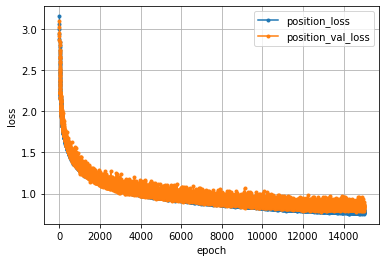

In [14]:
# 学習経過の可視化(位置)
position_loss     = position_history.history['loss']
position_val_loss = position_history.history['val_loss']

nb_epoch = len(position_loss)
plt.plot(range(nb_epoch), position_loss,     marker='.', label='position_loss')
plt.plot(range(nb_epoch), position_val_loss, marker='.', label='position_val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

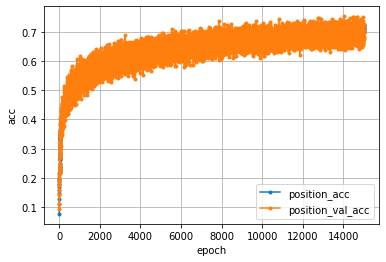

In [15]:
# 学習経過の可視化(位置)
position_acc     = position_history.history['accuracy']
position_val_acc = position_history.history['val_accuracy']

nb_epoch = len(position_acc)
plt.plot(range(nb_epoch), position_acc,     marker='.', label='position_acc')
plt.plot(range(nb_epoch), position_val_acc, marker='.', label='position_val_acc')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()